In [20]:
import librosa
import os
import json
import soundfile as sf
import ffmpeg
import IPython.display as ipd

In [29]:
DATASET_PATH = "nlp_keywords"
JSON_PATH = "data.json"
SAMPLES_TO_CONSIDER = 8000 # 1 sec. of audio

In [22]:
sample, sr = librosa.load('nlp_keywords/abalimi/1b5a69c4b88b41eb9577a656e11bb7dd_12df330aafd44d738ddd737e6a4eec36.wav', sr=sr)

/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [23]:
#print shape and sample rate of file
print(sample.shape)
print(sr)

(19974,)
8000



## Visualizing Audio

In order to display plots inside the Jupyter notebook, run the following commands, preferably at the top of your notebook:


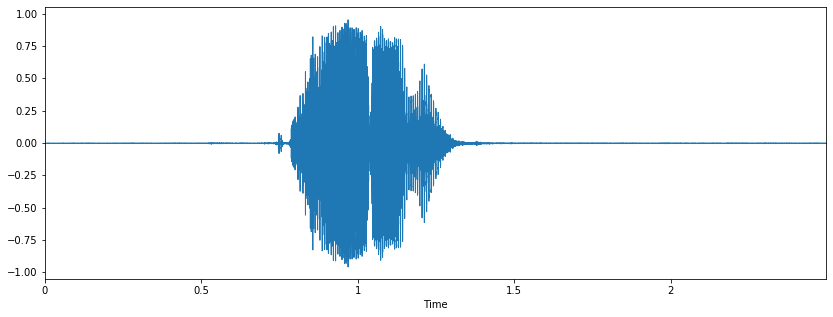

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

#Plot the audio array using librosa.display.waveplot:

plt.figure(figsize=(14, 5))
librosa.display.waveplot(sample, sr=sr)

### Display a spectrogram using librosa.display.specshow:

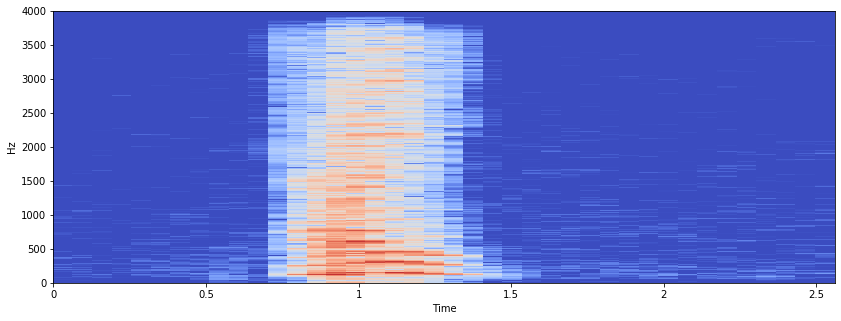

In [25]:
#SPECTROGRAM

X = librosa.stft(sample)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')



In [26]:

#Playing Audio
#IPython.display.Audio

#Using IPython.display.Audio, you can play an audio file:

import IPython.display as ipd
ipd.Audio('nlp_keywords/abalimi/1b5a69c4b88b41eb9577a656e11bb7dd_12df330aafd44d738ddd737e6a4eec36.wav') # load a local WAV file



In [30]:
def preprocess_dataset(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512):
    """Extracts MFCCs from music dataset and saves them into a json file.

    :param dataset_path (str): Path to dataset
    :param json_path (str): Path to json file used to save MFCCs
    :param num_mfcc (int): Number of coefficients to extract
    :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
    :param hop_length (int): Sliding window for FFT. Measured in # of samples
    :return:
    """

    # dictionary where we'll store mapping, labels, MFCCs and filenames
    data = {
        "mapping": [],
        "labels": [],
        "MFCCs": [],
        "files": []
    }

    # loop through all sub-dirs
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're at sub-folder level
        if dirpath is not dataset_path:

            # save label (i.e., sub-folder name) in the mapping
            label = dirpath.split("/")[-1]
            data["mapping"].append(label)
            print("\nProcessing: '{}'".format(label))

            # process all audio files in sub-dir and store MFCCs
            for f in filenames:
                file_path = os.path.join(dirpath, f)

                # load audio file and slice it to ensure length consistency among different files
                signal, sample_rate = librosa.load(file_path)

                # drop audio files with less than pre-decided number of samples
                if len(signal) >= SAMPLES_TO_CONSIDER:

                    # ensure consistency of the length of the signal
                    signal = signal[:SAMPLES_TO_CONSIDER]

                    # extract MFCCs
                    MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                                 hop_length=hop_length)

                    # store data for analysed track
                    data["MFCCs"].append(MFCCs.T.tolist())
                    data["labels"].append(i-1)
                    data["files"].append(file_path)
                    print("{}: {}".format(file_path, i-1))

    # save data in json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


if __name__ == "__main__":
    preprocess_dataset(DATASET_PATH, JSON_PATH)


Processing: 'obulimi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/eb702740d41f4f389192ec5c6a3ae95f_2b38c4492f2a4d3fb7062e4a9c0aa191.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/d027264654b94950aeb204f64d05d8d7_56a080a4a5f14e4eaa235f107b489534.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/6fbfcce2cf21419e97290f9e12934f65_a2254e5aac27468698f75bf1ad210b34.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/5aa4893526794a73a3ed0a7ebba2a7bf_38c53832725f4b0393b98bd6a985a537.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/1b5a69c4b88b41eb9577a656e11bb7dd_2b2dea148d6e450fb34179c6f28f47c3.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/d027264654b94950aeb204f64d05d8d7_7c8a048fbc6247899461275ff28c5706.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/6fbfcce2cf21419e97290f9e12934f65_a2d9fc982ebc4a15b051514e55e2adf5.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/d027264654b94950aeb204f64d05d8d7_4d957416c60b4711878ba63ebd72cf19.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/6fbfcce2cf21419e97290f9e12934f65_325175fbce4341268d37c7b56e2d323c.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/6fbfcce2cf21419e97290f9e12934f65_89bb6e445cfd4362ba0c9acb35c3155b.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/eb702740d41f4f389192ec5c6a3ae95f_2a03c292a8cd4fb381097838e664258d.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/eb702740d41f4f389192ec5c6a3ae95f_5984b44c295a432f958f4a2f2d026a38.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/d027264654b94950aeb204f64d05d8d7_cc4f9e763ee94da7ac28223907204f71.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/1b5a69c4b88b41eb9577a656e11bb7dd_e8c4a62826c54312883f7d2772bcea71.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/6fbfcce2cf21419e97290f9e12934f65_cacd39fd8fe74eea92f81e9408c9ae65.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/6fbfcce2cf21419e97290f9e12934f65_88f45e215c4b47da81192a5756cb22ef.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/d027264654b94950aeb204f64d05d8d7_f650ba067c5f4553b3a7bd90369afc24.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/1b5a69c4b88b41eb9577a656e11bb7dd_170f8e106cdd491bbbc63467fdcdf23f.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/1b5a69c4b88b41eb9577a656e11bb7dd_32cfca271bbc430ebaa8d2becbbbcdfe.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/6fbfcce2cf21419e97290f9e12934f65_90ad4bf5f97348ffade956b3994639a7.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/6fbfcce2cf21419e97290f9e12934f65_0c84ccb3fe824f36abf03b2095deabb3.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/d027264654b94950aeb204f64d05d8d7_32a8766f0c4f40e39a4aa3df049c3efc.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/1b5a69c4b88b41eb9577a656e11bb7dd_4dafbce9ce3049ff9c845d3c3d962952.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/6fbfcce2cf21419e97290f9e12934f65_c74c448ca4ea4c6f97db933862b80b75.wav: 0


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulimi/6fbfcce2cf21419e97290f9e12934f65_8ed5683a064d434db47222af9d3de56e.wav: 0

Processing: 'ekikoola'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/d027264654b94950aeb204f64d05d8d7_c967e38b214b40fb997dbc7191fddabc.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/1b5a69c4b88b41eb9577a656e11bb7dd_e4ed2ed795b54944bcaeab2eef302720.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/d027264654b94950aeb204f64d05d8d7_6d76c49295b046a5a5706e43825e31d9.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/1b5a69c4b88b41eb9577a656e11bb7dd_14cfb951b7264ab996a1351b29c1fabf.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/6fbfcce2cf21419e97290f9e12934f65_c53e64303b6d4af4af1e2f2bc8f7a11d.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/5aa4893526794a73a3ed0a7ebba2a7bf_fd3cd6b4dac64a6caac0536df87e8fea.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/6fbfcce2cf21419e97290f9e12934f65_0baa32379382424e980f7713c49ee4b8.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/d027264654b94950aeb204f64d05d8d7_a3271e43f9734829b3782a3fbf7afd61.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/1b5a69c4b88b41eb9577a656e11bb7dd_cd18c50d61224210bef541e4ec8a272c.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/6fbfcce2cf21419e97290f9e12934f65_b94c7e9c47a047b2bf4b755b6804b203.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/1b5a69c4b88b41eb9577a656e11bb7dd_24a257c14fe84fada949682fc59a6af2.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/d027264654b94950aeb204f64d05d8d7_b8681c2d1e7a48359ab7cb8304533857.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/5aa4893526794a73a3ed0a7ebba2a7bf_8984af95ce6c416ca2264af867f7173c.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/d027264654b94950aeb204f64d05d8d7_8cd1b90a800842a9baea47ed99e4d2d5.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/6fbfcce2cf21419e97290f9e12934f65_07d6099780ce4eca90a5e746253a18ad.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/d027264654b94950aeb204f64d05d8d7_714d68442f20476abd7e26f5d7ffa964.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/5aa4893526794a73a3ed0a7ebba2a7bf_bd5215f8aea14d368f5e354596eaa368.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/d027264654b94950aeb204f64d05d8d7_6915802c15e8423b985090d2dbc5ff87.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/6fbfcce2cf21419e97290f9e12934f65_eb9886c858fc4dae9b6f331d9ba87cd0.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/eb702740d41f4f389192ec5c6a3ae95f_e0b9744034d04e05b47c2371cd6ee6f2.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/eb702740d41f4f389192ec5c6a3ae95f_d571bbd17316469baae5fc6c98830594.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/6fbfcce2cf21419e97290f9e12934f65_7c8585b2b2124d79a17f71c1cd6c90eb.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/1b5a69c4b88b41eb9577a656e11bb7dd_c55e76904b8a485497f2ed7bb0403d2a.wav: 1


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikoola/d027264654b94950aeb204f64d05d8d7_415afd9ab47a4912990414acb92cfe9d.wav: 1

Processing: 'miceere'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/d027264654b94950aeb204f64d05d8d7_9f7578a8c2c54b72a1fcd724f7e7e740.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/d027264654b94950aeb204f64d05d8d7_6c7e7ef00f754f04a6ec01d1d66b9df3.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/6fbfcce2cf21419e97290f9e12934f65_0301e27b781240adb126f57205b54814.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/0a8fccdb95b749dca0404bf433872764_ab9fd7eb63d445ea9791fcddaff8853a.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/d027264654b94950aeb204f64d05d8d7_e54ed58a41df47b18eb8b5c2aa30de0d.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/771b5044334242fb9caff8a71fd7891e_9b8c58b5da374fb2a557a651b255bebd.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/2497942026ef4d7e97d47fc2738d7c27_b8e85d38d5404ecc8e74df1d71d61dd9.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/6fbfcce2cf21419e97290f9e12934f65_045caea6455246d9945129fac4b050e6.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/771b5044334242fb9caff8a71fd7891e_b536970ab0cf41e4ae67104ff9620d50.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/6fbfcce2cf21419e97290f9e12934f65_bc6c90a4284a463789f42c4d9621639a.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/d027264654b94950aeb204f64d05d8d7_56c5efabbdb440908b0916dfb3165c0a.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/d027264654b94950aeb204f64d05d8d7_937d7c3c5ae240c08ccaa58b922109d1.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/771b5044334242fb9caff8a71fd7891e_c93295bcc0cc4ba689dc711826773328.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/2497942026ef4d7e97d47fc2738d7c27_93f55940071f4487b95478d5b65eeadf.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/2497942026ef4d7e97d47fc2738d7c27_435b5cbbc4da4e2cb21967660f1c889f.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/6fbfcce2cf21419e97290f9e12934f65_885e0956c8054c83babe64c48d6da7a6.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/d027264654b94950aeb204f64d05d8d7_63060eca606749eb9d1059cd0ca846c8.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/2497942026ef4d7e97d47fc2738d7c27_8506dbcb68fe4f12b3489981a916d68e.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/d027264654b94950aeb204f64d05d8d7_cd794f77f4bd457896c740e937ada6c0.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/9181ed273f5b460ba7dd7a5b2d7f0612_76592af880ab464bbe2a4beea0321cde.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/2497942026ef4d7e97d47fc2738d7c27_facb1c694cd64febb4dad4e16c7d62fd.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/d027264654b94950aeb204f64d05d8d7_b81fa70810f34afa82d8d9b13e3ec4a3.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/d027264654b94950aeb204f64d05d8d7_7a6b8abdd9e04c32ba43827af21b6567.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/771b5044334242fb9caff8a71fd7891e_22ef228799664271877f7864f3a6a289.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/d027264654b94950aeb204f64d05d8d7_40659bdd9524473c8e89d02900a36bdb.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/d027264654b94950aeb204f64d05d8d7_7a2fd28c4e434115a3ccc70791b09d38.wav: 2


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/miceere/771b5044334242fb9caff8a71fd7891e_7afd8bc5098841a98f2f872bfd8a7d8f.wav: 2

Processing: 'abalimi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/d027264654b94950aeb204f64d05d8d7_0f3ccf2c9ed1492db5860e6d789f8f6a.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/eb702740d41f4f389192ec5c6a3ae95f_dc4956f00b0f4aa6989052a17acdc1e3.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/6fbfcce2cf21419e97290f9e12934f65_d6753ad71dbc45a8a35e235be34bbc8a.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/d027264654b94950aeb204f64d05d8d7_fb023fdeace64877b4f0293c886a1d24.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/eb702740d41f4f389192ec5c6a3ae95f_d81514ae681445eabba416178c5d38c4.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/d027264654b94950aeb204f64d05d8d7_d10f6182c2c34495802b61e3c025ac89.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/6fbfcce2cf21419e97290f9e12934f65_4e03c55cad6a4273b56ffc09b0410389.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/d027264654b94950aeb204f64d05d8d7_94f61ab8e6c946ba9f81c5f597082591.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/6fbfcce2cf21419e97290f9e12934f65_a2580e39a34241ab8c25e36bc21061f4.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/eb702740d41f4f389192ec5c6a3ae95f_19c5d3f0e5c54a9ba1c2b4f48791d332.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/eb702740d41f4f389192ec5c6a3ae95f_81e0268b31d14ac3be37700ab379b6ec.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/5aa4893526794a73a3ed0a7ebba2a7bf_4b41e8fd3c364e5082d1b2b5bb64c8d9.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/1b5a69c4b88b41eb9577a656e11bb7dd_12df330aafd44d738ddd737e6a4eec36.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/1b5a69c4b88b41eb9577a656e11bb7dd_cbcd9fef6f2344bcadad9ac06df3fba2.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/6fbfcce2cf21419e97290f9e12934f65_c206c546d33c454cb98de6f861ebb9fc.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/d027264654b94950aeb204f64d05d8d7_cb6d4ed79a2141e0a506a8e3e4fca052.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/d027264654b94950aeb204f64d05d8d7_aea1ef5e759a4732b7c2c0f6ea6b7fa4.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/6fbfcce2cf21419e97290f9e12934f65_3290d894b46540ee9ef367df73fe1e3f.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/6fbfcce2cf21419e97290f9e12934f65_bb69bedd71524ea090e5499b712ef2d9.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/1b5a69c4b88b41eb9577a656e11bb7dd_c287e8aa894841f4b8a1e1b39f7c77b2.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/1b5a69c4b88b41eb9577a656e11bb7dd_620813f19de248cca304e214d5892ec6.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/d027264654b94950aeb204f64d05d8d7_002cd1f8fa1247a4a90e7b9b1646ca4b.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/5aa4893526794a73a3ed0a7ebba2a7bf_f4e07a0cbdc54593b1bf391d1ddbcfce.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/6fbfcce2cf21419e97290f9e12934f65_005b575002574d6780e273c7a15ba1e3.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/1b5a69c4b88b41eb9577a656e11bb7dd_dbaeff9f7d5a4f8182816d8381ca01fb.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/6fbfcce2cf21419e97290f9e12934f65_ad9b6b45876e41c7835a69be633be20a.wav: 3


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/abalimi/d027264654b94950aeb204f64d05d8d7_abf62a2b4187470bb14d5576ea99ce0c.wav: 3

Processing: 'munyeera'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_3ee6c6567dc04c75ab3a0a3b89c9aec7.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_443be618a0f140f3aa20f3bb464b2ea8.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d45cd9903b3044d494866b3162651a76_3f02c4d23d7a4586803fef6cec342d1e.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_1aa44b6dfcee4e1387ef0d86d7ab80a0.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d45cd9903b3044d494866b3162651a76_7d79a1d1f4ab4b6e858f4ef4342ecf63.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/6fbfcce2cf21419e97290f9e12934f65_7397a041b7664a92a25e89fbed0cadb0.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/6fbfcce2cf21419e97290f9e12934f65_f1d015e9a8ff4e02afeddaea02d7919b.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_421ae349e4e2457c9a73aa31c4c1a917.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/6fbfcce2cf21419e97290f9e12934f65_db20d912a8ff4f30b63492eb9a001f5f.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/744b1a437234489fae9512694d2212ae_7333d9386571492abde3a4e59312d8ce.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/3d43af6faf2244c288154dc4ff6a734f_9c468e5fee6c419b86a8d22e26d03546.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d45cd9903b3044d494866b3162651a76_a617d261aa4f49e9aab2ddba0708b3fb.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/6fbfcce2cf21419e97290f9e12934f65_699612f0092a4ce7a917da19b410c71e.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_a7b280aa1e4f4ef0a18d35baa77c7c41.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/744b1a437234489fae9512694d2212ae_b5b5081b3b6b4c74a86e0fce18e1ebb5.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/744b1a437234489fae9512694d2212ae_3f72558efeca47e4879ba4b6f37dd947.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/6fbfcce2cf21419e97290f9e12934f65_82fde4611144409ca197c410bc4dcfbc.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/6fbfcce2cf21419e97290f9e12934f65_c774f2007206452c806d3aed4db41f57.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/6fbfcce2cf21419e97290f9e12934f65_f862957b6b7b4043ba3f83df5aeb7856.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/744b1a437234489fae9512694d2212ae_a375164a39514718a2ff1ee8e513cbfb.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/2497942026ef4d7e97d47fc2738d7c27_7c7049118fc547e488f108a1d3cb6368.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_aca956d333ce4fe9b1d20e7db543f402.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_7b495a004fce4aa0aefed715fd2b1904.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_fc28d5f2507e4e5d92c97794fcb632d0.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/744b1a437234489fae9512694d2212ae_5a7a4d91125441fc8eea258b4a31ae02.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/3d43af6faf2244c288154dc4ff6a734f_80cef090162541e7a06cef1ffdd6c268.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_4a46e96a6be64fcf91dbc45d9ea9f7d7.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_045522b6e2084c4c842c677e9aefeb78.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d45cd9903b3044d494866b3162651a76_3017c47314a8478cbb90af883db2d307.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_68fe93bf736a4c569b2a0674d4df926c.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d45cd9903b3044d494866b3162651a76_412260895b3f45a8848a6fb0a49d2c8a.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_8b9c6172a0ef4f24a02b9e9c90a156e6.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/6fbfcce2cf21419e97290f9e12934f65_77276a099aec4d5a8d96756300bcbdc2.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_f5460bf7ab844691b45de9beb2767047.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/3d43af6faf2244c288154dc4ff6a734f_8667fe0ff80b4781831c551556bf7cda.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_0c179f76b1a44e1eaf6b59a89f939285.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/655ab13e2b784ceabf71f38c1e9d5976_9038198583ce44c0ac8e26a5e66524c1.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/6fbfcce2cf21419e97290f9e12934f65_98c82e88695f456ea15ed5075f247afe.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/6fbfcce2cf21419e97290f9e12934f65_cdc4b0f18d3b479cbce28b540c3c1142.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_1cf4f4b034a34cd483b9020d044425d8.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d027264654b94950aeb204f64d05d8d7_aa3d76deb91c41fa90a5c10606ee1bdf.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/3d43af6faf2244c288154dc4ff6a734f_8260092c98bb4ac4bb6f84a2892eb327.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/3d43af6faf2244c288154dc4ff6a734f_6e1b8d365d6d4170bf5d91d7435a51dc.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/d45cd9903b3044d494866b3162651a76_042f0a320fe7459abfc77a71e5653bcb.wav: 4


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/munyeera/6fbfcce2cf21419e97290f9e12934f65_ca1deffc7c214653a430acf8725c4476.wav: 4

Processing: 'obutunda'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/d027264654b94950aeb204f64d05d8d7_81a78dbfb36b427b952496d88f5aa78f.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/9181ed273f5b460ba7dd7a5b2d7f0612_ad1e17877ac84f4792ba765e463a8879.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/2497942026ef4d7e97d47fc2738d7c27_73aab6b960284f289f0fd295a8d0491c.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/d027264654b94950aeb204f64d05d8d7_8e5c8ef8fa814ded94e41d784dfcfdd6.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/d027264654b94950aeb204f64d05d8d7_558b705377a346da825e7c7629dd88d8.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/6fbfcce2cf21419e97290f9e12934f65_6d0c89419ca942f0ad6c6c7752132ad2.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/2497942026ef4d7e97d47fc2738d7c27_72e17c9deaf64977a3faa73e04fae705.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/771b5044334242fb9caff8a71fd7891e_06914f25f4184df98bf379dda4178262.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/771b5044334242fb9caff8a71fd7891e_d1f8c81db6dd446882e40ddd14c6f29e.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/d027264654b94950aeb204f64d05d8d7_f9c48a7b7a6541c0a5340e999e5c8c70.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/2497942026ef4d7e97d47fc2738d7c27_d475905475f94a0b9828085437a99d48.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/771b5044334242fb9caff8a71fd7891e_c0052cff297943a1a322739f77ed1ffa.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/2497942026ef4d7e97d47fc2738d7c27_9c40567ee813405ab84ba514889f2ee8.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/6fbfcce2cf21419e97290f9e12934f65_ed3fe5fd2dbb4dd49fb477cb99348798.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/771b5044334242fb9caff8a71fd7891e_8df64c9121614415aff560c1c7735b46.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/d027264654b94950aeb204f64d05d8d7_88f28bc88168496e9180c0d4c2cc29bc.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/d027264654b94950aeb204f64d05d8d7_95322b7bb2234d89b049d3057ed56374.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/6fbfcce2cf21419e97290f9e12934f65_765ee49ea45349ab8d3127f8c42d75e7.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/d027264654b94950aeb204f64d05d8d7_a5fd62a7e29d4191a9ed8200098a7260.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/d027264654b94950aeb204f64d05d8d7_5658405f8e0048118ce45882941d3ca3.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/79aac18aacc74cc092d00778f7f323da_576e0face41e4fa885135f8f3d39d275.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/2497942026ef4d7e97d47fc2738d7c27_55590ad6aa9c47619a8fc7d13f8f319a.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/62a43378312341918722fbe81a34ffd7_73c2c11fe39b47d694adef7e25a7c848.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/771b5044334242fb9caff8a71fd7891e_fd13c6250a7546bbb6c65ef1914cf205.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/6fbfcce2cf21419e97290f9e12934f65_138078f3758a4b14ae607f1a924b7bd6.wav: 5


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutunda/d027264654b94950aeb204f64d05d8d7_6c39fdae80fb4497978370e83a7c10af.wav: 5

Processing: 'nfukirira'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/1b5a69c4b88b41eb9577a656e11bb7dd_e167fa643ca84538b988d323b91c13d2.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/d027264654b94950aeb204f64d05d8d7_a8e308d78ad540009ce8c735549a8c9a.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/d027264654b94950aeb204f64d05d8d7_6580a3db1ba6425a93ea4a62a364a9c5.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/6fbfcce2cf21419e97290f9e12934f65_1f3fab723b2a49d3b86d4018fe0572c7.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/6fbfcce2cf21419e97290f9e12934f65_714cf0cf83174e52937b24569643cc1c.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/eb702740d41f4f389192ec5c6a3ae95f_715fdf0212ee4d42b18b28d432bda804.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/5aa4893526794a73a3ed0a7ebba2a7bf_72016b5aa60143d28335bedbfb3ca58d.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/6fbfcce2cf21419e97290f9e12934f65_4ad07cb332b145408b9de26fbf6c10c0.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/1b5a69c4b88b41eb9577a656e11bb7dd_7dc5508893fc48f9bead76a54af20395.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/6fbfcce2cf21419e97290f9e12934f65_a05ab544478043fda8f6ec65640e39f5.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/6fbfcce2cf21419e97290f9e12934f65_3a4ccd0c7722478b98f2867fc2468cc3.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/1b5a69c4b88b41eb9577a656e11bb7dd_c9fbaf6d3e494c22984e96fec5488161.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/1b5a69c4b88b41eb9577a656e11bb7dd_7c1246ec698d4131a233d7ea5be5b4f3.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/1b5a69c4b88b41eb9577a656e11bb7dd_041618a31a3a41b89f72aeb45bf6f99a.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/eb702740d41f4f389192ec5c6a3ae95f_7089dfebea3f40dd9be2494177715d6f.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/6fbfcce2cf21419e97290f9e12934f65_67a8d37e631349f4a7ac5ce95500444c.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/6fbfcce2cf21419e97290f9e12934f65_6b01a4c6fd0b429fb659542c0f657cc0.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/6fbfcce2cf21419e97290f9e12934f65_62f8aac1b8db4a279de3774611bbf8cb.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/6fbfcce2cf21419e97290f9e12934f65_0ea28dab1cc6458c9fc210cac5d6780a.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/eb702740d41f4f389192ec5c6a3ae95f_74355387f2114349a3cce588184bf50e.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/5aa4893526794a73a3ed0a7ebba2a7bf_3c13af09b7e54581825084b4b8a0f73b.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/6fbfcce2cf21419e97290f9e12934f65_a88549dd481c4f4db431742ee1633c2f.wav: 6


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nfukirira/d027264654b94950aeb204f64d05d8d7_281fd443da3b42d6b3fb0cdc37f413fd.wav: 6

Processing: 'faamu'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/6fbfcce2cf21419e97290f9e12934f65_b54722f7eae5421d97d2b363055f5926.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/d027264654b94950aeb204f64d05d8d7_7f4b2c9d840645ddba20a0d696caa13c.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/d027264654b94950aeb204f64d05d8d7_0c34ff3a713246c0b3db0ffe4cfe47bf.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/6fbfcce2cf21419e97290f9e12934f65_62ae813deb4c4b198d930bf42a156160.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/d027264654b94950aeb204f64d05d8d7_2955ec063adb496b981c3fac1bfac798.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/1b5a69c4b88b41eb9577a656e11bb7dd_d99792fd6c964ff5bda563ca34159b5b.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/d027264654b94950aeb204f64d05d8d7_e151d7d0d6cb4b07b401b02790d715c5.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/6fbfcce2cf21419e97290f9e12934f65_8a833977b7ab463e8ef7e73c5b16bcf3.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/1b5a69c4b88b41eb9577a656e11bb7dd_5f06827638894cda9740326b9aa0dcc7.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/6fbfcce2cf21419e97290f9e12934f65_8c1571d6a28f445aab8da5c44c369de8.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/d027264654b94950aeb204f64d05d8d7_0fc74ac25fe142d9b205e0e2e124a063.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/6fbfcce2cf21419e97290f9e12934f65_90c0d1e1b61c48eca9dfa72b5a36a963.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/6fbfcce2cf21419e97290f9e12934f65_0eedee1a0d2040aa843f9b5b07ebce06.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/d027264654b94950aeb204f64d05d8d7_8c31248eee8a4fc38f8ebe62fa95849d.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/d027264654b94950aeb204f64d05d8d7_79ef85c9f7304901b7310becac0ef74c.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/d027264654b94950aeb204f64d05d8d7_05205d9b186b4af4b5421f0caecda795.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/1b5a69c4b88b41eb9577a656e11bb7dd_45f84362d33b4be0b345d7de41ea01bb.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/5aa4893526794a73a3ed0a7ebba2a7bf_2d77cfade1a34f3fa5baca80888ec4d1.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/6fbfcce2cf21419e97290f9e12934f65_d96d3ad3fd594e018b076e16a2766a23.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/eb702740d41f4f389192ec5c6a3ae95f_edc6f9c3b21e406482e79653424073ed.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/d027264654b94950aeb204f64d05d8d7_d46d8876c5824d02b0779bb7951144fd.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/eb702740d41f4f389192ec5c6a3ae95f_90c4ce4efbf94a409e1b675000315c5f.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/1b5a69c4b88b41eb9577a656e11bb7dd_2148988ab6b74a25bae259a8cdeabec9.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/d027264654b94950aeb204f64d05d8d7_7ebf4993f2354acf9d01a0b2d6125ee8.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/d027264654b94950aeb204f64d05d8d7_ff2518f5a7f842f38634c40c2310acde.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/6fbfcce2cf21419e97290f9e12934f65_482fbe1d39a44632a9c47b8653e14108.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/eb702740d41f4f389192ec5c6a3ae95f_5b73c3f6ac8b4f02a64dd97a4b1ddaa8.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/5aa4893526794a73a3ed0a7ebba2a7bf_036385b28ee54bca99a825c4b3996697.wav: 7


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/faamu/1b5a69c4b88b41eb9577a656e11bb7dd_77e8282237f64f549c69dd28dd6d843c.wav: 7

Processing: 'okufukirira'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/6fbfcce2cf21419e97290f9e12934f65_a13c89d39b06476b9654c3f611d438d4.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/6fbfcce2cf21419e97290f9e12934f65_fd3b285636ee4325a91e2a0d8f0b0338.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/6fbfcce2cf21419e97290f9e12934f65_b9c992fdb18f4967868e156cbdffba62.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/d027264654b94950aeb204f64d05d8d7_0cdf81e06d0142a7adc12a9e4ee4cc6f.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/d027264654b94950aeb204f64d05d8d7_c65ae66994fd4e6497c9f96fb1b0e554.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/d027264654b94950aeb204f64d05d8d7_d512492769ad4152b2ad9d60cf98e692.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/1b5a69c4b88b41eb9577a656e11bb7dd_6142f677b3c449ac88930389dda2a0ad.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/d027264654b94950aeb204f64d05d8d7_20c662f6f48a4749a8a070ab31140abb.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/6fbfcce2cf21419e97290f9e12934f65_19f2a95209f04af1a850729c702af855.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/2497942026ef4d7e97d47fc2738d7c27_71bc8c5bff6449e18969cdfd8e8c22fe.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/2497942026ef4d7e97d47fc2738d7c27_5952d4339bc64849a465786ee50394b2.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/1b5a69c4b88b41eb9577a656e11bb7dd_e193e344940a4e04b5b95a9ad2fa3cb5.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/eb702740d41f4f389192ec5c6a3ae95f_6fc0c33e232640b5a0c2373bbe1825be.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/6fbfcce2cf21419e97290f9e12934f65_37f7995fd757496ab13cdd9be5a5a2c9.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/1b5a69c4b88b41eb9577a656e11bb7dd_f6994c9451c048dc81304cab444647dd.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/d027264654b94950aeb204f64d05d8d7_0b4afa2f912b49eebdcd9178f15deafe.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/d027264654b94950aeb204f64d05d8d7_32647c79194c40859066d41c7cd5ff78.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/1b5a69c4b88b41eb9577a656e11bb7dd_4389fb978904431ea4b47088648a9afc.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/d027264654b94950aeb204f64d05d8d7_1ddabc985a57426e97899df401504071.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/d027264654b94950aeb204f64d05d8d7_adce96f969f84a5b89fe697e4b6fca1e.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/d027264654b94950aeb204f64d05d8d7_b5d7e92e62a849078ac51c7d3ef88747.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/d027264654b94950aeb204f64d05d8d7_7601a94bb1b84c6ca4ffbbf8e33a4392.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/d027264654b94950aeb204f64d05d8d7_c7529891db3e44f29bdde1b1453417a7.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/d027264654b94950aeb204f64d05d8d7_ce6f4abafe224c4fa87021424a3e456d.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/5aa4893526794a73a3ed0a7ebba2a7bf_60335fa590e64ed0a7db0115445ccd41.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/5aa4893526794a73a3ed0a7ebba2a7bf_304fcdd4fba24a07bff068ceaac285ce.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/1b5a69c4b88b41eb9577a656e11bb7dd_04cfadedd67c482ebc0ceaa123588e1f.wav: 8


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufukirira/6fbfcce2cf21419e97290f9e12934f65_81e361d466ba4de78bc705eb26aa2fbd.wav: 8

Processing: 'amatooke'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/771b5044334242fb9caff8a71fd7891e_99ba144cfb084c33bfb13dd3d475017b.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/d027264654b94950aeb204f64d05d8d7_826c5bb5709c44ee838f0d759d6959e9.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/d027264654b94950aeb204f64d05d8d7_3c8bafe2d6b64170957d1faea35fd457.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/62a43378312341918722fbe81a34ffd7_a562a7d041aa48e9a746b3e5418dd2bd.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/6fbfcce2cf21419e97290f9e12934f65_c2d2eef57b8b4863aef5e86c48356c77.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/6fbfcce2cf21419e97290f9e12934f65_375aaf1f629a4377878992faec553177.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/0a8fccdb95b749dca0404bf433872764_e0316c8ff60c48b2a038de316e301f45.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/771b5044334242fb9caff8a71fd7891e_b264d07dfef34ec2b74cad253930450e.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/2497942026ef4d7e97d47fc2738d7c27_6b85be5c109d4df3801dd62bfc8fbf12.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/6fbfcce2cf21419e97290f9e12934f65_aa19d5ce21194c99abda81119b3e29c4.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/2497942026ef4d7e97d47fc2738d7c27_0e5e428248c842928501337637a63074.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/2497942026ef4d7e97d47fc2738d7c27_f78d5398886d4d76af6deff1f76a5f12.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/9181ed273f5b460ba7dd7a5b2d7f0612_4f5cb0addc454226a89516d4bd04b7e8.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/79aac18aacc74cc092d00778f7f323da_1e32b78d114147a7a3cabee64366947b.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/6fbfcce2cf21419e97290f9e12934f65_624cd980515a429895f8df352fbb0d76.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/771b5044334242fb9caff8a71fd7891e_78fe692ff54d48b8b95e7f5c4c61ed57.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/2497942026ef4d7e97d47fc2738d7c27_9910913ac97b468392f782219d2ae5bb.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/0a8fccdb95b749dca0404bf433872764_a9220d6e3cdb4082b9cb74efc697538b.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/2497942026ef4d7e97d47fc2738d7c27_881369e0729e474b8b642a60dac1af55.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/771b5044334242fb9caff8a71fd7891e_2667727c981e42a5b0da69fe62a3fb2b.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/6fbfcce2cf21419e97290f9e12934f65_5ba09446fb614d1380c441490d5d0ad4.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/62a43378312341918722fbe81a34ffd7_5f8a72fac9a745999b8aa6b434dd1320.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/2497942026ef4d7e97d47fc2738d7c27_1b6b56bcc8284c7a95c157ad5de34242.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/79aac18aacc74cc092d00778f7f323da_187c91342b1444418aa0f95475e45ce6.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/6fbfcce2cf21419e97290f9e12934f65_2f427dc5bdf14839a42cb291a3172672.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/d027264654b94950aeb204f64d05d8d7_f89fb37090e24903ac0d4fc2878a9b67.wav: 9


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amatooke/771b5044334242fb9caff8a71fd7891e_13727d285f494fa1a8aa1fcc23d061c4.wav: 9

Processing: 'kasaanyi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/655ab13e2b784ceabf71f38c1e9d5976_4cf40b1f3c574357bcf86625110fa24e.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_8d4c31c75b2142c0bb185a84106e14c2.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_311a370ae27247e68ba5c493b4362d4d.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/744b1a437234489fae9512694d2212ae_45e123f6b1cb497597df7f0bb04be074.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/744b1a437234489fae9512694d2212ae_73629b0774724a11ad06bf629d181bfe.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/3d43af6faf2244c288154dc4ff6a734f_84ed116375ac4c8c9ec6da52d27c5e5e.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/6fbfcce2cf21419e97290f9e12934f65_26ea5b023efb4b028f62eb10169e2ea3.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d45cd9903b3044d494866b3162651a76_a003af91c09544669ff8c066a79d032f.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/3d43af6faf2244c288154dc4ff6a734f_514782c5801a4c318ea167ce86242c72.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_ea0a334621eb44dc857b73f708770edc.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/3d43af6faf2244c288154dc4ff6a734f_5ddf52e957824d6a8b4c6dec25ebb356.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_bd6c6dd5d95b4bc9a021b6909ee927fa.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d45cd9903b3044d494866b3162651a76_bd568fb8d4e04396afbb701a99eca568.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_b7c139302cd04bf7a752fe3a807ab8dc.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_fa0415176ca842e3a01a458005fbb818.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/6fbfcce2cf21419e97290f9e12934f65_99de6baa795648a3b890b20e24b628e1.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/6fbfcce2cf21419e97290f9e12934f65_c0cad5d1dfe449e583a3ecff7a55000b.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/744b1a437234489fae9512694d2212ae_51c13c23efec415e807e6cd552c050ea.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d45cd9903b3044d494866b3162651a76_56e972e9766447c6a73abdc5e0a0463d.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/6fbfcce2cf21419e97290f9e12934f65_42efd7e077d94e12b71b984794e3f54a.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d45cd9903b3044d494866b3162651a76_7b72a2822fc6494e8105ee3c041b0c6f.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/6fbfcce2cf21419e97290f9e12934f65_ecdb341e6d3c4b19a08112dd0848d2bb.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_5bf46cfc49a44bed93ff80083adc475e.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_016671a398044fdebcf1361e4bd4f776.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_e04ab70177694baf9f58dcd43b867db3.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_ed50e507546e42bcadb38eca4f40c172.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d45cd9903b3044d494866b3162651a76_4af7f7818e444ecdadb29ef8633e356f.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_8c6acc79d5c94031ba52d34da2c79e37.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/744b1a437234489fae9512694d2212ae_041025eb40ba45989c84b6dd6329b21c.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/6fbfcce2cf21419e97290f9e12934f65_77d52305bb704b8cbea8f08cbfa76ca8.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_08e51e5bc575481faead0f3407d75af1.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/3d43af6faf2244c288154dc4ff6a734f_0206e1fb14544061ae623741cf3e553b.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_e34ce9a67a914df58e8e6604426040f2.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/6fbfcce2cf21419e97290f9e12934f65_80b384be4aa34405ae30ceb8fd1c7bac.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/6fbfcce2cf21419e97290f9e12934f65_3e0f6dd4e61c4c94b56e03e3eb80887b.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/2497942026ef4d7e97d47fc2738d7c27_0fae8afd86c442ccb2abb114269b0084.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_a6ac5684e38b4f76864c6278d2f6291f.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/655ab13e2b784ceabf71f38c1e9d5976_76280864aaf94a6dab086ea04b735fd4.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/744b1a437234489fae9512694d2212ae_9a027c9816774686a2ec731cbdc23ec0.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_3e07370999ab4ae7b39c21eb7c0b590f.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_90505dcba7ee43108e05f9a4df462443.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/d027264654b94950aeb204f64d05d8d7_0587f6a83e6e444d987f62a86eb0cc89.wav: 10


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kasaanyi/3d43af6faf2244c288154dc4ff6a734f_884ebd99b874487983ec4d027882c765.wav: 10

Processing: 'kassooli'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/6fbfcce2cf21419e97290f9e12934f65_edc86481bbe84cfe92fd4a857d277057.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/6fbfcce2cf21419e97290f9e12934f65_337663de91b0482c84a7f4dc5484a3fa.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/771b5044334242fb9caff8a71fd7891e_d4571721a41343f69aa6d79efe00ec78.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/d027264654b94950aeb204f64d05d8d7_5d3dc4849b714f8a97cc8af417f1e60c.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/6fbfcce2cf21419e97290f9e12934f65_fe780584b2e0479aaf4987ec1d620d26.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/771b5044334242fb9caff8a71fd7891e_60f82a8a7d7d458ca4b87aa6a4560384.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/2497942026ef4d7e97d47fc2738d7c27_2f53027d61b44edab9dea134563074bb.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/771b5044334242fb9caff8a71fd7891e_931879f293a64bd298d484d7f8b51668.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/62a43378312341918722fbe81a34ffd7_dc0a896220ec41e0807db938255a4b32.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/2497942026ef4d7e97d47fc2738d7c27_a40fd510eb4a4efb9405c6ce142caa47.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/0a8fccdb95b749dca0404bf433872764_fd2f6c69d72147d1984672c00982a10b.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/6fbfcce2cf21419e97290f9e12934f65_93f652eb4b1d49dc868fe2f88fd22f18.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/2497942026ef4d7e97d47fc2738d7c27_3597d2b848a141f1a157ee1272d97ab5.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/771b5044334242fb9caff8a71fd7891e_57c9c3bd5b5845dea46b1cd4cdf603f4.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/9181ed273f5b460ba7dd7a5b2d7f0612_6d180a4713054603aacb970b70b89a26.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/771b5044334242fb9caff8a71fd7891e_52cb2fcac7c548609d6176ce881484d1.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/6fbfcce2cf21419e97290f9e12934f65_090a5df1624342b1998f9cdb38384f0a.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/0a8fccdb95b749dca0404bf433872764_e20f59d85fd44a839a93e75e0931e523.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/62a43378312341918722fbe81a34ffd7_c98606a00aa941d6870b575f69a237ff.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/2497942026ef4d7e97d47fc2738d7c27_7798b1244e9845e19738fdb9acf92682.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/2497942026ef4d7e97d47fc2738d7c27_a2722cf5f674480d87723b23465876c7.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/6fbfcce2cf21419e97290f9e12934f65_9b108a665f33442695a9c513a6abda2c.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/d027264654b94950aeb204f64d05d8d7_3afdf3b0e4ca4d12b77a3d3e0a5b09b0.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/79aac18aacc74cc092d00778f7f323da_b1c82b0a54ae494b9d33b50cf6ea67f3.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/79aac18aacc74cc092d00778f7f323da_d14d5e2b4a46429e9b654274ecd2b16c.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/d027264654b94950aeb204f64d05d8d7_9840c4b9c1ea4f0aa34ceb5cafb73470.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/d027264654b94950aeb204f64d05d8d7_3293b64276184a44a2d04f450a34eb11.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/2497942026ef4d7e97d47fc2738d7c27_934d02cad85c4aeca10cccc215bb659c.wav: 11


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kassooli/d027264654b94950aeb204f64d05d8d7_51d6a8d95b3346809449346137445e07.wav: 11

Processing: 'ensujju'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/771b5044334242fb9caff8a71fd7891e_b59374d7bd214f059380628f05fda39f.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/d027264654b94950aeb204f64d05d8d7_1fe007430098438aadf182ec412efbda.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/d027264654b94950aeb204f64d05d8d7_e4b5b9e1f1094e419b492db815a0525c.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/d027264654b94950aeb204f64d05d8d7_fa18f8c5058f466fae3284049d9834e8.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/d027264654b94950aeb204f64d05d8d7_8e4213b62ef249a38fef23e67e0a03ac.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/d027264654b94950aeb204f64d05d8d7_c7b8ac84c4444265ad4645b52bcdcb8e.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/2497942026ef4d7e97d47fc2738d7c27_67e260f4741845d0a1c93d0cbd2cd9fb.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/771b5044334242fb9caff8a71fd7891e_389fa56b758f4d7b95728ec3daf80942.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/2497942026ef4d7e97d47fc2738d7c27_2ce2460e4b1b47f997a210e6b1923cff.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/d027264654b94950aeb204f64d05d8d7_3f0f201e4e7c40f9aa69c76472692a40.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/2497942026ef4d7e97d47fc2738d7c27_b3d724aac5604902b5cbd019a547adbe.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/771b5044334242fb9caff8a71fd7891e_4ae7df74c40b47fe88d1745c4a35876f.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/6fbfcce2cf21419e97290f9e12934f65_4ea2743f4f1c456db592a9e6ae6c902a.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/6fbfcce2cf21419e97290f9e12934f65_8ced81af0c20452c86e6b870749510e3.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/2497942026ef4d7e97d47fc2738d7c27_751dfcd4700c4e1bb88bf85d39d49891.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/2497942026ef4d7e97d47fc2738d7c27_7e6c1c169a6b42aa86900e922454bbd1.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/771b5044334242fb9caff8a71fd7891e_9dec8ac14af44fe5a3dc937cebb12f21.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/6fbfcce2cf21419e97290f9e12934f65_6652d51b398843a1989a7b621070b386.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/d027264654b94950aeb204f64d05d8d7_e1020c44d6064c459a70284fd37d6e02.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/2497942026ef4d7e97d47fc2738d7c27_0216cafc864347a4809d78914c214a80.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/771b5044334242fb9caff8a71fd7891e_faf425ef2f8646d8a02c366161e5d7bb.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/62a43378312341918722fbe81a34ffd7_3ca956dbbe3c477994e3227588d43513.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/d027264654b94950aeb204f64d05d8d7_caded975b61b4f7684ed8f5f421ab3e0.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/6fbfcce2cf21419e97290f9e12934f65_25710b338d444034b929133dd890a826.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/d027264654b94950aeb204f64d05d8d7_86aa1183597045c3b6e2419e4e274d37.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/d027264654b94950aeb204f64d05d8d7_44fda51ceb9f40978424985b59ae4a64.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/0a8fccdb95b749dca0404bf433872764_224f81527cda4034b1cacaa59637413e.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/79aac18aacc74cc092d00778f7f323da_7ace2850bd3c44d08a86851ff6807fc2.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/6fbfcce2cf21419e97290f9e12934f65_136da7ecfd6b44918acfd9f9eb40cc15.wav: 12


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensujju/6fbfcce2cf21419e97290f9e12934f65_ab8d9c3c5c8b487abdb6810f71267c71.wav: 12

Processing: 'ekisaanyi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/3d43af6faf2244c288154dc4ff6a734f_aa767157afbe47a6923c07a5e9ec4d20.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/d45cd9903b3044d494866b3162651a76_ca343ac9881445b483ed8e9decfaae0f.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/d45cd9903b3044d494866b3162651a76_ee65bb4a132d42e99707daea1e3e54f2.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/0a8fccdb95b749dca0404bf433872764_02b852bb79284dadbf7c915b03e58a1d.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/d45cd9903b3044d494866b3162651a76_db7d124c52114057b0b60c504787997e.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/d45cd9903b3044d494866b3162651a76_e1befca9188d4024996317508a08aa32.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/744b1a437234489fae9512694d2212ae_827c98f236434c2683f7671a6354c11f.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/3d43af6faf2244c288154dc4ff6a734f_385a40e3217c486c95f652b7ffaf2881.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/744b1a437234489fae9512694d2212ae_883dd6ab17bf4ba2993b78f58dbde8f1.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/3d43af6faf2244c288154dc4ff6a734f_97b3d39a8aac4ca2a1374d406f415c87.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/2497942026ef4d7e97d47fc2738d7c27_68ec55ef3bb247b8aefa994bc66712d6.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/3d43af6faf2244c288154dc4ff6a734f_bfc36098a10645bda938e1742c451e96.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/d45cd9903b3044d494866b3162651a76_1668760dd73b4c64940678b33611a2fc.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/655ab13e2b784ceabf71f38c1e9d5976_b9bef3c002c14a2c8b2580b144b4cd8b.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/655ab13e2b784ceabf71f38c1e9d5976_1883c09fdee9454aa48cd1f246d9302b.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/3d43af6faf2244c288154dc4ff6a734f_52ee45f0625d416fbafdff85607b3175.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/744b1a437234489fae9512694d2212ae_b4d4c7e18d234679924abef1dd41252b.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/744b1a437234489fae9512694d2212ae_5ee790766e7f4974ae5846e742ddac0e.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/655ab13e2b784ceabf71f38c1e9d5976_194e83b01e1543309295ffc6519da330.wav: 13


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekisaanyi/744b1a437234489fae9512694d2212ae_830a7f7115e6419fa3bbe4ab869f1e79.wav: 13

Processing: 'ebibala'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/6fbfcce2cf21419e97290f9e12934f65_6551afc12de14009a326aaac18629ce2.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/1b5a69c4b88b41eb9577a656e11bb7dd_0ad368abdeed46679cf37aba3ce4a478.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/1b5a69c4b88b41eb9577a656e11bb7dd_b38f70a7181f48cc849e31b14cb3ba9a.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/d027264654b94950aeb204f64d05d8d7_35c6e60550be4bc3aa8928f34198d989.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/6fbfcce2cf21419e97290f9e12934f65_582b16fdb8ce4de790a21b978c54661b.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/2497942026ef4d7e97d47fc2738d7c27_d7e63a8662ab442684e4a46a9834c3fe.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/6fbfcce2cf21419e97290f9e12934f65_17027f03cada4e7f8594a39980add1da.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/6fbfcce2cf21419e97290f9e12934f65_58612398fac441258f64bf2365467f9b.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/eb702740d41f4f389192ec5c6a3ae95f_720a800c370249bd8790867b902dbd00.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/d027264654b94950aeb204f64d05d8d7_0d042c36df364b4cb924b54e06ed7007.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/d027264654b94950aeb204f64d05d8d7_5023d814f57a48c887d9bd5c19427845.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/d027264654b94950aeb204f64d05d8d7_65bc771341e74479a7b7068a280bd6f3.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/6fbfcce2cf21419e97290f9e12934f65_b94e9f4d694b43dd8aa99535fe075741.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/d027264654b94950aeb204f64d05d8d7_450016191a324e57922923c50d18666e.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/1b5a69c4b88b41eb9577a656e11bb7dd_a17736c058a0412490a13014038c22f0.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/1b5a69c4b88b41eb9577a656e11bb7dd_2a53f30f01434bd9af9e1530718bc474.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/1b5a69c4b88b41eb9577a656e11bb7dd_fef4c485372149bf930b0c3552214b79.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/6fbfcce2cf21419e97290f9e12934f65_bb42eaed28a54e8ab8040f5217ee0317.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/6fbfcce2cf21419e97290f9e12934f65_70998fda322d43188d6e522712a65028.wav: 14


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebibala/eb702740d41f4f389192ec5c6a3ae95f_b5992f9351664941863abc6845350349.wav: 14

Processing: 'okusimba'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/d027264654b94950aeb204f64d05d8d7_4338dca9498249d5af4325e49c4895c8.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/eb702740d41f4f389192ec5c6a3ae95f_eec851f3a6af47f99e9427adc03e532f.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/6fbfcce2cf21419e97290f9e12934f65_0ebbbe2667a148d388cf1a9ba9be3bb2.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/1b5a69c4b88b41eb9577a656e11bb7dd_12c72919af354194bff7417463bbe7e3.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/6fbfcce2cf21419e97290f9e12934f65_af1a83e92aae47ad92ccdbed358bcfc5.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/d027264654b94950aeb204f64d05d8d7_da049fb0ccd44d21a7138da6ca349ec2.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/d027264654b94950aeb204f64d05d8d7_7e2741dcaed348839b2718f626528ffe.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/1b5a69c4b88b41eb9577a656e11bb7dd_8559d88506e843e29552abfeeb9e0b7f.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/6fbfcce2cf21419e97290f9e12934f65_e57b4e401a3240a589f49c681cccaa19.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/5aa4893526794a73a3ed0a7ebba2a7bf_3de8d4171f51425bbe4d68aaabf120f2.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/6fbfcce2cf21419e97290f9e12934f65_fb0a9ee51e964ac48cc6e14811b3d2b6.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/d027264654b94950aeb204f64d05d8d7_bfd7e90bec1946248689b8825bc4ec4c.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/5aa4893526794a73a3ed0a7ebba2a7bf_35e50dff8bd848e4b689124b4f3026bd.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/d027264654b94950aeb204f64d05d8d7_11a676e6a3724dc8b884c6e6218a788c.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/d027264654b94950aeb204f64d05d8d7_60b2aa9a5f0b4f309fb1ee01ea4231c1.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/1b5a69c4b88b41eb9577a656e11bb7dd_dd9374b86105416eb042f3136c1d43ad.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/d027264654b94950aeb204f64d05d8d7_9abf37ea1516418ba2bbd9f1c2ebfa33.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/d027264654b94950aeb204f64d05d8d7_fe741746899c45c7b0a22e17d84090ca.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/1b5a69c4b88b41eb9577a656e11bb7dd_33691819c45d432093e99e172da06e1b.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/6fbfcce2cf21419e97290f9e12934f65_92a5e18dfbb24107842c3695d0f12e73.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/1b5a69c4b88b41eb9577a656e11bb7dd_3cf44d8037714a08a8c1ee59ef1cf3c6.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/d027264654b94950aeb204f64d05d8d7_ac9199d78344463ea0e30cfa32400e72.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/6fbfcce2cf21419e97290f9e12934f65_fe4a6dc48be24be88e9fcd88f988f755.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/6fbfcce2cf21419e97290f9e12934f65_c927c1e7cbd6425ebeeb89d7c783a3e7.wav: 15


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusimba/d027264654b94950aeb204f64d05d8d7_705fdee5d3d1467a9180479c87a4b647.wav: 15

Processing: 'mulimi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/d027264654b94950aeb204f64d05d8d7_bf4426a193b246ac9cfc425ccb9447f7.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/eb702740d41f4f389192ec5c6a3ae95f_b1eadf0696b647298a1723aef917dfab.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/d027264654b94950aeb204f64d05d8d7_dd95f8baebe34745bf5691274c80cd21.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/6fbfcce2cf21419e97290f9e12934f65_8b75c72146c44cc987c763a5c279ffdf.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/1b5a69c4b88b41eb9577a656e11bb7dd_306887cd47dd443a872a5b95b983bebc.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/6fbfcce2cf21419e97290f9e12934f65_d78a33c548384318b27531c79486d6fc.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/6fbfcce2cf21419e97290f9e12934f65_1b54dccba18f41a283791d96e514d929.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/d027264654b94950aeb204f64d05d8d7_486bd7f23ee4410f8e319480d96f5537.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/d027264654b94950aeb204f64d05d8d7_fa1c81f758a5485d857b72d300c9e963.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/1b5a69c4b88b41eb9577a656e11bb7dd_b07c61f294d940b989209ad2937b1d29.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/6fbfcce2cf21419e97290f9e12934f65_a8a60f3858a3409f9651c43215c36a9f.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/6fbfcce2cf21419e97290f9e12934f65_b5147e1aaaf2429d9d8267d88775f389.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/d027264654b94950aeb204f64d05d8d7_1f7b68a120d842cc9eede8d81fa45b1b.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/1b5a69c4b88b41eb9577a656e11bb7dd_4fcbaecca003499ca45189a76d2eebea.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/d027264654b94950aeb204f64d05d8d7_631381c4d54c449bbad2a8b0db2b52c7.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/d027264654b94950aeb204f64d05d8d7_2545bddc59144007b3c80e9f4692c1b1.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/eb702740d41f4f389192ec5c6a3ae95f_26b661d0d6d44be693e5f56dc667f869.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/6fbfcce2cf21419e97290f9e12934f65_9fcbfb29679440e1a8ba251f152c5f48.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/5aa4893526794a73a3ed0a7ebba2a7bf_16af7819da8f4a13a7fe46aa2026b6e4.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/d027264654b94950aeb204f64d05d8d7_fd91bbdea1af401ba0a0c342acec06ea.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/1b5a69c4b88b41eb9577a656e11bb7dd_e5b87482655e4d638fb0ef1a7d6a8e53.wav: 16


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mulimi/1b5a69c4b88b41eb9577a656e11bb7dd_b1e3c922d55649e4a8da044ae06ad13a.wav: 16

Processing: 'okusaasaanya'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/2497942026ef4d7e97d47fc2738d7c27_4b5b53a406e74200b445fbfd3f92ae43.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/744b1a437234489fae9512694d2212ae_66d175822523465a95b0a9e505ce424b.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/655ab13e2b784ceabf71f38c1e9d5976_64c11d803c98401182039e96b4ce95ad.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/744b1a437234489fae9512694d2212ae_b81cdc9ccf384ca69f4e4dbcb094794f.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/655ab13e2b784ceabf71f38c1e9d5976_fece1b3224be45e5a8b9f65510712cae.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/2497942026ef4d7e97d47fc2738d7c27_c7c114044af04dd3ad69167c7a0d3efa.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/3d43af6faf2244c288154dc4ff6a734f_1e5e666359a24a88b3fb84e9e4116a85.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/d45cd9903b3044d494866b3162651a76_0f797563dc674f09beb5b5f9aa51291d.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/3d43af6faf2244c288154dc4ff6a734f_1234935e9eb44d52b8080bacf34f42cd.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/3d43af6faf2244c288154dc4ff6a734f_7ced65d17f7745208fcb3a389ecddd0b.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/3d43af6faf2244c288154dc4ff6a734f_db4206a8ecbf4aba842882a7c1f53eaf.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/744b1a437234489fae9512694d2212ae_bfc0bc8b90604017ba4dc6d4355fe905.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/744b1a437234489fae9512694d2212ae_40829f8a146146debb409471d2bf3402.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/744b1a437234489fae9512694d2212ae_a620f4c1fd2140a0a3c3a6f326742712.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/655ab13e2b784ceabf71f38c1e9d5976_4d6a3cb1f959449d942c50cf18508d01.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/3d43af6faf2244c288154dc4ff6a734f_94a9d2c84640411ba9ba7fd1c94e7639.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/d45cd9903b3044d494866b3162651a76_990e0cad43824bc5abefdad0f9867ac0.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/655ab13e2b784ceabf71f38c1e9d5976_7fe13332793447ca941c96d2457ff8ed.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/744b1a437234489fae9512694d2212ae_710aadde67174b35949b98c7f8c3699c.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/744b1a437234489fae9512694d2212ae_a45d1bd71fe74e009c23dce91b3bc59c.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/d45cd9903b3044d494866b3162651a76_a47acee275504b5cb5d9b8167ce9c7ff.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/d45cd9903b3044d494866b3162651a76_56a2651bb4334992b8e7c0cfcd3fdb80.wav: 17


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaanya/d45cd9903b3044d494866b3162651a76_e2ae46aa1e0f40bab4ba523015fa824c.wav: 17

Processing: 'emisiri'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/6fbfcce2cf21419e97290f9e12934f65_7940267d06b64854bf277268182b4fac.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/d027264654b94950aeb204f64d05d8d7_8f6b41727fe84e9e810df2cd532a6657.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/5aa4893526794a73a3ed0a7ebba2a7bf_91261637347a4659b58e9524e963747a.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/d027264654b94950aeb204f64d05d8d7_b28c77c58c47438e9a987b4faec93dc4.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/d027264654b94950aeb204f64d05d8d7_4ec9d29ef5ed47e9b5ebbf455fd4fdbf.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/6fbfcce2cf21419e97290f9e12934f65_6fd2eb8b12ce4bfa99db1efaec4778f2.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/5aa4893526794a73a3ed0a7ebba2a7bf_39bba5b07fc545eb86feb9185809bb12.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/1b5a69c4b88b41eb9577a656e11bb7dd_15ca449d5bbc41dca13f562c08ce03ba.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/1b5a69c4b88b41eb9577a656e11bb7dd_c2f5c3897c7a4d73b8750fd39cfa30c4.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/d027264654b94950aeb204f64d05d8d7_bad43a2cd0904df38bf31c45956b1958.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/6fbfcce2cf21419e97290f9e12934f65_bc5f9d966e3846a494ed992c33ef9caa.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/d027264654b94950aeb204f64d05d8d7_30764f680f254fa58efa2ba37d0c4a80.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/1b5a69c4b88b41eb9577a656e11bb7dd_2e9c0177638541b2b296a5c67be23e73.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/6fbfcce2cf21419e97290f9e12934f65_e6c4fc891f934ce7acfe92818934f6ac.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/d027264654b94950aeb204f64d05d8d7_fdcf65c6d70e48ef844ee87f36bf672c.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/d027264654b94950aeb204f64d05d8d7_2a3b3dcb620b447aa1fe66d7a4ea0175.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/1b5a69c4b88b41eb9577a656e11bb7dd_e7468c82af4849cbba1e6496565bfa14.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/6fbfcce2cf21419e97290f9e12934f65_510064871c504fa79561827ec071d656.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/1b5a69c4b88b41eb9577a656e11bb7dd_8508faa59ee242109afeb6e362c3442e.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/6fbfcce2cf21419e97290f9e12934f65_4598263f933e4d9994deec1e06b0c4a2.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/d027264654b94950aeb204f64d05d8d7_b193a0d7f63b4d49a2b8c109eeb20c29.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/5aa4893526794a73a3ed0a7ebba2a7bf_4b0a1fa4f77e4f19b0c3e4c3cc135bb8.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/6fbfcce2cf21419e97290f9e12934f65_10151643b53b4a6886ec7a6168a8ae6b.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/6fbfcce2cf21419e97290f9e12934f65_8d4c8dcb14c84f00b3ba512666559a82.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/6fbfcce2cf21419e97290f9e12934f65_7554091ba106400ab3170e4795f6d95a.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/d027264654b94950aeb204f64d05d8d7_82accc4944784743a20a62fb85c19a85.wav: 18


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emisiri/6fbfcce2cf21419e97290f9e12934f65_004f2c7c2b754169bf70e43e10d2f513.wav: 18

Processing: 'okufuuyira'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/744b1a437234489fae9512694d2212ae_cd36572f3bf24840a36f7214c35754f9.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/d45cd9903b3044d494866b3162651a76_41c739d1608d439babe255544831fada.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/744b1a437234489fae9512694d2212ae_6524cf3220d846eea9f544b24f13b635.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/d45cd9903b3044d494866b3162651a76_cd622aca9aa44302ae8c97c548854133.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/0a8fccdb95b749dca0404bf433872764_2b455d7b46ee4f56bc67f80cc6eb17bb.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/d45cd9903b3044d494866b3162651a76_77c6bcb9f9c247a98ce7cfbced49b1f0.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/3d43af6faf2244c288154dc4ff6a734f_bd644c12a7354dcdb6af55951dad1c3a.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/d45cd9903b3044d494866b3162651a76_32e1c36c4f7748419d337674d91c9498.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/655ab13e2b784ceabf71f38c1e9d5976_b5475469653b4afc9e5f473afef2bb5c.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/744b1a437234489fae9512694d2212ae_5ac6fd66cf6f4287affb94c16223ae3d.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/3d43af6faf2244c288154dc4ff6a734f_590f13946a6d4378b3536c93a8901d87.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/d45cd9903b3044d494866b3162651a76_dad4b673c259451ab84bf41263b27a1e.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/744b1a437234489fae9512694d2212ae_e9dabd66f02343dfb81e6e201b101406.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/3d43af6faf2244c288154dc4ff6a734f_b0a304c787904bc6a29dc13de188945d.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/744b1a437234489fae9512694d2212ae_b287a454065f4a8496cae4d476631e6b.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/744b1a437234489fae9512694d2212ae_abfede9cfadc4f56ad7910e34d3df6e2.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/744b1a437234489fae9512694d2212ae_45750cf2c6614af28e53975b061b8073.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/2497942026ef4d7e97d47fc2738d7c27_ed8da929280a4f5c83ecf6bcba2b0161.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/2497942026ef4d7e97d47fc2738d7c27_f5cbe34f01144561825175b92902e8aa.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/3d43af6faf2244c288154dc4ff6a734f_2feb0785add74a19aadd7d5d32b63795.wav: 19


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okufuuyira/3d43af6faf2244c288154dc4ff6a734f_168e6c1263fd4a3695ae3ea3a33a630e.wav: 19

Processing: 'mucungwa'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/79aac18aacc74cc092d00778f7f323da_1f48c85e94b24057986ee15a54bee237.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/6fbfcce2cf21419e97290f9e12934f65_e301772bace94ed3b4540b668bc400aa.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/6fbfcce2cf21419e97290f9e12934f65_f741fa0de8694ef2a6171234567f93d3.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/79aac18aacc74cc092d00778f7f323da_2237ccc950584eef84edf018f6c56633.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/62a43378312341918722fbe81a34ffd7_df0b61fb746b4ac6aee51acc8421cd9b.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/771b5044334242fb9caff8a71fd7891e_922b4b06de6044db9431d1939f4a0e9b.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/2497942026ef4d7e97d47fc2738d7c27_8b09ce96e3e843ec9ab3b748c15c8f44.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/d027264654b94950aeb204f64d05d8d7_6894b8f23d194da2929df7680d103d23.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/2497942026ef4d7e97d47fc2738d7c27_43e9e9d7b9ec4a4da5512ae99bbc5367.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/771b5044334242fb9caff8a71fd7891e_bb60408cd8344cc58949553f5d7bdf57.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/2497942026ef4d7e97d47fc2738d7c27_dea88a014449423eafd2bd955a414ef1.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/d027264654b94950aeb204f64d05d8d7_a2e829b671ec4dfbb131c07314afd8b6.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/771b5044334242fb9caff8a71fd7891e_064e2e66a6df4f6d864e3e2f424cc673.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/771b5044334242fb9caff8a71fd7891e_c47291c6ad2f47ffbea351d2a80a4cee.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/771b5044334242fb9caff8a71fd7891e_a3d5872b4d2d40749aad6726818a3e9d.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/d027264654b94950aeb204f64d05d8d7_800c51dc0df34edf83a701e0d70c7f77.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/d027264654b94950aeb204f64d05d8d7_c5970796cf1341adaad7309c2a2de5a3.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/d027264654b94950aeb204f64d05d8d7_8ce21d6d79bd4c60b325449a926de62f.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/2497942026ef4d7e97d47fc2738d7c27_a62f1e7715264ffaac733dc061c4baa1.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/6fbfcce2cf21419e97290f9e12934f65_d62e52438d004ef8856197fad53257fd.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/6fbfcce2cf21419e97290f9e12934f65_46d852c03d4c44df93ff1c21dde13dfc.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/d027264654b94950aeb204f64d05d8d7_c5f84e24b5384b399d4f5f52caf76d89.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/2497942026ef4d7e97d47fc2738d7c27_847b3991c06b482f91a00faaf5270b9b.wav: 20


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mucungwa/62a43378312341918722fbe81a34ffd7_7667a1943184468a9e57cf5a5ff6a8bf.wav: 20

Processing: 'omulimisa'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/1b5a69c4b88b41eb9577a656e11bb7dd_7307d2f9e4d74ff39858a845de408130.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/6fbfcce2cf21419e97290f9e12934f65_f3c743dcf6b94f2594c56e419108128f.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/6fbfcce2cf21419e97290f9e12934f65_1df6c28b5ad3491db1c9c48c4dc9d5ea.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/1b5a69c4b88b41eb9577a656e11bb7dd_ae0a11a2f606481ca5238b2f8b297b63.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/5aa4893526794a73a3ed0a7ebba2a7bf_6b2072b5f4cc4ee2b9abf4dc53f7f69c.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/5aa4893526794a73a3ed0a7ebba2a7bf_5bdaf84da239473d8262e9e8b253a7f4.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/eb702740d41f4f389192ec5c6a3ae95f_9049879051134ed48d10bf640181ce10.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/d027264654b94950aeb204f64d05d8d7_d528e14802ae4eab86b60fac1c1484d3.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/d027264654b94950aeb204f64d05d8d7_8dd0532402934f3bb3f806fbed76c0fe.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/6fbfcce2cf21419e97290f9e12934f65_53343c308f3f459eb87de7641c4407d0.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/1b5a69c4b88b41eb9577a656e11bb7dd_b5a402353d0c4417b0a6030279c1fd44.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/1b5a69c4b88b41eb9577a656e11bb7dd_7193bcc98e274fa9993623c3cad4c4eb.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/d027264654b94950aeb204f64d05d8d7_7cf7af1a49cd44caac27fcf2d8bb63a1.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/eb702740d41f4f389192ec5c6a3ae95f_7183e12a00394d759e20060085c66a5e.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/6fbfcce2cf21419e97290f9e12934f65_4a15264edb5a4722869e1e0c6d84362a.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/6fbfcce2cf21419e97290f9e12934f65_7275714a09d04a159fd9ad50a7974eaa.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/d027264654b94950aeb204f64d05d8d7_65aed76818e84a45a568a250ca1f51df.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/d027264654b94950aeb204f64d05d8d7_dfd54e4dde864daca356038aed30161a.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/d027264654b94950aeb204f64d05d8d7_650f521bc2df428e9e2e0112b4c0bd86.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/d027264654b94950aeb204f64d05d8d7_236857c661ce40e9b5bd19c29736e420.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/d027264654b94950aeb204f64d05d8d7_931e193b8c9e449b8cd1abd27fbbecd0.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/6fbfcce2cf21419e97290f9e12934f65_fa11485a049243b9b6918a5d10740832.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/eb702740d41f4f389192ec5c6a3ae95f_6612f1d45aad4203bc567f154f77103d.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/1b5a69c4b88b41eb9577a656e11bb7dd_3c3963c7b26246be96cde559349d6058.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/6fbfcce2cf21419e97290f9e12934f65_1a5a0b69111c4bf89a5616b969a979ec.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/d027264654b94950aeb204f64d05d8d7_e8237d3fb0ca4d53b657353d141c8810.wav: 21


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimisa/eb702740d41f4f389192ec5c6a3ae95f_f81e5a48df98455d96dd6766ce3f4833.wav: 21

Processing: 'ebijanjaalo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/771b5044334242fb9caff8a71fd7891e_06f70fba3c4b4386b37d663204808922.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/2497942026ef4d7e97d47fc2738d7c27_8531c57ab889496aaca5a10327f7dbd3.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/2497942026ef4d7e97d47fc2738d7c27_42fc916a74bc410c8f60cb4e97cbaada.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/d027264654b94950aeb204f64d05d8d7_a3e825709b034f9ca1196e20ec05ce7c.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/6fbfcce2cf21419e97290f9e12934f65_1fe1eb9d195245e0bf8deed0fc8e7b5b.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/2497942026ef4d7e97d47fc2738d7c27_6a171c2514934cfda824245473392bd3.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/d027264654b94950aeb204f64d05d8d7_ee51f214bc3d4df09662f2d357b16d05.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/d027264654b94950aeb204f64d05d8d7_cacec7db089842d6acad1ba8e7c0e70a.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/2497942026ef4d7e97d47fc2738d7c27_e155933003984169983236d64e99d5fe.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/6fbfcce2cf21419e97290f9e12934f65_ec40bb66807d494c87e6639d9b3999c4.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/d027264654b94950aeb204f64d05d8d7_c718deac4ba0441a8cce818d8b24dbea.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/6fbfcce2cf21419e97290f9e12934f65_902baf4f692c46fbbe118bc96881330f.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/62a43378312341918722fbe81a34ffd7_f71605bfd57a4f94a87bbe4862b1b43e.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/771b5044334242fb9caff8a71fd7891e_85ff181cdfd84713953b2e608097342f.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/6fbfcce2cf21419e97290f9e12934f65_142894c709344f49b30317d42b6829e3.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/d027264654b94950aeb204f64d05d8d7_26edf5df56894b2391aea4b69ea7b7ed.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/771b5044334242fb9caff8a71fd7891e_126d4c70cf3a492497aa24adc27524d3.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/2497942026ef4d7e97d47fc2738d7c27_753f6589a691466cb673757ae9bd8eb9.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/771b5044334242fb9caff8a71fd7891e_abeda809b3ca458bb02c8de7cd83570c.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/79aac18aacc74cc092d00778f7f323da_586b90a6cb1e4f57ac464073c4d1be82.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/6fbfcce2cf21419e97290f9e12934f65_5957093956194790be8c3fa6f3ef0f78.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/d027264654b94950aeb204f64d05d8d7_a2d2619eb5084aacb998c5ea13a182d1.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/771b5044334242fb9caff8a71fd7891e_6573cc1f58e34a7586a6d8269c47fb6e.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/9181ed273f5b460ba7dd7a5b2d7f0612_4f5f693c2a4f47f18eb5acfaa49cb293.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/d027264654b94950aeb204f64d05d8d7_2eb31e3c0a4e47a7bb07d743ded01d92.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/79aac18aacc74cc092d00778f7f323da_c17dfa66af83408a87928d4cbcceecc8.wav: 22


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijanjaalo/d027264654b94950aeb204f64d05d8d7_8b3b8d68543c4ae6aff083713d6c2d63.wav: 22

Processing: 'nnyaanya'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/2497942026ef4d7e97d47fc2738d7c27_2c034b98d1c5459a8d7229461b991d39.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/771b5044334242fb9caff8a71fd7891e_1c897f0379b84d0ca0eb01f56b756ca9.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/2497942026ef4d7e97d47fc2738d7c27_074fc480d8a84d998ce0a9fadde5b96c.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/2497942026ef4d7e97d47fc2738d7c27_9f96362c17fd4546a172b68e11f904ee.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/6fbfcce2cf21419e97290f9e12934f65_165b9398bb8c49cd8dccbbc1f9aa4b43.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/771b5044334242fb9caff8a71fd7891e_a6e0a49fe4eb48fbac6e67ef5a20afb0.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/2497942026ef4d7e97d47fc2738d7c27_387693b254af44119f1780ed26e12b3b.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/771b5044334242fb9caff8a71fd7891e_8717481ef8324df1b87c8a5143b88ddc.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/d027264654b94950aeb204f64d05d8d7_10f8e5b4a3894c92a8b05d329534d221.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/d027264654b94950aeb204f64d05d8d7_231cc2a3f6d941aa8493405bfbd1d6a1.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/6fbfcce2cf21419e97290f9e12934f65_bc28bf5b0c39412a870e6e25157fbea0.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/2497942026ef4d7e97d47fc2738d7c27_1d1c442be0f4437d9a5ffc76eb979036.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/6fbfcce2cf21419e97290f9e12934f65_dfd466d288cd4330a23d4c66987f6990.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/771b5044334242fb9caff8a71fd7891e_1cebc65ebfc64695a99edb1c233d530c.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/771b5044334242fb9caff8a71fd7891e_573d195837534b67aa48d08507aa17bf.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/d027264654b94950aeb204f64d05d8d7_e69ad2b3f46544c9821bc5a7aadb6ff9.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/d027264654b94950aeb204f64d05d8d7_68cf653d4bf540aea145682e8f24016a.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/62a43378312341918722fbe81a34ffd7_85537ef59d374761ad17387f329862d5.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/d027264654b94950aeb204f64d05d8d7_3c22d05440f64991b4b0c6c9bfca7a60.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/d027264654b94950aeb204f64d05d8d7_99db0192777f4bf09bda65b039ac651a.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/2497942026ef4d7e97d47fc2738d7c27_7a8f22d2696a4f469ab773818d4d8d6f.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/d027264654b94950aeb204f64d05d8d7_c155b11ea4704a1b99d2db818522a4f2.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/d027264654b94950aeb204f64d05d8d7_cd763a85ceba43ee951ff0632088c0a5.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/6fbfcce2cf21419e97290f9e12934f65_8b43a7fef70b496d8dc2588ba958bc32.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/d027264654b94950aeb204f64d05d8d7_eb75cc6231e54042abb282025347fa45.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/771b5044334242fb9caff8a71fd7891e_8c87df311abe4ab3b46103ec84c0bb09.wav: 23


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnyaanya/2497942026ef4d7e97d47fc2738d7c27_17c923aa6ceb474d8f64190c7e2ee1e3.wav: 23

Processing: 'endokwa'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/5aa4893526794a73a3ed0a7ebba2a7bf_27a6b1b510e1408c80d3b19995fa85f1.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/d027264654b94950aeb204f64d05d8d7_8dba88cd785547059a4d0f57259a3e61.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/1b5a69c4b88b41eb9577a656e11bb7dd_18bfa688f69845b398a17cdc91036fb9.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/6fbfcce2cf21419e97290f9e12934f65_ba802f954ee94590b68c3a227eae81f1.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/1b5a69c4b88b41eb9577a656e11bb7dd_08a3835b2e564332a162ee1cb2de8d32.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/d027264654b94950aeb204f64d05d8d7_7532a0ed8d89464fb8eeba6ac8217860.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/6fbfcce2cf21419e97290f9e12934f65_264ef578bd604c3c8546dc074b4e320c.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/6fbfcce2cf21419e97290f9e12934f65_1942d2d37ca24e58b287dc16ecfc471b.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/6fbfcce2cf21419e97290f9e12934f65_840386786c874c41b28c13532ce82af7.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/6fbfcce2cf21419e97290f9e12934f65_c71996daa72a4681a80a5c5f5b911748.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/eb702740d41f4f389192ec5c6a3ae95f_5e10ebddf85548da8aff5b0992ce0b6e.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/1b5a69c4b88b41eb9577a656e11bb7dd_4930acb7aafb47319776d7f556937a63.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/5aa4893526794a73a3ed0a7ebba2a7bf_be4cbf183ab14902b8726c2069c6b7c8.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/6fbfcce2cf21419e97290f9e12934f65_e74ffc44db4e496388f69b3fb05c7090.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/6fbfcce2cf21419e97290f9e12934f65_769502b478624c0bbe3213fa75ed5b17.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/d027264654b94950aeb204f64d05d8d7_c6ce9a0cf066422881b0984e4b8cd016.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/eb702740d41f4f389192ec5c6a3ae95f_382028a3d230433fb0feea9364ca3d11.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/eb702740d41f4f389192ec5c6a3ae95f_670189c02ed845bf9e50519d72c0afd1.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/6fbfcce2cf21419e97290f9e12934f65_aeff52acbe794dab98cfc2cfcd27ec07.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/1b5a69c4b88b41eb9577a656e11bb7dd_35242cac48404a83b04936812ac57d5a.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/d027264654b94950aeb204f64d05d8d7_6e418d1bb1844850839d47aad2ec68ac.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/1b5a69c4b88b41eb9577a656e11bb7dd_c8afae0ed3f146729be7324cb9af9358.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/6fbfcce2cf21419e97290f9e12934f65_944029ef8177491db50b44e11369b3e2.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/d027264654b94950aeb204f64d05d8d7_03877b4acc2d48509d50cc61895ce6e2.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/6fbfcce2cf21419e97290f9e12934f65_ecdadfd4300b4a668a5675a131201177.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/d027264654b94950aeb204f64d05d8d7_5ac6ed170f564c1691c8b6227a7af71b.wav: 24


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endokwa/d027264654b94950aeb204f64d05d8d7_270a01ae8e90459388cb0ec978672395.wav: 24

Processing: 'okulima'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/d027264654b94950aeb204f64d05d8d7_565f491138804217a0f23806ea636c5a.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/d027264654b94950aeb204f64d05d8d7_994a9219083a4909a84989e96af7f82a.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/5aa4893526794a73a3ed0a7ebba2a7bf_322af48e4ebd484da80469090a261178.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/d027264654b94950aeb204f64d05d8d7_e97212d89faf4d7ea487cb1a39efc94b.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/eb702740d41f4f389192ec5c6a3ae95f_18f7c5d434054153bfbe034fce78cf0d.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/1b5a69c4b88b41eb9577a656e11bb7dd_43688c3eacb04d09ba5e70b76a64d88f.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/1b5a69c4b88b41eb9577a656e11bb7dd_c8de890decce4258a3a229d299b8a690.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/d027264654b94950aeb204f64d05d8d7_5283ad384ccd4a58a7b0406a3671786f.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/5aa4893526794a73a3ed0a7ebba2a7bf_bd745e3fdd494e92987497eff4adce30.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/eb702740d41f4f389192ec5c6a3ae95f_f76e51a3b70d43558ae96c4896f15a42.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/d027264654b94950aeb204f64d05d8d7_5583fee4825343d9a44eb874be1a1ac1.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/d027264654b94950aeb204f64d05d8d7_823b8af817ab4680b49807670ea79ef9.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/d027264654b94950aeb204f64d05d8d7_500f37be60d64bffbb69a2988b3c3601.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/6fbfcce2cf21419e97290f9e12934f65_8938f2771ece471e8bddaa394dc00461.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/1b5a69c4b88b41eb9577a656e11bb7dd_76cec74d4c784a37af484e1a997313a0.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/6fbfcce2cf21419e97290f9e12934f65_c64daf2cd19e47888707d9f1964bc14c.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/d027264654b94950aeb204f64d05d8d7_54960a8397244a5a93b3dd585be5f5d5.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/1b5a69c4b88b41eb9577a656e11bb7dd_c3c3ce085b2b4282a2bfa114e3ccded9.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/6fbfcce2cf21419e97290f9e12934f65_088536417e034375852cbd6961b0764a.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/d027264654b94950aeb204f64d05d8d7_4cb7ad27b76c4880b7bbf0c3ba4003d7.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/d027264654b94950aeb204f64d05d8d7_e7ec16c3c88544c1b42db1cccdd76c78.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/6fbfcce2cf21419e97290f9e12934f65_43549f347dd24969a0b0454d54ba6e0c.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/6fbfcce2cf21419e97290f9e12934f65_c13dea7bcd5b44b98ff2f91d98ec0cba.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/6fbfcce2cf21419e97290f9e12934f65_e1932bd0e4764e4aa703aac4900df587.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/6fbfcce2cf21419e97290f9e12934f65_fe5293df0f284b3ebfd395356c64446f.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/d027264654b94950aeb204f64d05d8d7_a4b9f83e36e54a2da116ddbc58142247.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/d027264654b94950aeb204f64d05d8d7_6e935c38bc524926ab93fb7b5128825f.wav: 25


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulima/1b5a69c4b88b41eb9577a656e11bb7dd_d2800b98a6e84fdb88e0aed137abeae4.wav: 25

Processing: 'ebigimusa'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/744b1a437234489fae9512694d2212ae_580b6bfd29754148a6012b68642e7290.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/6fbfcce2cf21419e97290f9e12934f65_95d95dd3de23423dbedd3e75831df09b.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d027264654b94950aeb204f64d05d8d7_b0baec42a8824e0798334441b55c0871.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d027264654b94950aeb204f64d05d8d7_17b5c07cffb541a3bf25e51d31f89f08.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/655ab13e2b784ceabf71f38c1e9d5976_59ea287a813847b89baf16d73cf624bc.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/6fbfcce2cf21419e97290f9e12934f65_d101cf0f82754cd1ab31d4023f5cc46e.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/6fbfcce2cf21419e97290f9e12934f65_9eb40fb180a340a398494e0d2868f128.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d45cd9903b3044d494866b3162651a76_da33fec8be4248b4aa3dd348ff97abc0.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/3d43af6faf2244c288154dc4ff6a734f_418ad09dbdab440c8f8aa38b2fbf7fe7.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d027264654b94950aeb204f64d05d8d7_b50c1d2d4721450ba9ce53effcf6118b.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/3d43af6faf2244c288154dc4ff6a734f_ccce0f6a3fad4b2eaf9d82ebbd1eaef1.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d027264654b94950aeb204f64d05d8d7_f4db177e636a45128c6235be72caaf48.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/6fbfcce2cf21419e97290f9e12934f65_72a5654d45bf4c50bbb1cde96960b01a.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d45cd9903b3044d494866b3162651a76_a4249e7b7fdc4204993b1af0821e428f.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d027264654b94950aeb204f64d05d8d7_1e06819dc20541af96621620bc83ca0b.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/6fbfcce2cf21419e97290f9e12934f65_c7760003964746419bc3eac9adcbfe89.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d027264654b94950aeb204f64d05d8d7_4053ff62b49c4fa8903caacd4085601d.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d027264654b94950aeb204f64d05d8d7_7945b084382e4aeaa924c336cb6ddd0e.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d45cd9903b3044d494866b3162651a76_5aa789c073484cf4a422b672363427e1.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/744b1a437234489fae9512694d2212ae_9571b1b3917f49ddae1453b92b8e718d.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/744b1a437234489fae9512694d2212ae_1c37b15a86a746a7acfef848213e4881.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/744b1a437234489fae9512694d2212ae_a4acaab7fc40417881c85556648ef540.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/744b1a437234489fae9512694d2212ae_73f5be97b70f47b2bd2a33eb66fea6a8.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d45cd9903b3044d494866b3162651a76_21e7729701f04563a1e630d59e315b47.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/3d43af6faf2244c288154dc4ff6a734f_2e037a4bf88b4d058d6bfe31afd7387b.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/3d43af6faf2244c288154dc4ff6a734f_8b843bfe8a80443eb3952c5f25ff5e24.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d027264654b94950aeb204f64d05d8d7_3384689558624a349f0e9640cbe09025.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/6fbfcce2cf21419e97290f9e12934f65_0ecab4e8eab04397b2cea8c4af42607c.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/655ab13e2b784ceabf71f38c1e9d5976_b5e6692269de452186ce915559718d25.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/6fbfcce2cf21419e97290f9e12934f65_4d53369a4eed4d1f90230493b2549852.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d027264654b94950aeb204f64d05d8d7_71dca94dbed2426fac80463c1f778eb2.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/744b1a437234489fae9512694d2212ae_43e0ec6d362c412792759888fdb6ed73.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/3d43af6faf2244c288154dc4ff6a734f_8f8dc1f043a24299af4c5c9f61054b11.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d45cd9903b3044d494866b3162651a76_97ae19db80694e1e9777b5f1586c1e0c.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/6fbfcce2cf21419e97290f9e12934f65_745ad83470584dedbc14ac216abc6a47.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/6fbfcce2cf21419e97290f9e12934f65_1d4e432ee54746c1b94e2e9a2530bc34.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/655ab13e2b784ceabf71f38c1e9d5976_8cb7f9e199d44e90b7cead66d053724a.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/d027264654b94950aeb204f64d05d8d7_a9f4e086916d4bbfbe36f66edaab46f5.wav: 26


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebigimusa/6fbfcce2cf21419e97290f9e12934f65_19b623ae23bd45c09e4c2b06a85ae1e9.wav: 26

Processing: 'nambaale'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/2497942026ef4d7e97d47fc2738d7c27_f482fa469c2d4d44a0da4703e8bc5851.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/79aac18aacc74cc092d00778f7f323da_cee0789a8d0e4bfabfc7997704a291d7.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/6fbfcce2cf21419e97290f9e12934f65_f65c4cf2b8224b63a0b9a43e6fcaeed6.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/771b5044334242fb9caff8a71fd7891e_ccae270771a0435ebc95f2fb2378e1fa.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/d027264654b94950aeb204f64d05d8d7_2ccfc1b7f5c04500b1441a23b355a5c3.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/6fbfcce2cf21419e97290f9e12934f65_f9a52454276f431cb0c6aeafa086b2d4.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/2497942026ef4d7e97d47fc2738d7c27_f64731e120914c63babed9438715071a.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/d027264654b94950aeb204f64d05d8d7_4855a9bfa9a54edcb39cd21f6fc9995d.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/2497942026ef4d7e97d47fc2738d7c27_d699231e1daa43a5a733a0efe1d3eda5.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/d027264654b94950aeb204f64d05d8d7_d6b9d35f5dcf43fc91dce033ecc8afc2.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/6fbfcce2cf21419e97290f9e12934f65_7ed48f1594b5442e85a02317b1b89ae6.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/771b5044334242fb9caff8a71fd7891e_40706c780c6640c6815842e51f9427ef.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/2497942026ef4d7e97d47fc2738d7c27_5f51792ca59f4f63bf08c6b7ceecf895.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/0a8fccdb95b749dca0404bf433872764_9e8dd50631a54036aeefc51bb27fe5c6.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/2497942026ef4d7e97d47fc2738d7c27_faf8794783754981a55c1b2944ad1b3e.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/d027264654b94950aeb204f64d05d8d7_e6a0c5df2ab948e6b763afb287152739.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/79aac18aacc74cc092d00778f7f323da_a1a7f8cf531b42359a9f1601a3126f8f.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/771b5044334242fb9caff8a71fd7891e_1d100d7e03be4c5faf23e9eb3dec98b2.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/771b5044334242fb9caff8a71fd7891e_4e427c999198479aa2d3431784a87383.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/d027264654b94950aeb204f64d05d8d7_fc83b166efed447c8f84ef97b744cb2d.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/d027264654b94950aeb204f64d05d8d7_f4a94ace73ed4affbc48cce5c5dbb8f6.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/62a43378312341918722fbe81a34ffd7_8a6d4555f0bc45c6965ef496e9c64f8e.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/6fbfcce2cf21419e97290f9e12934f65_400a687b4bf24f3aacef89e9a62fd479.wav: 27


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nambaale/771b5044334242fb9caff8a71fd7891e_508a8a4f6dec4083b7aca50bf818fabb.wav: 27

Processing: 'ekirwadde'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/744b1a437234489fae9512694d2212ae_788ecffc687f4dd68d319c3e1dbb6185.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_37095bea48424a778abea31c0f89b17e.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d45cd9903b3044d494866b3162651a76_3a0a77c8f00d4e60a612b79566861c81.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/744b1a437234489fae9512694d2212ae_b8b89a73d3554de6a4e328c999d2c865.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/744b1a437234489fae9512694d2212ae_1ed07a8472fc41dc92e3faa5d2944353.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_40bc23383b6d426285abd0dfd835ef66.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_2890c2cf770a42a98b7eab3f17025c73.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/3d43af6faf2244c288154dc4ff6a734f_20c6271efdec4f928b46722f65e0ef1c.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_4c45d55554e34e8a9443f77b4f8b62a8.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_6bdd2f4810ec437ebde66f8f20022890.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/2497942026ef4d7e97d47fc2738d7c27_f07e6a090f244cadabf92ace3f45ce4f.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/2497942026ef4d7e97d47fc2738d7c27_9c0d48c4bad54e80bdbeaf8cfb811126.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d45cd9903b3044d494866b3162651a76_ee57ea31ac11405fac4e657b1409aaff.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/6fbfcce2cf21419e97290f9e12934f65_98b7feeabe20433199fdb7b2ba340ded.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_1b7d6697d3604c2f96bdf3ba72940710.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_6d0833555e7a489fa14613ade3743c61.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_3f45cb9a14fa4919b6da0c7da4ba1f3b.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_0794cdab9c0a47c7aa4abffa17777cbf.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/3d43af6faf2244c288154dc4ff6a734f_69bf03be92a2477098ad9b2f62698faa.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/6fbfcce2cf21419e97290f9e12934f65_e94e491e8dda4e9a81bacb4f129b9b58.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/6fbfcce2cf21419e97290f9e12934f65_cafa510c6950424087346d3cec94f5cb.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/3d43af6faf2244c288154dc4ff6a734f_b96fe49e898b4adb94b593115656af80.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/744b1a437234489fae9512694d2212ae_853ee5ca13114450bdbb27917e1c3835.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d45cd9903b3044d494866b3162651a76_57ed73e43f3947359cd2224fefacfa6a.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_67cd6ab9cd25419bbf283faa98f8b5de.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/3d43af6faf2244c288154dc4ff6a734f_e9125deee38442b5a183fb5ea8df15d7.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/6fbfcce2cf21419e97290f9e12934f65_9dd69de6675145819c1bcfcf89f2c9f1.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/6fbfcce2cf21419e97290f9e12934f65_4b90f5ba910b4a5e9462282f1881f0a5.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_b053324068ac44a48c93d7b0021619a4.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_f3dfced25d33457c80c01824373bf7aa.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d45cd9903b3044d494866b3162651a76_657ab434c1874253b09ab2a2c97c1c9b.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/744b1a437234489fae9512694d2212ae_e72a7f494c2e4a029a69268167aa300f.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/3d43af6faf2244c288154dc4ff6a734f_eae0c9059cb14394aba44bce4b527c2d.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/6fbfcce2cf21419e97290f9e12934f65_6caa17864b8349e0ba931e1f1f0058ad.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_c6e767c049af4e8d98ebb7cf28fe4de6.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/6fbfcce2cf21419e97290f9e12934f65_3844312a1275431aa04e648bb8e2bcc3.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/6fbfcce2cf21419e97290f9e12934f65_44c27762b2cb4644bca594c8487276ae.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d45cd9903b3044d494866b3162651a76_69997e28324842818007b9591b98ec09.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_8bfbf718f4904ff4bf408b2b347cd411.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_ea5c1f28311940378f240621ee7b61b3.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/6fbfcce2cf21419e97290f9e12934f65_681dc196bd6b42caadd3796d819606c7.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_67f3dae265f2487a9d5f3845bcb2a1ae.wav: 28


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirwadde/d027264654b94950aeb204f64d05d8d7_f29728e126ce4db184fca3f0b6dc643c.wav: 28

Processing: 'okusaasaana'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/655ab13e2b784ceabf71f38c1e9d5976_7d5a2f9e0d1e49bf8094665f0b836cbb.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/d45cd9903b3044d494866b3162651a76_03f79688780f47bbb43b809d41aa3105.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/744b1a437234489fae9512694d2212ae_a2beb1ec419f4b8ca2a3c35cbccb1ade.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/d45cd9903b3044d494866b3162651a76_1e1f6f6650e140e2b1a544a3c254cffe.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/655ab13e2b784ceabf71f38c1e9d5976_ced13624381b4372a3aaa8445843b7ee.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/3d43af6faf2244c288154dc4ff6a734f_a6bade2d384348a6a6874b1a1183b4e0.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/2497942026ef4d7e97d47fc2738d7c27_cfa53f427bf54731a3a35e49cf9720f3.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/2497942026ef4d7e97d47fc2738d7c27_35adc176e0654347b997daca22a1782d.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/655ab13e2b784ceabf71f38c1e9d5976_2ce83d5a00a440cbb11c3c2a2d612c70.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/3d43af6faf2244c288154dc4ff6a734f_928750fae22f4d87abb312c04e32da95.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/655ab13e2b784ceabf71f38c1e9d5976_7fc11d7337d34347a5d10c25cca66332.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/744b1a437234489fae9512694d2212ae_a3c73c2d06db495cbe64083f400df81e.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/d45cd9903b3044d494866b3162651a76_384c80f58a71487d8f7ff29562eae0d8.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/744b1a437234489fae9512694d2212ae_a3c9eac3eff948eeb85fc6e894fd2a41.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/744b1a437234489fae9512694d2212ae_0570083caf634871bc13b47044d18271.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/d45cd9903b3044d494866b3162651a76_08ff9bedf84d4ef6ab4c269b302b509d.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/3d43af6faf2244c288154dc4ff6a734f_a71d7493c6604a3098ca4708a14a2d2f.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/3d43af6faf2244c288154dc4ff6a734f_ee4ae0ac757f43fc86557a135d5dd5e3.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/3d43af6faf2244c288154dc4ff6a734f_5855df1c31d1454cbe72001c295135a4.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/d45cd9903b3044d494866b3162651a76_b3cc96b5f8e24a81bd0479a279045173.wav: 29


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusaasaana/744b1a437234489fae9512694d2212ae_a6ee1a19293b4adbb33dd066232bf85c.wav: 29

Processing: 'amalagala'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/d027264654b94950aeb204f64d05d8d7_a8cb2ad7611d4b1e82f311a9eb386fd3.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/1b5a69c4b88b41eb9577a656e11bb7dd_4ecbffdec028465b925d640d625aa357.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/eb702740d41f4f389192ec5c6a3ae95f_bb2ec2ef6ec0487c924c278771775b87.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/d027264654b94950aeb204f64d05d8d7_0a38473af179450d848d47b1856c2f57.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/d027264654b94950aeb204f64d05d8d7_2724e8d598804a1a84d52ec1a4f6259a.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/eb702740d41f4f389192ec5c6a3ae95f_c99809feefd94d798b818c14791e32c2.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/6fbfcce2cf21419e97290f9e12934f65_46c5419677b340a4a4c406daca120c2e.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/d027264654b94950aeb204f64d05d8d7_6dfb062435174300bbb8e69e148a7417.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/1b5a69c4b88b41eb9577a656e11bb7dd_2ebecc3e38f544cb98fe47b3767fe08e.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/1b5a69c4b88b41eb9577a656e11bb7dd_7b5aeff636704185a201593785058c91.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/2497942026ef4d7e97d47fc2738d7c27_fb86853823084b9da191bdf35906a2ae.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/d027264654b94950aeb204f64d05d8d7_425e076fd6fa48dcbe499a1b656bfc40.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/d027264654b94950aeb204f64d05d8d7_71761bf4c9fe4451a866bdb9efc273e3.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/6fbfcce2cf21419e97290f9e12934f65_218c4bcb019745e48b8a12343c8acc2f.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/6fbfcce2cf21419e97290f9e12934f65_71854cc6991f484ca6d4627c4d08658a.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/d027264654b94950aeb204f64d05d8d7_ebbf0eb9034c412d94ba9fed042bf0d6.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/d027264654b94950aeb204f64d05d8d7_bd1e3177fa114c1589c6a65c75e441da.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/1b5a69c4b88b41eb9577a656e11bb7dd_d1429f6ed310480ea106939505ca5095.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/6fbfcce2cf21419e97290f9e12934f65_a41d13234d654479a68056630ef34f42.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/6fbfcce2cf21419e97290f9e12934f65_c66c40f0db7b48cdb616ad445d608899.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/6fbfcce2cf21419e97290f9e12934f65_d56a3439f51942cb9e45be0b6ab7520e.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/6fbfcce2cf21419e97290f9e12934f65_baa73ff8d3904cba8de6ca7a55beee87.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/eb702740d41f4f389192ec5c6a3ae95f_867fbf066695482f86af3264bf2e8c06.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/1b5a69c4b88b41eb9577a656e11bb7dd_a0b9a68af6454abf82a4a76b1ff91bbe.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/d027264654b94950aeb204f64d05d8d7_5908047cb5a24f8ba3880b2cc65bf21c.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/6fbfcce2cf21419e97290f9e12934f65_34d5e89309a34a4f8c956f7663026f7f.wav: 30


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amalagala/6fbfcce2cf21419e97290f9e12934f65_01705fbdb10349018c8437963eed3b8c.wav: 30

Processing: 'muceere'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/771b5044334242fb9caff8a71fd7891e_ef05a33bf38c441289567e434de68d2f.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/2497942026ef4d7e97d47fc2738d7c27_cefc77b544e54229934d3500f59c716b.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/d027264654b94950aeb204f64d05d8d7_96ddab8d876d49e4b055c7862849cd7c.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/62a43378312341918722fbe81a34ffd7_36fc77f5e4a048e7ab6fd6490609549f.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/d027264654b94950aeb204f64d05d8d7_d14e797f051b4e37a2b76f8f8f6971a7.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/d027264654b94950aeb204f64d05d8d7_2a84ec17ec7a4190a30c6db4df2145cb.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/771b5044334242fb9caff8a71fd7891e_a89dcf0e80914d02bdcf5c9f196878b7.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/62a43378312341918722fbe81a34ffd7_257a4230c2824458adb0e8c0c0c50743.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/d027264654b94950aeb204f64d05d8d7_793225ab7afd46f88b87f6cb65f25d25.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/d027264654b94950aeb204f64d05d8d7_d05fe82126d7421c954ff7757a2918ca.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/62a43378312341918722fbe81a34ffd7_a98e7443794942aa975b72ae3387cc44.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/d027264654b94950aeb204f64d05d8d7_f77ebf50a2df4a3da55319646d28026b.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/771b5044334242fb9caff8a71fd7891e_0dcadfb5b6d04f2f985771034b06bccc.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/62a43378312341918722fbe81a34ffd7_d1435872288f47acb61da30692aaea3f.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/0a8fccdb95b749dca0404bf433872764_5e56ff3856834a088408459e1b67893c.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/771b5044334242fb9caff8a71fd7891e_99a344c52ee247a188d44826fee84944.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/2497942026ef4d7e97d47fc2738d7c27_6b3e2245ed844405b459fa31388c1af1.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/6fbfcce2cf21419e97290f9e12934f65_06251d0033a5455d825b4c962f92276c.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/6fbfcce2cf21419e97290f9e12934f65_9956922e6ec2418781811adf2be8e8e7.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/d027264654b94950aeb204f64d05d8d7_fcdb34b529f041d39c6727020759889a.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/d027264654b94950aeb204f64d05d8d7_ada8cc3bd953458ab38ae4cdd3a5a8c5.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/2497942026ef4d7e97d47fc2738d7c27_5661aabf477d43cfa0734f4c31235a93.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/2497942026ef4d7e97d47fc2738d7c27_33cedd8d4af34a86bfe7bfff246ff70d.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/6fbfcce2cf21419e97290f9e12934f65_743c4c3cef004d61be9ae3e58d481b24.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/2497942026ef4d7e97d47fc2738d7c27_f93d4ce45ce94a7eab38ce2c5d5641ee.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/d027264654b94950aeb204f64d05d8d7_bd3c41d83b9c44a8b8ec7d2d7861aeba.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/6fbfcce2cf21419e97290f9e12934f65_576d29e53e6d409f94599c3d4332f38e.wav: 31


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muceere/771b5044334242fb9caff8a71fd7891e_5a90bad397f74e8094cf4e0e30279229.wav: 31

Processing: 'ebyobulimi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/5aa4893526794a73a3ed0a7ebba2a7bf_f0033d0ff7ce4d1c8fe502bb9c07ddf5.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/6fbfcce2cf21419e97290f9e12934f65_bbce37ac564849e0b3aaac1f00875ab0.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/eb702740d41f4f389192ec5c6a3ae95f_688dd58f84cb4a9289c5cfaaa63b27e9.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/6fbfcce2cf21419e97290f9e12934f65_c5be47195183458e9996b6fd8ceff83e.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/1b5a69c4b88b41eb9577a656e11bb7dd_9e8de58294ee4431bc8a2069c7fa3ad6.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/d027264654b94950aeb204f64d05d8d7_f45541852aff48d38c61d531493426d4.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/1b5a69c4b88b41eb9577a656e11bb7dd_a1a9cee9821c41babf8c2252f8fe6861.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/d027264654b94950aeb204f64d05d8d7_a3cf4621432c430a8de9294c8f372b14.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/1b5a69c4b88b41eb9577a656e11bb7dd_d33e310b702b45c18f182bea8dda3699.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/6fbfcce2cf21419e97290f9e12934f65_7c8270e95c1841409c5bd5b380ecf2b1.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/eb702740d41f4f389192ec5c6a3ae95f_c108f93a134e4a468cd1af5ac014af97.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/d027264654b94950aeb204f64d05d8d7_02b33dbd5c8d4d0c8788825a578b48d8.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/d027264654b94950aeb204f64d05d8d7_8cf74b2d02e346edbc1d6adaefaf347b.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/6fbfcce2cf21419e97290f9e12934f65_3ee81376b88645f4a38f89cf5b1e6731.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/d027264654b94950aeb204f64d05d8d7_8817589448364a0581381cd938cc0e6d.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/6fbfcce2cf21419e97290f9e12934f65_1f686b3011c5438db576697b91def9d3.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/d027264654b94950aeb204f64d05d8d7_5ff42417478541a39b80e026758c70a1.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/1b5a69c4b88b41eb9577a656e11bb7dd_24357bf078be4137bca4333e48b9aa5a.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/6fbfcce2cf21419e97290f9e12934f65_044e7ac3958c44fbbcac4bc5210efae2.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/5aa4893526794a73a3ed0a7ebba2a7bf_d2952ea3338c4a9a8a009e64eca2cc11.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/d027264654b94950aeb204f64d05d8d7_e6b4a66e4e554b84b5cea29a75a96280.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/d027264654b94950aeb204f64d05d8d7_a82148ac7c754b5ca0592ac48caf918a.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/6fbfcce2cf21419e97290f9e12934f65_d1e3ee0c5e0c4981bfac62f37c0169b9.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/1b5a69c4b88b41eb9577a656e11bb7dd_32c75e91a5c94510adfb6717e5eec628.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/6fbfcce2cf21419e97290f9e12934f65_ca829a35dd3242e58c7089e0fcbfd910.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/d027264654b94950aeb204f64d05d8d7_b6ca1b07fe1242c7bcc0b441a9d472d3.wav: 32


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebyobulimi/d027264654b94950aeb204f64d05d8d7_41fe91d23e8c4631b76529a471b5ade7.wav: 32

Processing: 'okukungula'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/d027264654b94950aeb204f64d05d8d7_c6b07091f38a43ea97705294409b118e.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/d027264654b94950aeb204f64d05d8d7_2d78d65810194f5a8d4d2442d99bc616.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/6fbfcce2cf21419e97290f9e12934f65_b88a6001e5d444919be43d940fe1398b.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/1b5a69c4b88b41eb9577a656e11bb7dd_011550d1b310433fb4858a2a065a7645.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/6fbfcce2cf21419e97290f9e12934f65_958d046e058e40ec9e879711df71904d.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/d027264654b94950aeb204f64d05d8d7_a8164b5f06884e6096cfeeb53a27526c.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/eb702740d41f4f389192ec5c6a3ae95f_4c765bfc42554fdf92444b38fe48539f.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/6fbfcce2cf21419e97290f9e12934f65_4fa14f759ca4464a91a00e81fd154383.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/1b5a69c4b88b41eb9577a656e11bb7dd_9ff59cbaf7634602bb8b95ea354ed053.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/d027264654b94950aeb204f64d05d8d7_b27512a7fcc4474298d1274f02382ca1.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/d027264654b94950aeb204f64d05d8d7_515f345460f24ff38c6cc2a0575e93ec.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/1b5a69c4b88b41eb9577a656e11bb7dd_a375bfcf01cd4f07ad6854880dfd13f2.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/d027264654b94950aeb204f64d05d8d7_fa2564bdf39a4712801e02c65966ba3b.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/d027264654b94950aeb204f64d05d8d7_ade1cb39a5634047932a5408eada4ae1.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/6fbfcce2cf21419e97290f9e12934f65_ec526ca0371645fd8f32687708042cdb.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/5aa4893526794a73a3ed0a7ebba2a7bf_92e4c0abed314dbea0e042c3a76ae41c.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/d027264654b94950aeb204f64d05d8d7_f69b973a8fc94ca5a480306b78625e5b.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/d027264654b94950aeb204f64d05d8d7_8394d46a7f1d4c7c8167e3997ce5029d.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/1b5a69c4b88b41eb9577a656e11bb7dd_afb784f846ab4c8c98ad2f33f18aa5aa.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/6fbfcce2cf21419e97290f9e12934f65_8165b01771964d5c817b81058918e974.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/1b5a69c4b88b41eb9577a656e11bb7dd_7d929fbfe89244bcaf8eb1fd54b3587e.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/d027264654b94950aeb204f64d05d8d7_8501e7a4ca4d40239a0b2fa144028662.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/6fbfcce2cf21419e97290f9e12934f65_6c2e2f749505430fb7af3377db386dc0.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/6fbfcce2cf21419e97290f9e12934f65_0cac495bf2a84264a5ea4f626c45baa7.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/d027264654b94950aeb204f64d05d8d7_1e5bb8f362cb4fea9640acab58740544.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/6fbfcce2cf21419e97290f9e12934f65_4c88f99ac076406d92ead0bd83646b8f.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/5aa4893526794a73a3ed0a7ebba2a7bf_56f8835e3514471ea25357748d04c8a9.wav: 33


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukungula/eb702740d41f4f389192ec5c6a3ae95f_0f0c35abb4004545b34bf84358059df7.wav: 33

Processing: 'pampu'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_05a3c40073d24dc08e19e513d463c060.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/5aa4893526794a73a3ed0a7ebba2a7bf_4332c4d699684614b6834fef05e8dcfb.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_8b4fa9ea25d345d7a16f2c1c263da8f6.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_f5caaa8a04cc4243938ecd4ed0d9e161.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_a121c081c07c417582c4d07938d3af77.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_650da30e13a94840b0caaf42891ac387.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_7452abfc41ba4bd5b1e8cd3f59e5f78f.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/6fbfcce2cf21419e97290f9e12934f65_41d20b8360c447ce89cc2a1fe0fdbc1f.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/5aa4893526794a73a3ed0a7ebba2a7bf_ce0ffe8cc66d46278c7d4c2881d6fdb1.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_50315032fd2c4746a76e4d40b6bc4e09.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/6fbfcce2cf21419e97290f9e12934f65_c884be9a74ef43f8b9bef245d5f03555.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/6fbfcce2cf21419e97290f9e12934f65_5b48a40fb6d44509a458923eb97df3ef.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/6fbfcce2cf21419e97290f9e12934f65_fa35f97e564f453e9f9e4404f12c9b65.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/6fbfcce2cf21419e97290f9e12934f65_7875cf018a98467aa3ee294c1e03d604.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/5aa4893526794a73a3ed0a7ebba2a7bf_9be11878b82049a0a0e04e5bce2c7361.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/1b5a69c4b88b41eb9577a656e11bb7dd_b9b23573287e46c6aa1ef5f154df19d1.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/1b5a69c4b88b41eb9577a656e11bb7dd_76219f0355f24401a3ada9358761f468.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/1b5a69c4b88b41eb9577a656e11bb7dd_47f1a920c99044449da1f27c43386fa9.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_9f6d6fa730ad494082ef0ed37dc3fc37.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_8be88d411ca144dcb3426aa743360bdf.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_0dcc943ebccd4507a27686ad5fa08f2e.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/6fbfcce2cf21419e97290f9e12934f65_ba9e15fdbc87479681c5b671fc50b17f.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/1b5a69c4b88b41eb9577a656e11bb7dd_c726cfdbb5174bf4aed2251fb5ff5d6f.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/6fbfcce2cf21419e97290f9e12934f65_fe1b9378b54345f5bb472d1bf210b96e.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/6fbfcce2cf21419e97290f9e12934f65_dac04733c6dd4d35ba3611243e4da0f9.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/6fbfcce2cf21419e97290f9e12934f65_072dc1ba7331451e84297094224bd48d.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_502b1e44108a4a4a849a4265c46ffa15.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/6fbfcce2cf21419e97290f9e12934f65_c5021909074244799fadb5a16b368738.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/6fbfcce2cf21419e97290f9e12934f65_e888d8c10307409ca14e4ea9e09c3315.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_599c683de05041e4b631b52c3ad4e080.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/6fbfcce2cf21419e97290f9e12934f65_dd745bf656dd46208dd899195d85c0ad.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/1b5a69c4b88b41eb9577a656e11bb7dd_2e4e5b20491c426fac34632b99ee8c0f.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_101359276ee34dd2b473f6765bdbdb4c.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/6fbfcce2cf21419e97290f9e12934f65_bab65621baaa481d8fade758e1eb9854.wav: 34


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_32ded1678af445aaa5d848d762d553d2.wav: 34

Processing: 'olusuku'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/1b5a69c4b88b41eb9577a656e11bb7dd_e8abd07eb16c45b7926fd1a7eaa1f501.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/6fbfcce2cf21419e97290f9e12934f65_3d34e0b1077847b98d71d7ed89bcd15c.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/d027264654b94950aeb204f64d05d8d7_a5af2374656d4c40a05513870b083d8c.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/6fbfcce2cf21419e97290f9e12934f65_ac236735bf5244d6ae7b61467dafded5.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/1b5a69c4b88b41eb9577a656e11bb7dd_0d690b15529f42c2b297d03e6dbbb2e9.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/6fbfcce2cf21419e97290f9e12934f65_aafa7a2563f74d47a83f6da0b44133f9.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/d027264654b94950aeb204f64d05d8d7_bd94e402f7694ac08dd145177d53d277.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/6fbfcce2cf21419e97290f9e12934f65_7cb73092206b495fb78b484f45babbc3.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/d027264654b94950aeb204f64d05d8d7_f0100a2a373c4e79bde693a5386512b8.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/1b5a69c4b88b41eb9577a656e11bb7dd_df60afd11deb4fd7a11c2777747ce486.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/6fbfcce2cf21419e97290f9e12934f65_dbf155075c7f4891b03a917b8b57da34.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/1b5a69c4b88b41eb9577a656e11bb7dd_42969367b3a44d81935ec7ec044988de.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/d027264654b94950aeb204f64d05d8d7_fd1316bba61641c19faa4b0052aa8ad1.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/6fbfcce2cf21419e97290f9e12934f65_79ce187c9e7a4c7ebf0697b3fd604f0d.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/6fbfcce2cf21419e97290f9e12934f65_5eaab16b8baf406ca0a66c003639c2f9.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/6fbfcce2cf21419e97290f9e12934f65_1affaaea896f482788c81956ba00d1d8.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/d027264654b94950aeb204f64d05d8d7_6a48e7fc47a542c7a366e9fd9656bd98.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/6fbfcce2cf21419e97290f9e12934f65_233b6b1d2f0d49f3a10a225468ad1911.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/1b5a69c4b88b41eb9577a656e11bb7dd_04461e3e25c94ccdadbc4d0473d87855.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/5aa4893526794a73a3ed0a7ebba2a7bf_e8cc91818314469d88fc7af30ba51b65.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/d027264654b94950aeb204f64d05d8d7_084b7ca567ad4226a27a58f8cef184eb.wav: 35


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/olusuku/6fbfcce2cf21419e97290f9e12934f65_0e0b1fb4326549229c60708b59b88337.wav: 35

Processing: 'ebitooke'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/d027264654b94950aeb204f64d05d8d7_3535d36ca2c149d492f4a71c2fa9d58f.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/771b5044334242fb9caff8a71fd7891e_c98d2cbc42004bb2a5599af617769f22.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/d027264654b94950aeb204f64d05d8d7_af0657adbdeb420b93bb48fd3a11e173.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/d027264654b94950aeb204f64d05d8d7_43f1e119ae5246d9b19b4a8564a1c6bf.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/771b5044334242fb9caff8a71fd7891e_6465c4a6a46e4b8c8298938d6cee79ee.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/d027264654b94950aeb204f64d05d8d7_43b150f6035a46a3b1f9cca015fbdbb5.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/771b5044334242fb9caff8a71fd7891e_4bb716a9940b42a992fa417f9e399191.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/2497942026ef4d7e97d47fc2738d7c27_c9c55d39bc484b7b93f7d4dc03a83efd.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/2497942026ef4d7e97d47fc2738d7c27_a84d9b54b9554ba980322aeedf4a9b96.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/d027264654b94950aeb204f64d05d8d7_bbcab16148ab4232b42ba11e8a9451c0.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/d027264654b94950aeb204f64d05d8d7_039f2a2c3d5f4b96820c3addacb19277.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/d027264654b94950aeb204f64d05d8d7_a2431fb827824f55afeba2c9e74a2a92.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/2497942026ef4d7e97d47fc2738d7c27_4a7c7c7a11614c68a24db657270a0810.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/771b5044334242fb9caff8a71fd7891e_c826b4dcdeac44a184dc1b67fa13c9b7.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/d027264654b94950aeb204f64d05d8d7_74740c37f3af4f31a594a4e775d69bf7.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/6fbfcce2cf21419e97290f9e12934f65_cf8872729577427d8521fe89ac492e1e.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/d027264654b94950aeb204f64d05d8d7_523ec5edc0464306aaa3a803678680e7.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/6fbfcce2cf21419e97290f9e12934f65_9cf345b2ed214c40b02786695c8990c3.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/d027264654b94950aeb204f64d05d8d7_0ad147de84e5413cbf325b4e016eb030.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/771b5044334242fb9caff8a71fd7891e_9ca6bc92af954379af30f8c1ca97927b.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/2497942026ef4d7e97d47fc2738d7c27_6e875b5359364d6bbd194104d99d0817.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/6fbfcce2cf21419e97290f9e12934f65_b79e02ff96d645e280faed1f303427a7.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/6fbfcce2cf21419e97290f9e12934f65_876aaf4142bf484f958ef68c0915105b.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/2497942026ef4d7e97d47fc2738d7c27_e1d476b61f0148adb429933d7a11ae73.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/2497942026ef4d7e97d47fc2738d7c27_63552a46d37a4725a2d65be462c22ee8.wav: 36


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebitooke/9181ed273f5b460ba7dd7a5b2d7f0612_4ec113d9ff7a411d8958eb8afde1d959.wav: 36

Processing: 'ebiwojjolo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/744b1a437234489fae9512694d2212ae_05afaf1fb25b4c758ed0a33c89186995.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/6fbfcce2cf21419e97290f9e12934f65_9258e79e20334216a9d35875007c5701.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d027264654b94950aeb204f64d05d8d7_185c853e5b2044e387533f3e637cb100.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d027264654b94950aeb204f64d05d8d7_342ec044a85443b58d616b03d3f6e55f.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/6fbfcce2cf21419e97290f9e12934f65_e398505335a146b6ab046c8107d1fe8f.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d45cd9903b3044d494866b3162651a76_8fa482834524443ca81a4ca2185d6496.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/6fbfcce2cf21419e97290f9e12934f65_3f9659f13cf34e76bbb5365853fbbc4c.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d027264654b94950aeb204f64d05d8d7_f1e7d213919a4a92a814311429eb2406.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d027264654b94950aeb204f64d05d8d7_82ad94db93f647429595b2ac0bbd5861.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/6fbfcce2cf21419e97290f9e12934f65_1ccda1b9f0004c369fc3057d5f3ae9d9.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d027264654b94950aeb204f64d05d8d7_807f8c378540495f9129f837e4fa06ab.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d027264654b94950aeb204f64d05d8d7_4925b1a917904bec9731d12c91a74fcc.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d027264654b94950aeb204f64d05d8d7_dced95f58375443ab048e03a8713a1ec.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d027264654b94950aeb204f64d05d8d7_ca287a7ffee84182845329e8ccd0999d.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d45cd9903b3044d494866b3162651a76_718f29cb8afb41c1ac9286c344686f09.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d027264654b94950aeb204f64d05d8d7_ac644f5f84f24f88bdb9253c2c7a4c84.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/744b1a437234489fae9512694d2212ae_b7cc13496a514bf3b353810f79a0613c.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d45cd9903b3044d494866b3162651a76_1b01672d317740bfb94019efee5eb249.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/6fbfcce2cf21419e97290f9e12934f65_9d67a76521944f639f1ec2b93076173c.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/3d43af6faf2244c288154dc4ff6a734f_9cb5cdb2cc1b44d1b16788b59567072f.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/6fbfcce2cf21419e97290f9e12934f65_b9dea9ecc88c4ea781012e50790a0cbe.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/744b1a437234489fae9512694d2212ae_4c36f7e809a140688a2b5e54952eb10a.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/3d43af6faf2244c288154dc4ff6a734f_3b93ef14e7d741f48fb6b18ffb9fb85d.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d027264654b94950aeb204f64d05d8d7_3533bf1fbd3047ba9725e9973236239e.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/6fbfcce2cf21419e97290f9e12934f65_af87d144690941cd84491a6aef4f5d4e.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d027264654b94950aeb204f64d05d8d7_771b17fbfea343ec924603221cd4e762.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d027264654b94950aeb204f64d05d8d7_0956d32b8b0b4046b43611a32ae8622f.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d45cd9903b3044d494866b3162651a76_e17af6767ab14e3f8a0a06346a950ecc.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/6fbfcce2cf21419e97290f9e12934f65_9c28befa5ebb43faa50c3021d7e5b39f.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d027264654b94950aeb204f64d05d8d7_7f0da66722f04f5a8002ee75fb0f6f39.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d027264654b94950aeb204f64d05d8d7_dc1214897fe34756bb1a1f5e1222878b.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/3d43af6faf2244c288154dc4ff6a734f_1d36a4d627454689a21800742697e495.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/744b1a437234489fae9512694d2212ae_c13067f6395c46508997d98179a93dc4.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/d45cd9903b3044d494866b3162651a76_b7125ac3ea294c18b0d624c67c594f99.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/6fbfcce2cf21419e97290f9e12934f65_5469dd642a1c4470843d0f9a88ab7c81.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/3d43af6faf2244c288154dc4ff6a734f_8383ef0c053e48fdb4863d1c67d6f00c.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/0a8fccdb95b749dca0404bf433872764_68b3835f45d04f5baa2b2e5314d59fac.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/744b1a437234489fae9512694d2212ae_e81e5cb49e01419890a9719f986faa4c.wav: 37


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwojjolo/3d43af6faf2244c288154dc4ff6a734f_32b338d680a14c839fe72568dbb12fad.wav: 37

Processing: 'nnasale beedi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/6fbfcce2cf21419e97290f9e12934f65_31e81b423ab84951b21e5fbe19106d99.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/1b5a69c4b88b41eb9577a656e11bb7dd_ad362144f2564d26b143cca6db30b6a9.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/d027264654b94950aeb204f64d05d8d7_7124872598764776a37183100eadd089.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/1b5a69c4b88b41eb9577a656e11bb7dd_ffe5784c515046d399b34d1216e0b44a.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/d027264654b94950aeb204f64d05d8d7_9d88662a2edf4668801520606998fcfc.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/1b5a69c4b88b41eb9577a656e11bb7dd_22ca305c5cba474a88f26a4d7264d46e.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/6fbfcce2cf21419e97290f9e12934f65_f7b7fdb4b49d4b04981b3bba6bfbde9c.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/5aa4893526794a73a3ed0a7ebba2a7bf_7f584eec3a1c4094ac32099cd0a2f696.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/6fbfcce2cf21419e97290f9e12934f65_fd09aa5956d745818b3f559e7b25d71c.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/6fbfcce2cf21419e97290f9e12934f65_9e71e78d22394b9dad19700c40cd5c09.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/1b5a69c4b88b41eb9577a656e11bb7dd_97a680093c93407d953f5da16b348b91.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/1b5a69c4b88b41eb9577a656e11bb7dd_e1f476dfed434740a54b19d43dc66b1d.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/d027264654b94950aeb204f64d05d8d7_5c9c0a44d22d4998afdf1d681e28c2d0.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/d027264654b94950aeb204f64d05d8d7_c1da8810806441a7a947d010fa456d0d.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/6fbfcce2cf21419e97290f9e12934f65_449234ff553c40faa0980da9a2c0e29b.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/6fbfcce2cf21419e97290f9e12934f65_090a61e2eee54cbfbe0f70e61a845c00.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/6fbfcce2cf21419e97290f9e12934f65_ca58302741cb4b70b715508cb004e1e3.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/eb702740d41f4f389192ec5c6a3ae95f_87a2ba7712f9401191ca9327b00a775d.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/eb702740d41f4f389192ec5c6a3ae95f_e0b303d2528341178fe92c1dd69e1b1d.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/d027264654b94950aeb204f64d05d8d7_efe43e615e7048c5bc3b4d0270903547.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/d027264654b94950aeb204f64d05d8d7_9d0675fe12b94c69a42ba3f79b4e6f6e.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/eb702740d41f4f389192ec5c6a3ae95f_15716a47bc204f049213123b792c57fe.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/6fbfcce2cf21419e97290f9e12934f65_c500770b40ed489782b66f9afe6f973a.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/6fbfcce2cf21419e97290f9e12934f65_0185a88e690741818e9c5983d9b6f91f.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/5aa4893526794a73a3ed0a7ebba2a7bf_df36eea3cdbb467eb3f2b8b3fc7a5caa.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/6fbfcce2cf21419e97290f9e12934f65_88b4764bd2fb4d1a849493d809ed2220.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/6fbfcce2cf21419e97290f9e12934f65_28bcc12ada794d82b9902a88df221625.wav: 38


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnasale beedi/5aa4893526794a73a3ed0a7ebba2a7bf_9be7d0a17f48424ca2288a1fba5886af.wav: 38

Processing: 'omulimi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/d027264654b94950aeb204f64d05d8d7_7ec4d09663d149beb7e548909a16f485.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/6fbfcce2cf21419e97290f9e12934f65_5292bdc46e6f4d2d9aa4b7e40286409d.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/6fbfcce2cf21419e97290f9e12934f65_f4a73d7628bc40b9b625d6e356be3122.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/eb702740d41f4f389192ec5c6a3ae95f_ec108935a2fa4ff5a9b3905ecddd7b7b.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/1b5a69c4b88b41eb9577a656e11bb7dd_7173d492d5b6487d84eb0ff836aa7085.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/6fbfcce2cf21419e97290f9e12934f65_5f84024b681c43d0b57c1beb620ad467.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/1b5a69c4b88b41eb9577a656e11bb7dd_3f18b9b2932f4da5b5872341b5c85994.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/5aa4893526794a73a3ed0a7ebba2a7bf_6f4d23bf6f4245e582144c0cb68c5d17.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/d027264654b94950aeb204f64d05d8d7_297a78bd483943ae93e5b45b31b3f705.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/d027264654b94950aeb204f64d05d8d7_019922cfe0104db2b52f6d4ad66d5c44.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/6fbfcce2cf21419e97290f9e12934f65_98f5614e662b4ea3998b69c977fa4f1a.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/6fbfcce2cf21419e97290f9e12934f65_fe9ea1343ce74ee980e09402cb9a88ab.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/d027264654b94950aeb204f64d05d8d7_acd0bb4fafc740809b668e714a500cbe.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/d027264654b94950aeb204f64d05d8d7_1a728e9a9e114b4e8f50f26cc0f9ca00.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/d027264654b94950aeb204f64d05d8d7_5683713259814a669a7476ac7aec4e99.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/d027264654b94950aeb204f64d05d8d7_032cbcb250a346e9b8471864d6be949a.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/6fbfcce2cf21419e97290f9e12934f65_4409d075ecd84325a44b580073f109e2.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/1b5a69c4b88b41eb9577a656e11bb7dd_78896821953949ab8c97f5a796aeb6d8.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/1b5a69c4b88b41eb9577a656e11bb7dd_6865cb9e1b644dcaac039cae21a7d385.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/d027264654b94950aeb204f64d05d8d7_e4b310d83371428797b638a676c1bab5.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/d027264654b94950aeb204f64d05d8d7_da9038a3ad704293b32a527225b07c2e.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/d027264654b94950aeb204f64d05d8d7_da97db59843a4207867f48c1fd2778cd.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/d027264654b94950aeb204f64d05d8d7_ac69127bb5b14610a1f65217db9688bd.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/d027264654b94950aeb204f64d05d8d7_9f7a3d55af894296b2601f3df2cb8dde.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/6fbfcce2cf21419e97290f9e12934f65_35221367c1de494a959abecf028e9087.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/1b5a69c4b88b41eb9577a656e11bb7dd_7d28e0e381604c9181abdfda595cb84b.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/d027264654b94950aeb204f64d05d8d7_a7250f226f1f4796845ceb5a5492f70b.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/eb702740d41f4f389192ec5c6a3ae95f_164b41ac124548f1ad75621fa59e4f9b.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/6fbfcce2cf21419e97290f9e12934f65_4f66e8e1ff16402593c1b8cdb84d35f4.wav: 39


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omulimi/d027264654b94950aeb204f64d05d8d7_2a885bc23dc24ba99ed911657b604e92.wav: 39

Processing: 'endagala'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/d027264654b94950aeb204f64d05d8d7_8ead32d37e1f4cc3b5d372727dacd20e.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/1b5a69c4b88b41eb9577a656e11bb7dd_6a4ead4c964b4b14a4de05121c0c3d75.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/d027264654b94950aeb204f64d05d8d7_887583414f6348fc88ca758fb8043cb0.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/6fbfcce2cf21419e97290f9e12934f65_68488f455e20404ca8ffa2b5a67fe1d7.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/5aa4893526794a73a3ed0a7ebba2a7bf_60d6bf07fac94e218e4b22156b587505.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/d027264654b94950aeb204f64d05d8d7_4e489e349a8a4d23b5ee14a6ea91be12.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/1b5a69c4b88b41eb9577a656e11bb7dd_08a5811d5b98444997cba8b4aea0c45f.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/5aa4893526794a73a3ed0a7ebba2a7bf_8153b1753e25496aaf63e883f58de8ce.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/d027264654b94950aeb204f64d05d8d7_2db439bb6514437dba8cfa5e9b2dd7c6.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/d027264654b94950aeb204f64d05d8d7_b3fc1b5677af463fb676c41cdb958174.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/6fbfcce2cf21419e97290f9e12934f65_1d59f2c47dd241d5b2e2c1fe0769a321.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/1b5a69c4b88b41eb9577a656e11bb7dd_d18e2df305d446a9b160e23c4a265917.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/d027264654b94950aeb204f64d05d8d7_8b73596ba41b4b0ca8e1b4870dd7da5b.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/6fbfcce2cf21419e97290f9e12934f65_27786db5b90146a9ab001a51715f2fde.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/6fbfcce2cf21419e97290f9e12934f65_2467d6aac7f14a7b93ec38b44b4df958.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/d027264654b94950aeb204f64d05d8d7_fe1c5de649414c5685d74b1151e243a7.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/eb702740d41f4f389192ec5c6a3ae95f_a7ff8d64b64c4b1bb63b5088aecb9211.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/6fbfcce2cf21419e97290f9e12934f65_c512153735f94821a082ca2ae359d91b.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/1b5a69c4b88b41eb9577a656e11bb7dd_130e7a6eaa7f4d9489e921613a23858d.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/d027264654b94950aeb204f64d05d8d7_e088360ca94040689dd9fd7c42b50211.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/1b5a69c4b88b41eb9577a656e11bb7dd_0b5bc45f610046288113e767967621f7.wav: 40


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endagala/6fbfcce2cf21419e97290f9e12934f65_1f435c5630c44b3eb62efc10b02da0c9.wav: 40

Processing: 'amakoola'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/eb702740d41f4f389192ec5c6a3ae95f_a385e3225abb4c9382e4ba54f9b35ed8.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_a172a83803184039a5ac444b27f77cc3.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/1b5a69c4b88b41eb9577a656e11bb7dd_ebbd58702b264fa2b9ef69bfa9f4f9cb.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_1ac6b037b40141bfbf205517c04524e3.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/eb702740d41f4f389192ec5c6a3ae95f_1b147026374b40f29a3c5a30125952de.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/d027264654b94950aeb204f64d05d8d7_0fbdba1947ae47689594a602e15908c4.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/eb702740d41f4f389192ec5c6a3ae95f_8fa95d613da4477da83fcbaa3e618d22.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/1b5a69c4b88b41eb9577a656e11bb7dd_493ccd2005484759a80be224de01f7bc.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_ac4fbcea5cc74eeb8e0f267aa302ada2.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_89de5cb83a8f4302ba14873794eec181.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_7cad0be5ec1e499bab9e72167cab2bb1.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/1b5a69c4b88b41eb9577a656e11bb7dd_a624b982f5b749ce90c7ac060b2e9acd.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_5709b86ecace4f799760fc09491eec63.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/d027264654b94950aeb204f64d05d8d7_6ad94e177712445ba6900b98b0739e52.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_38689969ccdb4d4fb0bbddcfa7dcff4a.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_d5f4bb0697d649fcab1edc5d761608a8.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_a040659c49634e48b8cb69826327f106.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/1b5a69c4b88b41eb9577a656e11bb7dd_fbd485673afd415696bc93101d5e7271.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_d19d9f6e10da47c0a80f8730146b180b.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_543462a079b04c228589f7ab6444e754.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/5aa4893526794a73a3ed0a7ebba2a7bf_78e0ce0bf17b4c548380e974f34a6a0f.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/1b5a69c4b88b41eb9577a656e11bb7dd_f0484025d5d9432d97961d1c4fd7cffa.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/5aa4893526794a73a3ed0a7ebba2a7bf_4079c17e45a5446a96538af7c8368c5a.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_7288b5cd381448a282e751496f349683.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/2497942026ef4d7e97d47fc2738d7c27_96d3e37d9baa4663bd25e5256aaa2d77.wav: 41


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakoola/5aa4893526794a73a3ed0a7ebba2a7bf_224cb55aa6834faf8ceaac25b5e9d066.wav: 41

Processing: 'ekijanjaalo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/79aac18aacc74cc092d00778f7f323da_f0f87caf547e48f093adbd208183b14e.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/771b5044334242fb9caff8a71fd7891e_ac1f039188834acba7addd284d419b29.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/771b5044334242fb9caff8a71fd7891e_f8294ddb693e459583bc59dfc0b209ce.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/d027264654b94950aeb204f64d05d8d7_f08c40a40f834bb0b8ae9c5c45302a60.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/d027264654b94950aeb204f64d05d8d7_96e28887fe4442759ebcf2b5713e02ea.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/771b5044334242fb9caff8a71fd7891e_8daba4980ec64f999a146e4a644c1d32.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/6fbfcce2cf21419e97290f9e12934f65_53714316c473479f86d5a60bab6226dc.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/2497942026ef4d7e97d47fc2738d7c27_940767ec0f9f49f497e51e26fec0bb54.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/d027264654b94950aeb204f64d05d8d7_b89f5766f4104420a9c379608911d328.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/2497942026ef4d7e97d47fc2738d7c27_02685178dd564792a4d7ff9a3c3055cf.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/d027264654b94950aeb204f64d05d8d7_fcf5f5a0f3804ecbb6001a78c85d3a62.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/771b5044334242fb9caff8a71fd7891e_292ddd5a68be47fc83d9fd530d96f600.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/d027264654b94950aeb204f64d05d8d7_6cedc26722954871b08137a1ca95a71c.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/d027264654b94950aeb204f64d05d8d7_0dd6de064ab14c62a032c0ee242705c5.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/d027264654b94950aeb204f64d05d8d7_c22e70d1236e42ba9d75f5d06c534332.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/2497942026ef4d7e97d47fc2738d7c27_51ef60d69c70493fa92e66a5a3c15162.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/771b5044334242fb9caff8a71fd7891e_8baea67002d8487cbae654cc2056896e.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/62a43378312341918722fbe81a34ffd7_685f700e19c34805a0add164f2d5ed88.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/6fbfcce2cf21419e97290f9e12934f65_db399a025af74cc3943b45d757f7ab99.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/2497942026ef4d7e97d47fc2738d7c27_805bf031822343af973fd3e9ac8781b8.wav: 42


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekijanjaalo/2497942026ef4d7e97d47fc2738d7c27_452677f0d26b45f18a5aac3156f6f8b2.wav: 42

Processing: 'eppapaali'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/0a8fccdb95b749dca0404bf433872764_bf317a95634c4f0cbd393e478b363a06.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/2497942026ef4d7e97d47fc2738d7c27_403ad547b5d445588fe670e653de3c7e.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/d027264654b94950aeb204f64d05d8d7_e01bdea970eb42e7aaddc72c605cd079.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/d027264654b94950aeb204f64d05d8d7_71c876a7ed004dc29663c43f99945ed9.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/79aac18aacc74cc092d00778f7f323da_da58218fc37d4dda998d352d706fc200.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/62a43378312341918722fbe81a34ffd7_a38630d76e494e87a27c4c720b81deab.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/6fbfcce2cf21419e97290f9e12934f65_0e7d92024ed84d3cbe05684db00a44ad.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/d027264654b94950aeb204f64d05d8d7_7f0f4b736b284591a55aeb5429fb3ad3.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/6fbfcce2cf21419e97290f9e12934f65_f107fe2f1b3d448cac80e370c96c9963.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/d027264654b94950aeb204f64d05d8d7_1b95e0adb2754cae9e0224b20a681533.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/771b5044334242fb9caff8a71fd7891e_32a7c02af1a445969470d24b0a2b336a.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/d027264654b94950aeb204f64d05d8d7_a954a9b2dcdd4bffa9646c9d00a55339.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/d027264654b94950aeb204f64d05d8d7_9a3394f56d004625a55a0b86ef82490b.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/d027264654b94950aeb204f64d05d8d7_752733d7faa44bb6ac46dd7098b32501.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/771b5044334242fb9caff8a71fd7891e_4fb24a6f63944e0ea9caeef033c8b521.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/2497942026ef4d7e97d47fc2738d7c27_e20e4f86e395438aa83bbf204ef8c9da.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/6fbfcce2cf21419e97290f9e12934f65_03807b3a62d748dda5e891102e1a6e9e.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/0a8fccdb95b749dca0404bf433872764_1fd0fd692cde4db091b04ad324cb89d5.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/6fbfcce2cf21419e97290f9e12934f65_c5b1a42f0c8c49b0a703f0a67d3949a1.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/d027264654b94950aeb204f64d05d8d7_5c5a6aba43d346f297aed855014bf8fe.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/6fbfcce2cf21419e97290f9e12934f65_5ced9587fcc74f179637dfceddcfec15.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/2497942026ef4d7e97d47fc2738d7c27_c0e84fa70af5457bbca562ecb49b9b3e.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/771b5044334242fb9caff8a71fd7891e_b2b33ce32c404df0a8cbd035da13a54b.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/2497942026ef4d7e97d47fc2738d7c27_c990e1067ecd4aa8908400b50c65ca60.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/771b5044334242fb9caff8a71fd7891e_dcbf3cd5f6e64528ad42479b3bda0638.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/d027264654b94950aeb204f64d05d8d7_55651bbcb94e497dad2acc0f2765a8ea.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/0a8fccdb95b749dca0404bf433872764_e8e5876623ec47ffa0c9030543c4ba9c.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/9181ed273f5b460ba7dd7a5b2d7f0612_abf0e3aa68e9440a91b39420350ddc2a.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/d027264654b94950aeb204f64d05d8d7_271cd73e83de4672bac7dad87bc5f581.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/2497942026ef4d7e97d47fc2738d7c27_59a2052a24c14deb9ecfa90c8de037c4.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/2497942026ef4d7e97d47fc2738d7c27_492c40cae2b04a558c14f3fd73aef147.wav: 43


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eppapaali/771b5044334242fb9caff8a71fd7891e_1bb7eda1634c4adaa5dea8192f2fc313.wav: 43

Processing: 'lusuku'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/6fbfcce2cf21419e97290f9e12934f65_4c4ba4cb455446cfb86d9c4571eb1da8.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/6fbfcce2cf21419e97290f9e12934f65_f3d719abdd6f4192bddd5a6b91ae8f7a.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/1b5a69c4b88b41eb9577a656e11bb7dd_4de6052125d04556a82a59f2ca8b968a.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/eb702740d41f4f389192ec5c6a3ae95f_51a9238fc261477ab7f459653a1e6dbd.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/1b5a69c4b88b41eb9577a656e11bb7dd_4c7a708877cd4120be1436513d905160.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/6fbfcce2cf21419e97290f9e12934f65_a89ac67720f94828904398f7b5e0014a.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/2497942026ef4d7e97d47fc2738d7c27_3b19814b35f148fe90eb39f212c913ae.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/d027264654b94950aeb204f64d05d8d7_cc47a09a5c104991be55257cf95cbb41.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/6fbfcce2cf21419e97290f9e12934f65_6b8470d309bb4e13aee202881f373765.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/d027264654b94950aeb204f64d05d8d7_6a21a051712e4cd2921ec290f1891c95.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/d027264654b94950aeb204f64d05d8d7_9e81e6bc6bc0448f8840e3829ef1a8d5.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/6fbfcce2cf21419e97290f9e12934f65_a66d614e07854cbe9c3a0bd49abbaeac.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/1b5a69c4b88b41eb9577a656e11bb7dd_80f30faf8764410f81dcb1ab8a983b88.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/eb702740d41f4f389192ec5c6a3ae95f_b1aceaa457b64dbcb385adce75b45e21.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/1b5a69c4b88b41eb9577a656e11bb7dd_82bbc7a30ce7419397ff5c2be7ba543e.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/5aa4893526794a73a3ed0a7ebba2a7bf_fe5a170ffcce4894b6eb948f88285f05.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/6fbfcce2cf21419e97290f9e12934f65_b5b96bc07188481e83c1e271be360f17.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/d027264654b94950aeb204f64d05d8d7_0ba4c67820314ca69e643110ed324239.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/6fbfcce2cf21419e97290f9e12934f65_c57a874d689c45a8b2b83e70b00cd065.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/d027264654b94950aeb204f64d05d8d7_7fbd5154fd8b4162aa6bc17c56f204e6.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/d027264654b94950aeb204f64d05d8d7_283a120782294732939fa25cb96f58a0.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/d027264654b94950aeb204f64d05d8d7_131d468d978646f6bd58f9d1a208cae6.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/d027264654b94950aeb204f64d05d8d7_bd03a0045b5f4e7988ebac8fde50d981.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/1b5a69c4b88b41eb9577a656e11bb7dd_b62dd085ba314d31875190a65a29bba6.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/d027264654b94950aeb204f64d05d8d7_e29134fbb4ca48febd94689d1e219f4c.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/d027264654b94950aeb204f64d05d8d7_3eeefd1b033c4f0e83c5507225f9f964.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/6fbfcce2cf21419e97290f9e12934f65_0b226dff30284675a33595e431c73c09.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/eb702740d41f4f389192ec5c6a3ae95f_2dc52288a39943918cc6c7ed99805d64.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/d027264654b94950aeb204f64d05d8d7_ea7f25c9925b487ea044b579d5f61ec8.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/0a8fccdb95b749dca0404bf433872764_d57aa4423ff246cd9c8d2903c0911954.wav: 44


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lusuku/6fbfcce2cf21419e97290f9e12934f65_435a0d6189f641518077e638678d08fd.wav: 44

Processing: 'amappapaali'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/2497942026ef4d7e97d47fc2738d7c27_31479ab53d874ab6b7300f171fe3e917.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/d027264654b94950aeb204f64d05d8d7_816321808d0e476d83ed1f0f0e0ffbe9.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/771b5044334242fb9caff8a71fd7891e_0d6fb574f0be4154bc84f12d9c2684b6.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/771b5044334242fb9caff8a71fd7891e_9b16a08b4e69457297dfc68262aa9b7b.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/771b5044334242fb9caff8a71fd7891e_cfc4d18c7bf6453888da3283b41ed25a.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/d027264654b94950aeb204f64d05d8d7_029b079cd9a642aa8d530363e77d1397.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/771b5044334242fb9caff8a71fd7891e_b1eb98fb0b7b47c19d3b370da27b9b71.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/d027264654b94950aeb204f64d05d8d7_19e50a3e6ff942c4ab92a89ef756315e.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/2497942026ef4d7e97d47fc2738d7c27_b558654f1dd1416f8c4ea9e9aefeac93.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/6fbfcce2cf21419e97290f9e12934f65_c81b0a2eb866451ea8f60fd8c3418612.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/79aac18aacc74cc092d00778f7f323da_43f6dd34fccb489b862e629d29c1718c.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/771b5044334242fb9caff8a71fd7891e_1463705952d54cbd87b0ec04a73f560a.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/2497942026ef4d7e97d47fc2738d7c27_dbdb695258b74085aae3a6b5685b1156.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/9181ed273f5b460ba7dd7a5b2d7f0612_3810395f4019405abe20c597f62acbaa.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/d027264654b94950aeb204f64d05d8d7_fceb7b4ff1e9444bbdeabbe899bf6d50.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/2497942026ef4d7e97d47fc2738d7c27_b363ade8209f47bb9c1816b7163530e9.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/6fbfcce2cf21419e97290f9e12934f65_a178bdf33c7745e2a802dda0283d40c3.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/6fbfcce2cf21419e97290f9e12934f65_eb4494e48e9c416ab05b10603da287a2.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/6fbfcce2cf21419e97290f9e12934f65_5d64bd5f983649f79554fdc0c09b732c.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/d027264654b94950aeb204f64d05d8d7_70637288d9c442f2872a0f52bdcf9a2a.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/6fbfcce2cf21419e97290f9e12934f65_3def5f048b374ee59a269aba2b4c9b15.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/9181ed273f5b460ba7dd7a5b2d7f0612_c18fde070c8f44248b684ceb6b0bde06.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/2497942026ef4d7e97d47fc2738d7c27_2ebced09bbbb4fba9655136f56a1a5b1.wav: 45


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amappapaali/0a8fccdb95b749dca0404bf433872764_815c430d6fc34823ab85cedfcaaa02e0.wav: 45

Processing: 'omuyembe'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/9181ed273f5b460ba7dd7a5b2d7f0612_d39eca9a20e84096b7e8adeb9ba2ed08.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/771b5044334242fb9caff8a71fd7891e_136ad5a0bfca4ffe8d92bb1cc6ae9220.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/6fbfcce2cf21419e97290f9e12934f65_a6e2d39fb7b7442581263e0bd69e11e3.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/771b5044334242fb9caff8a71fd7891e_62c8059c759748aab7d3f99810e2e275.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/d027264654b94950aeb204f64d05d8d7_66db3a4797644238af4f3a1f75a083aa.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/2497942026ef4d7e97d47fc2738d7c27_a0ed3dd42e04444ba5f127677d764078.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/2497942026ef4d7e97d47fc2738d7c27_9b21fbf99664498aa3fdb846711c3862.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/2497942026ef4d7e97d47fc2738d7c27_125f291e3f0b47749d91c0866b44ebdd.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/0a8fccdb95b749dca0404bf433872764_e01aafc3b3af4d18871e1392dc1e6bae.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/2497942026ef4d7e97d47fc2738d7c27_fa54bbfa851e427499582c0941b16ee2.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/d027264654b94950aeb204f64d05d8d7_7f22960d03814d23a539e67feb477d53.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/d027264654b94950aeb204f64d05d8d7_6366eee3506448969b1af1befdc8a91c.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/6fbfcce2cf21419e97290f9e12934f65_ddd1c63219774d5da7ebc33dcda54044.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/d027264654b94950aeb204f64d05d8d7_468584423bfe43069b2ef6160a7f4657.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/771b5044334242fb9caff8a71fd7891e_b12c1d93ed5c426a902283a9eb2638a2.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/0a8fccdb95b749dca0404bf433872764_2d019d6188e24b30913114f91b5b06c0.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/d027264654b94950aeb204f64d05d8d7_69445a2266f649ebb7978facc04758b2.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/771b5044334242fb9caff8a71fd7891e_8415739e355c489cafb56baad1d848d1.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/771b5044334242fb9caff8a71fd7891e_019e06818d8a461091da3dc06c1bddac.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/d027264654b94950aeb204f64d05d8d7_c9adb55a41dd45cea4a2815de7f77bd2.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/2497942026ef4d7e97d47fc2738d7c27_b2486c6633e84f56995e08feac313ff2.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/d027264654b94950aeb204f64d05d8d7_39b8eb32d3f04b78a302dca9acd28d85.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/6fbfcce2cf21419e97290f9e12934f65_6fadfc19ae3d420195c503438fd5291e.wav: 46


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuyembe/d027264654b94950aeb204f64d05d8d7_d03b9d89101445a69314b2e2d53f6839.wav: 46

Processing: 'ekigimusa'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/655ab13e2b784ceabf71f38c1e9d5976_66af81ab618346d1baf1de627f2b5092.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/3d43af6faf2244c288154dc4ff6a734f_8d609df3c0fa4802a25014be8db801cb.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_980855f0570f407fa3431f7efb22f3ff.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d45cd9903b3044d494866b3162651a76_6ebb4f16898b4eb18572bdfed73fe66b.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_bb0f208fbd3f4114bfffd91c890d6e86.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/3d43af6faf2244c288154dc4ff6a734f_00ab5648217d41648f3f6be920c5cf4f.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_81340efffbbe418189500f503296647c.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_a9d54c84eaba46a284439b72624d5af6.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_e62dbd9a55b34c089e230cfef20bd945.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_f59244da52db44f997cc4fa03f71794d.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_c8e5d35cd4934e399928f83886d1737f.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/744b1a437234489fae9512694d2212ae_5d9c56bf4c2c4bb5936af89c3c7dba2a.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/6fbfcce2cf21419e97290f9e12934f65_6d8ad5af3e1a4d44addcd2a5929cd079.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_92d4e5bd5f30458cb823a5a487d31428.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d45cd9903b3044d494866b3162651a76_d75b3dcce89d4fa8b77dc77c3246d040.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/744b1a437234489fae9512694d2212ae_75773ae77be841238fcb08b5837a5a86.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_3b324f8c8eec45d3bd8540d0f8d46e26.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d45cd9903b3044d494866b3162651a76_9924f36e8dca460da1ecab865a77bd54.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/6fbfcce2cf21419e97290f9e12934f65_5bbce4a52b714e95985c85ffa2183bd4.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_c4bf93dd41bd437799d3fda9c7490535.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/3d43af6faf2244c288154dc4ff6a734f_74875ae26862474cb260fef0918b9243.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_52853565c3f74c60a48a84a9789bfc43.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/3d43af6faf2244c288154dc4ff6a734f_d2715274abc34e578f4d6b99732af856.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/3d43af6faf2244c288154dc4ff6a734f_b0a4e4918ee0449d835b1fe80e7966bf.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/6fbfcce2cf21419e97290f9e12934f65_1491c5c324984d319874be65cab2672f.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d45cd9903b3044d494866b3162651a76_896e126eeadd4b8bb5b1a2f96cf2d12d.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_21864d61b5ed49f089a8dd46c52a3e4f.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_0e7ec234871245b4ae8a8fe301ded0c1.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/6fbfcce2cf21419e97290f9e12934f65_32e69b8499aa4463b016240c3e33d80b.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_5c55c04341694d9b9e87099e6f06fd42.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/744b1a437234489fae9512694d2212ae_bbf3329ba371463a9e482b585af127dc.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/744b1a437234489fae9512694d2212ae_54e634633356453ca33822c1b38a2275.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/6fbfcce2cf21419e97290f9e12934f65_fb0017c9f11749019b9ca944c4022581.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d45cd9903b3044d494866b3162651a76_0bcc8d5cb5314216a7e1f08e0f6f5ae9.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/d027264654b94950aeb204f64d05d8d7_973b4ba73afc4f019b0c137c66f50221.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/6fbfcce2cf21419e97290f9e12934f65_a3d138c118664bb8b82901c74376d3fb.wav: 47


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekigimusa/744b1a437234489fae9512694d2212ae_6060a53777044e1cae5e96332c473ad4.wav: 47

Processing: 'ebikajjo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/2497942026ef4d7e97d47fc2738d7c27_d0e3c763bdc04f11857830ebdce39089.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/771b5044334242fb9caff8a71fd7891e_6ee1fa88dbbb491e8c88096a3725cdd7.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/771b5044334242fb9caff8a71fd7891e_f9b522f8c4e54df6927bda0c32aff656.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/2497942026ef4d7e97d47fc2738d7c27_485aa5b75cbf493ebb0ae6e8873c5fa2.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/771b5044334242fb9caff8a71fd7891e_b5a9086c07d64edd91f6c103c1c0ac66.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/2497942026ef4d7e97d47fc2738d7c27_2e86a0ef7aa047b4b16f0cd677cd3885.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/79aac18aacc74cc092d00778f7f323da_33ad2f6c9a584b659d1942c036ab1efc.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/d027264654b94950aeb204f64d05d8d7_1bf9120517744965bec96400c01b27bf.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/6fbfcce2cf21419e97290f9e12934f65_8f71f8e37bfc492da4b28b2ff7a183b5.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/d027264654b94950aeb204f64d05d8d7_b00614c33898484daf7ac5f34dcc07db.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/d027264654b94950aeb204f64d05d8d7_ae9c27a5bcc444c0a671480842ee8922.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/771b5044334242fb9caff8a71fd7891e_d1a78b89d19743da86a9b2a68b2a7970.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/0a8fccdb95b749dca0404bf433872764_db460d0829944a5fa02c2f9fd0ad1cd6.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/79aac18aacc74cc092d00778f7f323da_088480eb534245c29b27798005ae5fec.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/d027264654b94950aeb204f64d05d8d7_14323416209a4814bb656eb9d4e66ac8.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/d027264654b94950aeb204f64d05d8d7_4e8d40d5a7754f8f90881574b2ad191c.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/2497942026ef4d7e97d47fc2738d7c27_409540699e5f4ef590800bc60118fe74.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/2497942026ef4d7e97d47fc2738d7c27_f0a5c1c0894e4f29823f2473d766aa66.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/6fbfcce2cf21419e97290f9e12934f65_efbb9f25d63b418f864b942c58b9203a.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/d027264654b94950aeb204f64d05d8d7_2b72d3d95c6e43578e7c6037f02787ec.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/6fbfcce2cf21419e97290f9e12934f65_f7fbd8ebdddd423dbc65c3b1f23911ae.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/79aac18aacc74cc092d00778f7f323da_3b93176a33fa47fdb9ab48fb40102fdd.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/2497942026ef4d7e97d47fc2738d7c27_8e3351b164664e85896b093adf76b1cf.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/771b5044334242fb9caff8a71fd7891e_45aa0e8fec384b0f8505a7e36e1bf598.wav: 48


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikajjo/79aac18aacc74cc092d00778f7f323da_43c378344ecd4da19cd83fbbcceddea3.wav: 48

Processing: 'ennimiro'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/6fbfcce2cf21419e97290f9e12934f65_f6871be28d904b668fcd59e04fca7738.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/d027264654b94950aeb204f64d05d8d7_377d338bc25f4d97be971744c73c99df.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/1b5a69c4b88b41eb9577a656e11bb7dd_5ea4e76e5fea4c039156e11d0f26d00f.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/d027264654b94950aeb204f64d05d8d7_d87615bcf8904bffb3c762621c82a6b4.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/eb702740d41f4f389192ec5c6a3ae95f_1f5b7b8b66c34575aedbc17b8bb0fe1a.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/d027264654b94950aeb204f64d05d8d7_764bf9956c144af492f89b282e9b5f10.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/6fbfcce2cf21419e97290f9e12934f65_85fc1ea613624ba4a36fc5f4a7b349ce.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/1b5a69c4b88b41eb9577a656e11bb7dd_629cb28fbaf7497e851e9f0df73b6877.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/6fbfcce2cf21419e97290f9e12934f65_b27077e558934d74bb275019e9002e38.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/6fbfcce2cf21419e97290f9e12934f65_a05e2a822ec14dcf8f20885ad5b6de90.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/5aa4893526794a73a3ed0a7ebba2a7bf_7eddf8d4480b40a1967dc33d0a6c8933.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/6fbfcce2cf21419e97290f9e12934f65_aa3f4bec18b9452ca70bde9e9e4fad16.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/6fbfcce2cf21419e97290f9e12934f65_c19546d1a0fc4442a3652f0fb3485c8f.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/1b5a69c4b88b41eb9577a656e11bb7dd_a0f5a0715bc646619413eec627e7026a.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/6fbfcce2cf21419e97290f9e12934f65_f6f784090d7a40e2b743a7d2c270e2bd.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/6fbfcce2cf21419e97290f9e12934f65_64ee3415f49244f4b049a768f865fa87.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/d027264654b94950aeb204f64d05d8d7_675122c72e9c4636ac8d6664fe0f6dbf.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/6fbfcce2cf21419e97290f9e12934f65_f50ab36071704fe593dd42d88f913022.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/1b5a69c4b88b41eb9577a656e11bb7dd_010020ad8e3547ecb7909ae6a90e8522.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/d027264654b94950aeb204f64d05d8d7_937989920c264511bb11ebaa410745d6.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/d027264654b94950aeb204f64d05d8d7_477244fd437d4131a20aa470031ed4aa.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/d027264654b94950aeb204f64d05d8d7_c7c74919cff545819653a8a42098029b.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/1b5a69c4b88b41eb9577a656e11bb7dd_30264ba268584329bb517c7cdc784c4d.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/d027264654b94950aeb204f64d05d8d7_7850332e11a347c0a514f42ef8962065.wav: 49


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennimiro/5aa4893526794a73a3ed0a7ebba2a7bf_b78e25508dd34ab696cd724a9334bda2.wav: 49

Processing: 'okunnoga'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/eb702740d41f4f389192ec5c6a3ae95f_47c920493b4e460ea8b510e873412bbd.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/6fbfcce2cf21419e97290f9e12934f65_9e1d44b41e7a4577b0e8b21a9c20b6e0.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/5aa4893526794a73a3ed0a7ebba2a7bf_5cf99e132bb24372850543ad071e3641.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/d027264654b94950aeb204f64d05d8d7_f52c2dc88f154f39b1d560b07463f2dd.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/d027264654b94950aeb204f64d05d8d7_1ff38fdc6f424c028adfc54dff75b461.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/5aa4893526794a73a3ed0a7ebba2a7bf_637c075804804809940aeeb131477c77.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/d027264654b94950aeb204f64d05d8d7_fbacade359f24a96a3734d659d304fa8.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/d027264654b94950aeb204f64d05d8d7_769b190077264e808cbdb793df3eb250.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/1b5a69c4b88b41eb9577a656e11bb7dd_706f01270b3a408798f15385a47ef2e8.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/d027264654b94950aeb204f64d05d8d7_5c8adcffe52545c39be019b11cbbf14d.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/1b5a69c4b88b41eb9577a656e11bb7dd_ee86f9c296034469a07445aa5a12036f.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/1b5a69c4b88b41eb9577a656e11bb7dd_aed7ce9226e1497480e52193a7342148.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/1b5a69c4b88b41eb9577a656e11bb7dd_7aa9e5825e96448cb19811ce961f3049.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/d027264654b94950aeb204f64d05d8d7_1dfbbf1e70b94870b69defabf2cd6db6.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/d027264654b94950aeb204f64d05d8d7_438f6b8fa3ad43b78c54f8cb3fc68f44.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/d027264654b94950aeb204f64d05d8d7_69c1ac369d394c06b85390710637dcde.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/6fbfcce2cf21419e97290f9e12934f65_0d83674a3ab940e380eab03aaae83619.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/d027264654b94950aeb204f64d05d8d7_1a5ebe43d17e42f98e7fd54d7cefbf6b.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/1b5a69c4b88b41eb9577a656e11bb7dd_d2a95bf2a48146a89ec5c037fc5b45bb.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/d027264654b94950aeb204f64d05d8d7_48454b03dfad4fbd883e0126a1036989.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/d027264654b94950aeb204f64d05d8d7_efe73fb07ace489e89afaea50390d28c.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/6fbfcce2cf21419e97290f9e12934f65_0ae50cb857a64cd08278344b6881d468.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/d027264654b94950aeb204f64d05d8d7_fc2fd1533a81430da7e9353eb0db1db8.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/6fbfcce2cf21419e97290f9e12934f65_ce064dc0141540c6b10e0a4d43dc19f2.wav: 50


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okunnoga/6fbfcce2cf21419e97290f9e12934f65_994437d30da448f492508f4fe34d7f3b.wav: 50

Processing: 'ebikoola'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/eb702740d41f4f389192ec5c6a3ae95f_7efd3cddef75477e9ef84e0ebe9c100c.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/1b5a69c4b88b41eb9577a656e11bb7dd_8cac7faf694446448adcf5f3f95eda23.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/6fbfcce2cf21419e97290f9e12934f65_5d15c448bd404b2f8e6b482d436665be.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/d027264654b94950aeb204f64d05d8d7_d25794c277104c7d8f0ac8c82862ddb9.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/d027264654b94950aeb204f64d05d8d7_8885143708924408b9b2415af84f4054.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/d027264654b94950aeb204f64d05d8d7_2b6d330602fb45f0a7fafec0c18383b6.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/6fbfcce2cf21419e97290f9e12934f65_ad48131a6cf64320bf585eabda65d536.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/1b5a69c4b88b41eb9577a656e11bb7dd_3780b37ac4b246bcbfaed4ef378b1884.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/5aa4893526794a73a3ed0a7ebba2a7bf_84104fa600734deda8ef657b2676cb85.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/6fbfcce2cf21419e97290f9e12934f65_ce1656bcc5744068bddbeb4bc7ebcbef.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/1b5a69c4b88b41eb9577a656e11bb7dd_f8ea49e718e44fa9a968b277c5836f0e.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/d027264654b94950aeb204f64d05d8d7_619f3102b0154dc682f68e66b26673e7.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/6fbfcce2cf21419e97290f9e12934f65_01358a339b614bc8ab74cb9e5bf47ace.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/1b5a69c4b88b41eb9577a656e11bb7dd_a17633f20cde4338a5bb21e67f5e3831.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/6fbfcce2cf21419e97290f9e12934f65_29cdbff317ed4330909dd95eee40d85c.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/6fbfcce2cf21419e97290f9e12934f65_9c1429dd62b94c60b1da5335292d6b68.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/d027264654b94950aeb204f64d05d8d7_d4d8b96f41a94a71b7d7ad4fafbd18e6.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/6fbfcce2cf21419e97290f9e12934f65_b5114a4cf7ef454e908e6f618b569f77.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/1b5a69c4b88b41eb9577a656e11bb7dd_0f3e252e13414f2bb489bae0529a01fa.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/d027264654b94950aeb204f64d05d8d7_8d2052ef77464705aef3f994cc332a05.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/6fbfcce2cf21419e97290f9e12934f65_d2663b914aa347bf9d61d492ddf0ff25.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/5aa4893526794a73a3ed0a7ebba2a7bf_ea295b4d2a894a3586fd903d019c7adc.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/6fbfcce2cf21419e97290f9e12934f65_60d5e6d0d75c4a6c8615c6714d81130d.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/6fbfcce2cf21419e97290f9e12934f65_667f6e3f861f418a8f0e1c99e97709ab.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/eb702740d41f4f389192ec5c6a3ae95f_93b0f44659904c70b388e4301db63cde.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/6fbfcce2cf21419e97290f9e12934f65_2de85e7899b844a6b59a4f445ce3df63.wav: 51


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikoola/5aa4893526794a73a3ed0a7ebba2a7bf_dfb762144d634db581c24e612e8d6b0a.wav: 51

Processing: 'kaamulali'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/6fbfcce2cf21419e97290f9e12934f65_377099572c45474e9dd9c8a2b0b6a8b6.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/d027264654b94950aeb204f64d05d8d7_6d3811e8f6754cc3846cf3a8ba369851.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/771b5044334242fb9caff8a71fd7891e_1eefcd5f1ce548128cb549f923acd0a1.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/d027264654b94950aeb204f64d05d8d7_2c195a661cd5471bb4fe6814cbf78513.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/771b5044334242fb9caff8a71fd7891e_a55847381bdb4e73b846884df1d29688.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/6fbfcce2cf21419e97290f9e12934f65_5f0b7c60077f4da68ee98519c38c742c.wav: 52
nlp_keywords/kaamulali/62a43378312341918722fbe81a34ffd7_e6378eb0637046ebbaf2bd8575b6dc99.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/d027264654b94950aeb204f64d05d8d7_a30ca628e6164da393dbbca674458969.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/d027264654b94950aeb204f64d05d8d7_ce63ed645909458696561f70bde99805.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/d027264654b94950aeb204f64d05d8d7_2207e2af70fc48f4b2c98867830204bb.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/771b5044334242fb9caff8a71fd7891e_9cdf8777a8e548139e50086a7117dfbe.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/2497942026ef4d7e97d47fc2738d7c27_8561db72c7d049628f9bc91697bd9d36.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/2497942026ef4d7e97d47fc2738d7c27_247856138f5e4d85b4a26dd44e0aaa36.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/79aac18aacc74cc092d00778f7f323da_d11981fe651341c8af81cdbc64ee9fb2.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/d027264654b94950aeb204f64d05d8d7_50bc84df22444912a92820b53da59ec2.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/2497942026ef4d7e97d47fc2738d7c27_54959eef3a5449139054e17dc2c455cb.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/6fbfcce2cf21419e97290f9e12934f65_03c26944facd4871bc02a57de27802a3.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/771b5044334242fb9caff8a71fd7891e_9050878297074041b15d7a8e2602b390.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/2497942026ef4d7e97d47fc2738d7c27_d90a1f79af264a568450ee5e3a8893bb.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/2497942026ef4d7e97d47fc2738d7c27_d02d13d7b69f441392cd74399bf3e43b.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/771b5044334242fb9caff8a71fd7891e_bf61d1a8291b4c6c8f4068c5b7fad2f0.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/d027264654b94950aeb204f64d05d8d7_acce3abdb81345ad832a1fac42a5205a.wav: 52


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kaamulali/62a43378312341918722fbe81a34ffd7_4ea79be4ec754977ab3543375afa59b9.wav: 52

Processing: 'kukungula'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/1b5a69c4b88b41eb9577a656e11bb7dd_6f3490cc457d4989a30d60b12eb9d00b.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/d027264654b94950aeb204f64d05d8d7_0e4af964b74a4cf8b699994b6fc006f7.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/6fbfcce2cf21419e97290f9e12934f65_06b6796b0c0746f99005c7f9b590ca39.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/6fbfcce2cf21419e97290f9e12934f65_9ea150fb2f0d414ea2112c983dba77c1.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/d027264654b94950aeb204f64d05d8d7_9d7cee0cefc14ca7b675d4c1ebf66503.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/1b5a69c4b88b41eb9577a656e11bb7dd_fca38b1fcdce45899b0f588642f4257d.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/d027264654b94950aeb204f64d05d8d7_8f48b7d159df44c6a6962e7cfd686936.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/eb702740d41f4f389192ec5c6a3ae95f_5531d1cf68114650bd10b4b491730e32.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/d027264654b94950aeb204f64d05d8d7_827051ee183e4f3dbbb8cb08ad62e97e.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/d027264654b94950aeb204f64d05d8d7_bf54395fe3424ff196a220951b880fe0.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/6fbfcce2cf21419e97290f9e12934f65_187b127d62294e3bbdc43fc7725e6c88.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/6fbfcce2cf21419e97290f9e12934f65_10e5bb7c049842debb0e7c74d0cdac28.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/5aa4893526794a73a3ed0a7ebba2a7bf_ab6ddb5e98fd4171926713ab8c276684.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/6fbfcce2cf21419e97290f9e12934f65_2d5d8f44a0dc4258be6794804d4a5d74.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/6fbfcce2cf21419e97290f9e12934f65_6a731f307e86421e8e3b66c44a6edd08.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/1b5a69c4b88b41eb9577a656e11bb7dd_ea567a08d03e4ed8be8282a5f3ce643e.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/d027264654b94950aeb204f64d05d8d7_a624ab4704a340498233c45c2a1156e5.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/eb702740d41f4f389192ec5c6a3ae95f_03447ed3ab8e4a1ea42d7b5990e64387.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/1b5a69c4b88b41eb9577a656e11bb7dd_66a3cbb233104cd8b7bf2c08591f705c.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/d027264654b94950aeb204f64d05d8d7_cf5d4942464d4d88ac8e1601938b0d19.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/eaea87cf8db24035bde28e73a536e278_652c99c6a8bd417087a3fcc672ce40ba.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/eb702740d41f4f389192ec5c6a3ae95f_cf3dd5061a564fbb982bdd6920cd2b0d.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/6fbfcce2cf21419e97290f9e12934f65_7b019c32bc4f4d5ba6c77a26c905ff76.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/1b5a69c4b88b41eb9577a656e11bb7dd_bda3abfae2a8416aac60d52b917ef277.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/6fbfcce2cf21419e97290f9e12934f65_f80e4a799e524d348fbf714bded69df3.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/5aa4893526794a73a3ed0a7ebba2a7bf_4a86cf2df5bd486c843637ce780d47d7.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/d027264654b94950aeb204f64d05d8d7_9317444676bf40b0ab92d97196416602.wav: 53


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kukungula/d027264654b94950aeb204f64d05d8d7_52c75083ca62483ba5f7e31242e8c29a.wav: 53

Processing: 'emboga'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/d027264654b94950aeb204f64d05d8d7_edcd2bb123d94037bb96400b623b5395.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/2497942026ef4d7e97d47fc2738d7c27_cc6b88b55a5746139637b91e20a042d3.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/2497942026ef4d7e97d47fc2738d7c27_32fdb68e8e33400b8197c436b875c691.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/79aac18aacc74cc092d00778f7f323da_685cfebecb11423a9adb5f699926d16d.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/d027264654b94950aeb204f64d05d8d7_01a58b12fe994634a5a1c7bd7423f460.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/d027264654b94950aeb204f64d05d8d7_fdcde51efb48494e95676119c257a9ae.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/771b5044334242fb9caff8a71fd7891e_c5283b848408493894ee947a285bcf88.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/d027264654b94950aeb204f64d05d8d7_a06b07a2a3394df2be08e3b8441d2488.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/6fbfcce2cf21419e97290f9e12934f65_9cccdb5ac0a84a6ababed958196a0424.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/771b5044334242fb9caff8a71fd7891e_3171841762a547f790d3e07d94c0a3fe.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/2497942026ef4d7e97d47fc2738d7c27_d7fdd8c2b14f44c1ba62133ee2f12591.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/79aac18aacc74cc092d00778f7f323da_1f423135248d4b44a51ea02d006f022a.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/62a43378312341918722fbe81a34ffd7_25fe178e74874b2a8f6ecf7bb4a85f31.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/771b5044334242fb9caff8a71fd7891e_ce97033119f64b8e91edde14e2181c73.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/d027264654b94950aeb204f64d05d8d7_a8f6e7de35f249348a53345d217cc6ed.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/771b5044334242fb9caff8a71fd7891e_93fb2f68bcbb43e6908c15e5134e3880.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/6fbfcce2cf21419e97290f9e12934f65_03a8a1eb6a8e4213bf00042cf17be6b2.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/d027264654b94950aeb204f64d05d8d7_4bc8341a73734f3480785a99d55ced0e.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/d027264654b94950aeb204f64d05d8d7_01e7e681cbbb46e6a4393b98ed0ed7ed.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/d027264654b94950aeb204f64d05d8d7_9138da1acf2b4c70896301fdde7a3e39.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/2497942026ef4d7e97d47fc2738d7c27_cda86edbc31044b995d13453f3d302f6.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/2497942026ef4d7e97d47fc2738d7c27_ce9d228339ff426a8fa2cac53dddfabe.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/6fbfcce2cf21419e97290f9e12934f65_5954345c44744135b86b7bd29c95ffcd.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/6fbfcce2cf21419e97290f9e12934f65_561443197f5b4f078d2ea0fb3417f991.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/771b5044334242fb9caff8a71fd7891e_bad7425967754656a3921a059643a738.wav: 54


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emboga/d027264654b94950aeb204f64d05d8d7_9c0f3a9aff834745885296485eff17c9.wav: 54

Processing: 'akatungulu'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/2497942026ef4d7e97d47fc2738d7c27_9579a115053047228bc4fc90825297b4.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/d027264654b94950aeb204f64d05d8d7_40d18de061f04eadb202e3e5fd428f64.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/d027264654b94950aeb204f64d05d8d7_b9ba2c021bb049e69f61fe4914762e8c.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/6fbfcce2cf21419e97290f9e12934f65_040ba757a26d42c4b9d6d2ad553e0495.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/771b5044334242fb9caff8a71fd7891e_5499f71030e74692ab48134c26997684.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/d027264654b94950aeb204f64d05d8d7_b877aea50e63483a9e7730663bbea562.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/771b5044334242fb9caff8a71fd7891e_c43c8e002dbc4300aea81a267fb5914c.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/771b5044334242fb9caff8a71fd7891e_1325b18c56ca4dd08376011dbae39590.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/79aac18aacc74cc092d00778f7f323da_12d79703958e497c869ef4cc4e51f6c3.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/2497942026ef4d7e97d47fc2738d7c27_d62215e4ee6949d8a5404e46cf2aff30.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/d027264654b94950aeb204f64d05d8d7_fd1f554f1568425ea05c2fedb0d9824a.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/2497942026ef4d7e97d47fc2738d7c27_cf79f7d16f2641929a3bffa1d74ddf3e.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/d027264654b94950aeb204f64d05d8d7_f9316d334293453ca4f7fcf16074f542.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/6fbfcce2cf21419e97290f9e12934f65_1c8af73aaae741028fa07986d59052b9.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/d027264654b94950aeb204f64d05d8d7_98a32c9a8fdf494d84b6a8c9ec5eeafa.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/d027264654b94950aeb204f64d05d8d7_663c6267984f439d8c6f2c54f6f2022e.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/0a8fccdb95b749dca0404bf433872764_23bd96431fe24cbfb8378b5cde3dc036.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/771b5044334242fb9caff8a71fd7891e_ef04d546832e4e1a9c18268feb13613c.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/771b5044334242fb9caff8a71fd7891e_cb05662d763947ce9d627d3ce2d77fb4.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/6fbfcce2cf21419e97290f9e12934f65_1e4263baeb364c18853a06e24a499e91.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/2497942026ef4d7e97d47fc2738d7c27_fc6ff2fd95ec4971898643037dc753a8.wav: 55


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatungulu/2497942026ef4d7e97d47fc2738d7c27_f3ce926f99374f328255b65894795df9.wav: 55

Processing: 'obumonde'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/62a43378312341918722fbe81a34ffd7_e961e4ea862d4f4aadcb634d48eb1c4a.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/771b5044334242fb9caff8a71fd7891e_be59cda0d88a4685b7ac4623ab0c0605.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/d027264654b94950aeb204f64d05d8d7_e1bc2468cc8e4809ae421f1990ebf074.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/0a8fccdb95b749dca0404bf433872764_66e29cafab4d42109df4c906945e482e.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/0a8fccdb95b749dca0404bf433872764_e1fb71b341bf4341a0ef7ac56fd34886.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/771b5044334242fb9caff8a71fd7891e_7357411647f94e29ad9a4092168b6f60.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/d027264654b94950aeb204f64d05d8d7_0bfe0cc3a609467588c556ca0dfbdb70.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/d027264654b94950aeb204f64d05d8d7_254bc4edeadf4bada0b683a27f3c3f94.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/771b5044334242fb9caff8a71fd7891e_7d19697ed4724698aa57d59d226b01e4.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/0a8fccdb95b749dca0404bf433872764_7a571f7b4d0e48ff940726cc7fc597bd.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/d027264654b94950aeb204f64d05d8d7_f579e283476f457e8cb2a5c83352c693.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/d027264654b94950aeb204f64d05d8d7_80d9f7e852d44932936625df94d583ea.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/d027264654b94950aeb204f64d05d8d7_a0146527206749598d817b8961ab1d20.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/d027264654b94950aeb204f64d05d8d7_676ccc1b494e481e97359017b5946787.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/2497942026ef4d7e97d47fc2738d7c27_ba2bc3167cb04c35b7d96e3c03e3e705.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/d027264654b94950aeb204f64d05d8d7_012889827bd142018be8583cb7fa641f.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/2497942026ef4d7e97d47fc2738d7c27_705242f836a74edb881cf5f1a0b55c43.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/6fbfcce2cf21419e97290f9e12934f65_8bc76679a8be4c358266e1d4ee3d849f.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/2497942026ef4d7e97d47fc2738d7c27_0a64f1e155c8490ab3f59d1c56f32ae1.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/6fbfcce2cf21419e97290f9e12934f65_57cb03598d4e434286828a4e8f9037ae.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/2497942026ef4d7e97d47fc2738d7c27_50fa381dab964aa1b723910a6d13c331.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/d027264654b94950aeb204f64d05d8d7_6565b4d9f9db4f03b9597622fe415912.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/2497942026ef4d7e97d47fc2738d7c27_7c59b9fe9f2d4c9a985fe82034f74a28.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/d027264654b94950aeb204f64d05d8d7_a933a31d1e2a4ea584a70fb3ed047efb.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/771b5044334242fb9caff8a71fd7891e_2915b088821647f1aabbdd65637e0d45.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/771b5044334242fb9caff8a71fd7891e_99e977f64e1c46d68b7a5b9615d72b5f.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/d027264654b94950aeb204f64d05d8d7_8a4e589fb519466fbcef497c1606adcd.wav: 56


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obumonde/6fbfcce2cf21419e97290f9e12934f65_3f5694910a7841da92dfa04285965dd5.wav: 56

Processing: 'endwadde'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/744b1a437234489fae9512694d2212ae_9a0e393e7fd440c4b765bf55c8ad0ab4.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/d45cd9903b3044d494866b3162651a76_86fe198a057743e7b138ecb24355dddb.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/744b1a437234489fae9512694d2212ae_21d9a793c23b43fc974df468f8d8bde0.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/744b1a437234489fae9512694d2212ae_386aada33b0a4579ad855c951ee5f28e.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/744b1a437234489fae9512694d2212ae_139b4dccf7084c87b795a0d1596588e2.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/3d43af6faf2244c288154dc4ff6a734f_55300640b36f4893aa0faa752d0361dd.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/d45cd9903b3044d494866b3162651a76_1ce8dcc83d114019a1be33407da75bc5.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/3d43af6faf2244c288154dc4ff6a734f_5e4d400f13554274bc9d8c62239bc8e7.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/d45cd9903b3044d494866b3162651a76_2a6e13c914d946ac8bedf4b8aa4cc509.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/744b1a437234489fae9512694d2212ae_374615ab03fc4777b0c9ddea1088a29e.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/744b1a437234489fae9512694d2212ae_0bf7b31af565479c851d19c0dcc20ef1.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/2497942026ef4d7e97d47fc2738d7c27_4bb55b6945944b11875bfb83f34ec2e2.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/3d43af6faf2244c288154dc4ff6a734f_357ae7242e8b4b90a35826444a000923.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/655ab13e2b784ceabf71f38c1e9d5976_1368a5cfeeed42418fa945c12083da47.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/3d43af6faf2244c288154dc4ff6a734f_50d916ae7fc14b42aa4dd5f79bc9cc2b.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/d45cd9903b3044d494866b3162651a76_89b7b69404144e769be28089a497a38b.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/d45cd9903b3044d494866b3162651a76_2ed22b56430b4219b853c27b7838b47c.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/2497942026ef4d7e97d47fc2738d7c27_2d2ab06ee27745a18304b1db1e154237.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/744b1a437234489fae9512694d2212ae_85124b66b4304174970d1be0561e66e0.wav: 57


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/endwadde/3d43af6faf2244c288154dc4ff6a734f_092e9d3866f04529a34d2e6b97a9adc7.wav: 57

Processing: 'okukkoola'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/6fbfcce2cf21419e97290f9e12934f65_a990d75ca1ba461d83094b7dcea69bee.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/6fbfcce2cf21419e97290f9e12934f65_15f336e04e774dcb9264b5dc1e60071b.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/6fbfcce2cf21419e97290f9e12934f65_a566b15ba9124ccf85cde487299d4a42.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/d027264654b94950aeb204f64d05d8d7_d24a49bc62914f6db57c8114fb06e8fd.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/d027264654b94950aeb204f64d05d8d7_fb7d317b6ece4ea9a9ed9e9518703e8c.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/1b5a69c4b88b41eb9577a656e11bb7dd_4d02b37bc5ae4dddab4ce63c34ba7bd4.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/1b5a69c4b88b41eb9577a656e11bb7dd_356e375a2d2c473d8bfa656b5c62dc51.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/d027264654b94950aeb204f64d05d8d7_3b3e73436ff84fa490a846bee6cf6bad.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/d027264654b94950aeb204f64d05d8d7_c3fac688650f48dca621c13d9c982cac.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/1b5a69c4b88b41eb9577a656e11bb7dd_1c17f1917dbb4fb7a9cc0d7086803314.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/d027264654b94950aeb204f64d05d8d7_829d4600750c4291a96bf6635b2ce160.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/d027264654b94950aeb204f64d05d8d7_a2cc8ab809664e7a84b5e675a5887622.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/eb702740d41f4f389192ec5c6a3ae95f_4ad1bbc40b324920a60cc6fbb9513133.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/6fbfcce2cf21419e97290f9e12934f65_ef1defb3df8b43a7b3ceed4ec0935cd0.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/6fbfcce2cf21419e97290f9e12934f65_7ee1e0a5424c4b9aa6fda665aa301345.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/d027264654b94950aeb204f64d05d8d7_2821f1de6c4743c5afbac67ba94bed47.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/5aa4893526794a73a3ed0a7ebba2a7bf_a6a6b8d0d25c44ec9bcc6cecde61cd7f.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/2497942026ef4d7e97d47fc2738d7c27_18b4ac1998af4715a72527b7f1f41942.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/d027264654b94950aeb204f64d05d8d7_a2aefdbb57244d169350470113fb1f56.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/6fbfcce2cf21419e97290f9e12934f65_2b16524e1da34b6883e5129f4a82d936.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/1b5a69c4b88b41eb9577a656e11bb7dd_99bcf61e84bf48d98a8ad21a27598d8f.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/6fbfcce2cf21419e97290f9e12934f65_32279d5eaee04806bf7caf19fabae1b3.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/d027264654b94950aeb204f64d05d8d7_c98a03bc6c0f48d29feb6decb5d8b1dc.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/d027264654b94950aeb204f64d05d8d7_022d8fac0a5c4a29aefd863384877876.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/6fbfcce2cf21419e97290f9e12934f65_881f4ff8b6ea413d94705d5d9eae01f1.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/eb702740d41f4f389192ec5c6a3ae95f_d893bc00b28d4fef9ef55ebf4b3bc2f2.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/1b5a69c4b88b41eb9577a656e11bb7dd_f6d61afa88754e8f97a99fbe14569a0c.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/d027264654b94950aeb204f64d05d8d7_e8ce317133dc48939c1ca1efd148fa34.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/5aa4893526794a73a3ed0a7ebba2a7bf_ff592ee2dff84ebc9b42d3d2c0a0165e.wav: 58


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okukkoola/6fbfcce2cf21419e97290f9e12934f65_cb99eb6049374450997b41827babf3f1.wav: 58

Processing: 'bulimi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/d027264654b94950aeb204f64d05d8d7_d4060fef9c8b43e397fb767d36178f19.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/eb702740d41f4f389192ec5c6a3ae95f_4d6b0c0508484a509f75f5da21be1abe.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/6fbfcce2cf21419e97290f9e12934f65_5586214322d24874a9e8a2036c75d1c6.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/5aa4893526794a73a3ed0a7ebba2a7bf_93ce73504cb9475499852c8235f43666.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/6fbfcce2cf21419e97290f9e12934f65_43e0a7402a65423182da74755478409d.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/1b5a69c4b88b41eb9577a656e11bb7dd_e31316777cd144eca9f7c3281a98a821.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/1b5a69c4b88b41eb9577a656e11bb7dd_88c80440dfef4911800c7bf503bb6793.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/6fbfcce2cf21419e97290f9e12934f65_69aa5f3be45447349b1d4cef4520697f.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/5aa4893526794a73a3ed0a7ebba2a7bf_8901b031910e4925acfefe57595a7b30.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/d027264654b94950aeb204f64d05d8d7_83ab35046b304cf68dcca253e356131c.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/1b5a69c4b88b41eb9577a656e11bb7dd_bd670b9ed7fa4057931c52219f5044ec.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/1b5a69c4b88b41eb9577a656e11bb7dd_914d09cc97fe4232ae746b9d73b20990.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/d027264654b94950aeb204f64d05d8d7_fd6212f3d9154e7ba774c5db88fdee77.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/6fbfcce2cf21419e97290f9e12934f65_eb098155f3d745628adb3d303a9f1ccf.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/d027264654b94950aeb204f64d05d8d7_ff13dc1392e64c168653c9e00bb92f11.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/d027264654b94950aeb204f64d05d8d7_43d8bbc1385740fe8bb05ff822583a99.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/6fbfcce2cf21419e97290f9e12934f65_e38036b6906e4afc867b439e3f797ebc.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/1b5a69c4b88b41eb9577a656e11bb7dd_61c3ec0620f84157a99cad34414e8cb5.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/d027264654b94950aeb204f64d05d8d7_34f636979de748b2b9a416c0b382afa9.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/d027264654b94950aeb204f64d05d8d7_ad50c9e342b04aa7b938d04651d75fbe.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/d027264654b94950aeb204f64d05d8d7_cedd5079598b4d84839ff966c9038c31.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/6fbfcce2cf21419e97290f9e12934f65_cacf2c5daedd4eafbe63a263058ba306.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/6fbfcce2cf21419e97290f9e12934f65_c1a2f3183edc4626ab1fb1a23a81ae75.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/eb702740d41f4f389192ec5c6a3ae95f_f9364e25e6c249d785d83d0a8ba3407e.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/d027264654b94950aeb204f64d05d8d7_6978675dae1541c397c2200e47708b66.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/6fbfcce2cf21419e97290f9e12934f65_dcb80ca4e32f4b839074696bd5118c6b.wav: 59


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bulimi/eb702740d41f4f389192ec5c6a3ae95f_8fc940f18d33424ba9df156b486a7512.wav: 59

Processing: 'okuzifuuyira'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/d027264654b94950aeb204f64d05d8d7_c8f44c2cb5c44c4fa14a3150ca8a62fc.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/2497942026ef4d7e97d47fc2738d7c27_b3c811f843334472a953fc2f6da8f72c.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/d027264654b94950aeb204f64d05d8d7_888c3357839f484da07b9669fda2609f.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/d027264654b94950aeb204f64d05d8d7_7b6369ec5441467e8d6017faf40abdda.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/d027264654b94950aeb204f64d05d8d7_bf4b9f5eec1d431b86de59daedcd979c.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/d45cd9903b3044d494866b3162651a76_ae329d928f1e47fcb547c0ada48ac7e1.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/744b1a437234489fae9512694d2212ae_3682bcc60fd14b969f82ead29333df86.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/6fbfcce2cf21419e97290f9e12934f65_a2f84bf98dec43ef983d79350f712434.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/6fbfcce2cf21419e97290f9e12934f65_6def7b8461b6460382400b167cd538bb.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/d027264654b94950aeb204f64d05d8d7_0a62333963964ff3a35cc39dd42c0f7a.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/744b1a437234489fae9512694d2212ae_162c0a61462d49e49ba292e3256ad8b2.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/d45cd9903b3044d494866b3162651a76_a744ad76fa484170aa6b0436d1e023a5.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/744b1a437234489fae9512694d2212ae_39107a71da89417a8bd35592fc221c34.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/6fbfcce2cf21419e97290f9e12934f65_9b57a3916ff2402ebc0257f05e05f489.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/d45cd9903b3044d494866b3162651a76_f59624cff7c84f0eb4126753fe6b6c02.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/744b1a437234489fae9512694d2212ae_382947a6b7974823b85adf7f784e955a.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/3d43af6faf2244c288154dc4ff6a734f_129a1c63e0b84a498b875a52174ac8b2.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/744b1a437234489fae9512694d2212ae_37efc7b74856401ab1bc62ba4cd9d726.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/d027264654b94950aeb204f64d05d8d7_dd59fc82084d420c83a0b6ee571e6815.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/6fbfcce2cf21419e97290f9e12934f65_c28e9483a45a4ab69d1ad7f716b32383.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/0a8fccdb95b749dca0404bf433872764_f7c02f98db8947688215efbba3a21c9d.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/6fbfcce2cf21419e97290f9e12934f65_cbbb78f5e15543ec8a0a06858e1d0295.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/3d43af6faf2244c288154dc4ff6a734f_eb4b56309b214153a6d39d17fed7cf15.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/6fbfcce2cf21419e97290f9e12934f65_504bf610b26f40019f3eefb0151b57cd.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/3d43af6faf2244c288154dc4ff6a734f_bb7872dcd27d450cbdfd63fa470dd57d.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/d45cd9903b3044d494866b3162651a76_179397f77c9b4cf2b8d4e68236a3c8bb.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/6fbfcce2cf21419e97290f9e12934f65_cfec077835544963b2b3016045ced2b3.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/d027264654b94950aeb204f64d05d8d7_3ae6ce5ac05f481eb76f8d5ec4822491.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/3d43af6faf2244c288154dc4ff6a734f_4f10625f93f24de2b8d56fd2051d0463.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/d45cd9903b3044d494866b3162651a76_f8a5fef54c934140a0d8896d792a539c.wav: 60


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okuzifuuyira/3d43af6faf2244c288154dc4ff6a734f_da3a255baeae4813a1ab310a02ca33b1.wav: 60

Processing: 'ekiwojjolo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_8d33bc272cd04d948e8ffef932f5625d.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_e3f7c171ee7a4daba3ce10fa7a6d764d.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/744b1a437234489fae9512694d2212ae_e2d651e64ae143398cba02cb37b51f26.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_8b3c8b8eddef42f3a710acee6ad896dd.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/3d43af6faf2244c288154dc4ff6a734f_626eef91ed254e16aa227975d27381db.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/3d43af6faf2244c288154dc4ff6a734f_68ac1b1371d8478e9b4d6d3fe5f60673.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/6fbfcce2cf21419e97290f9e12934f65_92cf83066db84a6f8dfa10d677f9a7a6.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d45cd9903b3044d494866b3162651a76_f039a4fbea0c44fc87bfb726ff74b095.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/6fbfcce2cf21419e97290f9e12934f65_0973b9704cf747ff9e7edc099a1b18ec.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/744b1a437234489fae9512694d2212ae_5b2f77f6332e4ada99a09d570c05d343.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/744b1a437234489fae9512694d2212ae_b97719f733da46358c7c16eb39414c35.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d45cd9903b3044d494866b3162651a76_d2bce66caba849d1a84a9c50bf3bfa09.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_f18779f2262d45eda6ce60d54232fca0.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_d733c196330240bb8a2b470d09bef07f.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_aa6b16d9c6114332976f89260e91835d.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/3d43af6faf2244c288154dc4ff6a734f_52e000b8059a4292bc7a294ae0a060e9.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_1e6c48aaabcd4c9db1541828482e9f41.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/6fbfcce2cf21419e97290f9e12934f65_06e95cf9f19d44f191e18d211528b280.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/6fbfcce2cf21419e97290f9e12934f65_b17276f1f9f34a64b4598a4d26c56342.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_89ee745fdb744974a1c8cf1a3c5acfc6.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_14163b3d609e415589255cc1a8119dfc.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/6fbfcce2cf21419e97290f9e12934f65_104aae6267e8469283a38a1c6e4fd58f.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/6fbfcce2cf21419e97290f9e12934f65_e1f39d48acee4789bc6c9dacda508823.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d45cd9903b3044d494866b3162651a76_b5a8b44631d84cad9d7a2bd75c0b6024.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_5a04d0d3e551437d8b3be679133c3bb4.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_1034bd47539a4ac8badca1befba00369.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/3d43af6faf2244c288154dc4ff6a734f_712a01f0b27b47408ce8174abeeb1a41.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_85ace24af41f4ad295e5c783be34b446.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/3d43af6faf2244c288154dc4ff6a734f_b0510cadb1f44ac88620e3a57fe39dd6.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/744b1a437234489fae9512694d2212ae_aa99032b843446bf9a69a9b5e48308ca.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_a13779a461b04793b46ecb3b3bffaac1.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/744b1a437234489fae9512694d2212ae_5ce188fdb4814fe3ab1cfaac1786ae08.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/2497942026ef4d7e97d47fc2738d7c27_ed7255bd18f34197aeea13311eeecf0e.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/2497942026ef4d7e97d47fc2738d7c27_68ab99d0fe8543f3b6aafebd7444d27e.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_6e219afe182147cab76d1e62c855873f.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/6fbfcce2cf21419e97290f9e12934f65_9429724bdcd24ed18bff651e6fe3b797.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_e30082a418224d09b6a3b76cc4169161.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d45cd9903b3044d494866b3162651a76_8f7ab43960474c8bbadf9f8b3071310d.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/655ab13e2b784ceabf71f38c1e9d5976_623b4bcb8aee4adfadf1c64a043cf4d7.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/744b1a437234489fae9512694d2212ae_a2e0185236e14b03b21432d00f2acb31.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/6fbfcce2cf21419e97290f9e12934f65_a9878fc1fde34b9fa7a650421a17f947.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_681b535e4dfe49a280ae469e96319e24.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d027264654b94950aeb204f64d05d8d7_07bbd7e85ed04c909ae0c5cc3cd19389.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/d45cd9903b3044d494866b3162651a76_7fc25eba1d554487bff1a8f221b9f25c.wav: 61


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekiwojjolo/6fbfcce2cf21419e97290f9e12934f65_cb7329dbba6c44dc9f0511b9320b196f.wav: 61

Processing: 'emicungwa'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/0a8fccdb95b749dca0404bf433872764_3813bf900d664dcb8bf65b52a600ef90.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/2497942026ef4d7e97d47fc2738d7c27_75bdbbb140344efab6372b4724cd802b.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/62a43378312341918722fbe81a34ffd7_b344789e01f34ced8962b339a814b3ad.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/2497942026ef4d7e97d47fc2738d7c27_a2a543a37d274bd0a27d5d442e617ef9.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/d027264654b94950aeb204f64d05d8d7_139aa0f99ae345eb8ba3397a50c96661.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/d027264654b94950aeb204f64d05d8d7_99428df921b841fd8e8968f48f2ffa13.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/6fbfcce2cf21419e97290f9e12934f65_3fde3230d6134447a6aa006ff5e63120.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/2497942026ef4d7e97d47fc2738d7c27_cf6c3118250d4abeaadab47cc12234ab.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/d027264654b94950aeb204f64d05d8d7_fb083aac5e534de98fc69d877595bbb8.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/771b5044334242fb9caff8a71fd7891e_baeba29ec61a41f3b35551b9831f4a24.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/771b5044334242fb9caff8a71fd7891e_8d1c16b8dcde494d82ce53cc4ef0b50e.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/d027264654b94950aeb204f64d05d8d7_37ea985bfe8445c191a8ee3f255760b5.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/6fbfcce2cf21419e97290f9e12934f65_5e500138f30440c7956e56fdd472c6bc.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/6fbfcce2cf21419e97290f9e12934f65_06ad3b9d1aad45d2b64141ad61232144.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/6fbfcce2cf21419e97290f9e12934f65_ebdc161e4f9e48129edd99a03101c9bf.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/d027264654b94950aeb204f64d05d8d7_29faafb8d30c42919b57804610b616b7.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/2497942026ef4d7e97d47fc2738d7c27_4640dbf8d4424e6a8c94438a87bcf0ba.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/771b5044334242fb9caff8a71fd7891e_326c0bb9aeb24d368e774ca469a9ef1c.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/771b5044334242fb9caff8a71fd7891e_89bf80bcde7c461d9109ed416002e0c4.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/6fbfcce2cf21419e97290f9e12934f65_ff0ebfc7cadd40ad904bb67b2c4c507a.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/2497942026ef4d7e97d47fc2738d7c27_27767adeac714284923dd9451ad67c6e.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/771b5044334242fb9caff8a71fd7891e_3d2a01a77fb94f3ebb556dfa55723294.wav: 62


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emicungwa/d027264654b94950aeb204f64d05d8d7_4c017e23f61d4825945e914c06c1e585.wav: 62

Processing: 'ekikajjo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/2497942026ef4d7e97d47fc2738d7c27_440c752551d34e909c5a57d63e69a969.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/6fbfcce2cf21419e97290f9e12934f65_ef14b3a40bde40bbbaf5cf95d3083fd2.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/79aac18aacc74cc092d00778f7f323da_0a4f25dd85d14d49bec4d169d8e2e9a2.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/79aac18aacc74cc092d00778f7f323da_52b657d9b5d448989cb55f552a8cc52f.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/d027264654b94950aeb204f64d05d8d7_0eae62e7057b47d3ac1edc4596bc4265.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/2497942026ef4d7e97d47fc2738d7c27_c2b1f58d14234b7cae68790d350aeaa8.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/d027264654b94950aeb204f64d05d8d7_49ac2f1f26f645ce8eca7c58259946ca.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/d027264654b94950aeb204f64d05d8d7_8c0492358f784fae9e10f84a9ff09ac1.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/6fbfcce2cf21419e97290f9e12934f65_05a78852629341898a3c5c6d110307b8.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/62a43378312341918722fbe81a34ffd7_045ae23f803941aaa2b92d347df5f033.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/771b5044334242fb9caff8a71fd7891e_8d87d86f3fc647cc820eafe248c4fb69.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/2497942026ef4d7e97d47fc2738d7c27_7f32fb2a36734ed6b7d026ad42a88683.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/2497942026ef4d7e97d47fc2738d7c27_95adb9d0b9204e23ac5c28aba88f61a9.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/2497942026ef4d7e97d47fc2738d7c27_e949243282ea4e90851cb2b2118b789e.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/771b5044334242fb9caff8a71fd7891e_8006801f701e41d38d0042aa084a1115.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/62a43378312341918722fbe81a34ffd7_9cb578cd399844658ef5397603387c95.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/d027264654b94950aeb204f64d05d8d7_f1a3871b7744443da87cd5fa539c1069.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/2497942026ef4d7e97d47fc2738d7c27_fdf8cbf037c74874a88fb8c9494ca6c9.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/d027264654b94950aeb204f64d05d8d7_06e57bccde5d478392669a1e93e2d75c.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/6fbfcce2cf21419e97290f9e12934f65_42654a096e644957942c2b3dbb3edf30.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/0a8fccdb95b749dca0404bf433872764_8de4b74b71d6439098b7913f5a803ec3.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/6fbfcce2cf21419e97290f9e12934f65_c4e7545a7b85489ba3096d8e456f8793.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/771b5044334242fb9caff8a71fd7891e_c7d1a6199cb44d3ba7ff991e5e183f5a.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/771b5044334242fb9caff8a71fd7891e_c743f8ae89a1447a91a56a359e6cbb1c.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/771b5044334242fb9caff8a71fd7891e_ecb02593e69642bda8cba7452cc3589c.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/d027264654b94950aeb204f64d05d8d7_b292314a0c054bc2bfb93a51883220b3.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/d027264654b94950aeb204f64d05d8d7_7353ee58c7b747c6926ef6245d104eb6.wav: 63


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikajjo/2497942026ef4d7e97d47fc2738d7c27_3eeaee91afe84bca9050b67185ac82c5.wav: 63

Processing: 'mpeke'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/d027264654b94950aeb204f64d05d8d7_a8ca4ea0c3f94afd82caf93817fec255.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/2497942026ef4d7e97d47fc2738d7c27_05e3c2e32c294788a6591aa40bb87c38.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/771b5044334242fb9caff8a71fd7891e_1d6e8a5d25484f1caacb553e4acc3476.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/771b5044334242fb9caff8a71fd7891e_8458db1760e945faa37a92dfb4e313f7.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/d027264654b94950aeb204f64d05d8d7_ffa12d4669a542038e4405b45740a4d6.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/771b5044334242fb9caff8a71fd7891e_fa025481069445738223ad2086dd29d3.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/d027264654b94950aeb204f64d05d8d7_7a258347739645afaa1801460264dbcb.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/771b5044334242fb9caff8a71fd7891e_a5f8929212714a4d91969f48de8dc3fe.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/d027264654b94950aeb204f64d05d8d7_dfa7e9da343c4809b222c747bc0db0d4.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/d027264654b94950aeb204f64d05d8d7_ad4685a0c3fc49118b8e23d19994ba7e.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/d027264654b94950aeb204f64d05d8d7_e2a5ea0415674e21a987c0d81dcbace4.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/6fbfcce2cf21419e97290f9e12934f65_01818a91e84e413b8fa586ac24b8cda2.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/6fbfcce2cf21419e97290f9e12934f65_aec4cb85070d4974acae1c4eb28ee200.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/2497942026ef4d7e97d47fc2738d7c27_0ac16f72f07842ff99dd3479a883045b.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/2497942026ef4d7e97d47fc2738d7c27_bf3db3c778504d3db3e361febda76f1f.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/6fbfcce2cf21419e97290f9e12934f65_cd77794f586b4d929f25002b719588a7.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/771b5044334242fb9caff8a71fd7891e_a253dbdcb27d4c2da82d55b62c055212.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/d027264654b94950aeb204f64d05d8d7_b5c510f261524d938d4050456560069c.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/2497942026ef4d7e97d47fc2738d7c27_05eaf0665a47459c97679ed2f4e422af.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/2497942026ef4d7e97d47fc2738d7c27_83459ee98cc44bf1ab16b562c82f3583.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/d027264654b94950aeb204f64d05d8d7_f73151c5f37149df96f66f9af2e6602b.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/d027264654b94950aeb204f64d05d8d7_1db615ff331c421fa3d5335e3473bdf9.wav: 64


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/mpeke/2497942026ef4d7e97d47fc2738d7c27_3176a3044b35422a887a5022f8e6e3ad.wav: 64

Processing: 'ennima'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/1b5a69c4b88b41eb9577a656e11bb7dd_e308a33e5d254d97bbe4ea6fe46cdfec.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/5aa4893526794a73a3ed0a7ebba2a7bf_61cfaf0c4faf40ae9696f123be861c92.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/6fbfcce2cf21419e97290f9e12934f65_42559393b2e245999f602e64d75ad2ef.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/d027264654b94950aeb204f64d05d8d7_513eb1430f324db99cca8d4391b24b4a.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/1b5a69c4b88b41eb9577a656e11bb7dd_d1b169391ca24787a744a47d634564d8.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/eb702740d41f4f389192ec5c6a3ae95f_b471427aba9d4293a63190f9a4f59fbc.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/d027264654b94950aeb204f64d05d8d7_d04b590b23df482b9a74fd0e836983c7.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/5aa4893526794a73a3ed0a7ebba2a7bf_7ea3934bb47c4f899025dce331ebd82a.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/d027264654b94950aeb204f64d05d8d7_6be03853132c4c0bbbd0d04df6d8c585.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/d027264654b94950aeb204f64d05d8d7_2e75a12640fe49d8a13d5d40855af380.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/6fbfcce2cf21419e97290f9e12934f65_5fbdc7774a2041d08bc670a61d0f850f.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/d027264654b94950aeb204f64d05d8d7_c4759097b3ae421d86b344e76eea590b.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/5aa4893526794a73a3ed0a7ebba2a7bf_9c7e1f58ac2d4e7ba2ce2dbb608b0b66.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/1b5a69c4b88b41eb9577a656e11bb7dd_49c534db8a744a85ababb28f9462a199.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/1b5a69c4b88b41eb9577a656e11bb7dd_9bcc402f1fd749d990a0be47a08382b8.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/d027264654b94950aeb204f64d05d8d7_af52bc867512464fb2b1df858e4945de.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/6fbfcce2cf21419e97290f9e12934f65_996fafe3d5d54d5db024ddbd0437b05f.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/6fbfcce2cf21419e97290f9e12934f65_dbd55553892b498d80701743475121a6.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/d027264654b94950aeb204f64d05d8d7_75d8f7d3cac84cf9a5ebe318ebab4e65.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/1b5a69c4b88b41eb9577a656e11bb7dd_61b293f8ab034a0db491da749f7a9fe7.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/6fbfcce2cf21419e97290f9e12934f65_96c049158a47463497e9b85750029e1b.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/6fbfcce2cf21419e97290f9e12934f65_afdd3e8cc960415da447ec6a20fb36d7.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/6fbfcce2cf21419e97290f9e12934f65_a51d2411e99e475d9bffc4b640968ddf.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/d027264654b94950aeb204f64d05d8d7_f45a66730c0540b0bde0a9c365feb58b.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/6fbfcce2cf21419e97290f9e12934f65_e90f5e2d3d474006a5edc9e187e162d8.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/d027264654b94950aeb204f64d05d8d7_852cf8a8dd8944c9b94fffde90b900e2.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/d027264654b94950aeb204f64d05d8d7_777b01dc48a14ca5bce7a236dff354a3.wav: 65


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennima/d027264654b94950aeb204f64d05d8d7_827565ebb39c4e77af8f5d927bc3c03c.wav: 65

Processing: 'omuceere'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/d027264654b94950aeb204f64d05d8d7_62c853b2fe8a44e7857653cee549a0af.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/2497942026ef4d7e97d47fc2738d7c27_082f31d29d3c4b24a53344ba9e09fa8c.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/771b5044334242fb9caff8a71fd7891e_bc7b8cef33124d828a812f9ce93b7cb6.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/771b5044334242fb9caff8a71fd7891e_ffc3f00669204f76bb11d59f062049ad.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/2497942026ef4d7e97d47fc2738d7c27_f60eecbb306949b7a5c509231b0043cb.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/6fbfcce2cf21419e97290f9e12934f65_dec8aecc99b84bd0a9712c1eabb1ca75.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/d027264654b94950aeb204f64d05d8d7_60d74010cde14c0284eccd8ed935a3f8.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/771b5044334242fb9caff8a71fd7891e_267fcadc795241798774e971c617d44d.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/2497942026ef4d7e97d47fc2738d7c27_b6182b4be4874b71b464bd731a138844.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/9181ed273f5b460ba7dd7a5b2d7f0612_86923afa799848e7a19086799cf364a2.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/62a43378312341918722fbe81a34ffd7_65ae73b6c8e847f6a6fa64135f45a4fa.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/d027264654b94950aeb204f64d05d8d7_31e8fed9facb4c959d51ec21f46cdd2b.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/d027264654b94950aeb204f64d05d8d7_d39ed2ed6168413b99084867e2fc9d5f.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/2497942026ef4d7e97d47fc2738d7c27_5889b8805ac94b629048c11c4e44123b.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/771b5044334242fb9caff8a71fd7891e_c2d868c634fe4920bff85f5aee97107b.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/d027264654b94950aeb204f64d05d8d7_c2f8f885e76041719a2a4930326b5c1a.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/d027264654b94950aeb204f64d05d8d7_db49f06fa44d45338a86323d1a2b396d.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/771b5044334242fb9caff8a71fd7891e_87d9951d4956429fa9e1b588ed81b4e1.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/d027264654b94950aeb204f64d05d8d7_0da1779ec0584f50806d15fbb007d852.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/6fbfcce2cf21419e97290f9e12934f65_0199a0ad0dbb4bd4967410f36e392f0d.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/d027264654b94950aeb204f64d05d8d7_40de1380cf9d46059bfe8e6fb27cb9a9.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/2497942026ef4d7e97d47fc2738d7c27_2e58a4cf132a4792970eb1015a14dff2.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/d027264654b94950aeb204f64d05d8d7_71ceacf68ec8486c9c2db6d9c98e1f23.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/2497942026ef4d7e97d47fc2738d7c27_51531a22f4664d138ebdc32f05e44680.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/d027264654b94950aeb204f64d05d8d7_918bab494f37491ea660dafb6f1eb8ce.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/0a8fccdb95b749dca0404bf433872764_9d395e132f634caaaba1e1c5e0ea5119.wav: 66


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omuceere/0a8fccdb95b749dca0404bf433872764_89e80d6ac45e4a50a7588d65fe1bd276.wav: 66

Processing: 'ensukusa'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/79aac18aacc74cc092d00778f7f323da_c5d8dd4c387f4fdc9b511af87acae42b.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/2497942026ef4d7e97d47fc2738d7c27_c6ddcd1fc02c4a6ca0afd5e5c4035b05.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/2497942026ef4d7e97d47fc2738d7c27_3833a8ce9cec438ea1a67bf3ef8ca44f.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/6fbfcce2cf21419e97290f9e12934f65_f771e8ea463f4239badbb3719acee4b7.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/6fbfcce2cf21419e97290f9e12934f65_b586304d6695434ead3cfb7ff374ee76.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/d027264654b94950aeb204f64d05d8d7_af45a782e537412f9c8620dc6ff02d1a.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/6fbfcce2cf21419e97290f9e12934f65_fe7fb68342314e1dac47cd3925fa4c98.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/771b5044334242fb9caff8a71fd7891e_fa2b1381a2e4439f8f118fdb9e97559d.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/0a8fccdb95b749dca0404bf433872764_3f9362fff5b3439faa51bf725f490195.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/771b5044334242fb9caff8a71fd7891e_fd10dcc6fad64de9b77ba2b3e195fbde.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/2497942026ef4d7e97d47fc2738d7c27_5399c5496fd5451e9cded5099be411bf.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/d027264654b94950aeb204f64d05d8d7_18c9b39f76154114aacc992af1b8ce61.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/d027264654b94950aeb204f64d05d8d7_e489eec372084a1b87ee676785fc4b21.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/771b5044334242fb9caff8a71fd7891e_ca083687fe4e4d1db4d404b7e2ba59f1.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/6fbfcce2cf21419e97290f9e12934f65_f8e8cd72c91542d3a51e097d2ceb729a.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/d027264654b94950aeb204f64d05d8d7_bbd49f644c59482398e119aed069a436.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/2497942026ef4d7e97d47fc2738d7c27_19b6482b48a24e3fbca0251f662affc2.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/2497942026ef4d7e97d47fc2738d7c27_fae13aadb9a94ec2a9e2db8358b2724f.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/d027264654b94950aeb204f64d05d8d7_12ca6c662a7e470582b8aeb27c99be88.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/9181ed273f5b460ba7dd7a5b2d7f0612_2d34349a808e4a7abca8c7acd4f6450c.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/d027264654b94950aeb204f64d05d8d7_7f6a5ffd48c2495495ce20d87b9f1dd5.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/771b5044334242fb9caff8a71fd7891e_f615c233613d4c208299862ed4e9bd7b.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/79aac18aacc74cc092d00778f7f323da_f7ebf3df85b74c3085cb12a15749d8fb.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/d027264654b94950aeb204f64d05d8d7_5aa67741531a418f9f2224be5f52fa91.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/d027264654b94950aeb204f64d05d8d7_388c0e59cd174fd7b951c2039c023b75.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/d027264654b94950aeb204f64d05d8d7_6401c00c6c964b1c92cdc7ecb901da21.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/2497942026ef4d7e97d47fc2738d7c27_ed7a3902fc7c41e9b5c7e37e3c000250.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/6fbfcce2cf21419e97290f9e12934f65_022bd0982c6648be9fc4b78f46e4dc63.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/771b5044334242fb9caff8a71fd7891e_4458faf178aa48d7ae671946b20b7388.wav: 67


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensukusa/79aac18aacc74cc092d00778f7f323da_4604e59995ef4bc9b08db96754269fd1.wav: 67

Processing: 'obutungulu'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/9181ed273f5b460ba7dd7a5b2d7f0612_b22261f6b0b1435f87e1a55d3d7ba0d9.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/771b5044334242fb9caff8a71fd7891e_bf114d1ef82641c9b016f86b99cf62ba.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/d027264654b94950aeb204f64d05d8d7_7d32d120f0584109b933c741dc091ee7.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/d027264654b94950aeb204f64d05d8d7_4d03a9fc55fe4ef18775f15ec9d3a32a.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/9181ed273f5b460ba7dd7a5b2d7f0612_e3166a9f87e9451bbb08b5a3202a85ba.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/771b5044334242fb9caff8a71fd7891e_0dd0a22fc2864c28adf94ada600c14fc.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/2497942026ef4d7e97d47fc2738d7c27_b831977044804987b9994006a73af05d.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/2497942026ef4d7e97d47fc2738d7c27_c52c07a9786c45bfbf0a16361d3ff127.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/2497942026ef4d7e97d47fc2738d7c27_0c00cfe597514d2fa466246dbc8d2747.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/771b5044334242fb9caff8a71fd7891e_d1344d94864b4ebd91b4524fee051264.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/771b5044334242fb9caff8a71fd7891e_03a3245f04b4462ab3432576ecf0c93b.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/79aac18aacc74cc092d00778f7f323da_e6ac7a6e270546f38b5ef4bfa33d0216.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/d027264654b94950aeb204f64d05d8d7_d61680dee41749b8b6cc9b2ca303323f.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/0a8fccdb95b749dca0404bf433872764_928eca6fd97d44a3902720c87f2d1b38.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/6fbfcce2cf21419e97290f9e12934f65_cb20dd994e8742eab966d4e1f950ddf4.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/2497942026ef4d7e97d47fc2738d7c27_2aaab5036dd4489580d4fcb23fc78f09.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/6fbfcce2cf21419e97290f9e12934f65_69fd1961a9cb4c928b9e1e965f37ecbb.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/d027264654b94950aeb204f64d05d8d7_84cda9c6205e43aa94fc12afe00716f4.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/d027264654b94950aeb204f64d05d8d7_55f32c3162274184b2d70fed2eadd6f4.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/6fbfcce2cf21419e97290f9e12934f65_1c1705a6419649b299e782c64d739f1b.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/771b5044334242fb9caff8a71fd7891e_a27a68dc7aa8431da3edbb7bd47de711.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/6fbfcce2cf21419e97290f9e12934f65_d7a9b3c836224f9da1c8e8e7a91f0adf.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/6fbfcce2cf21419e97290f9e12934f65_d677a5c9cb8746f5abf703444bbc9336.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/6fbfcce2cf21419e97290f9e12934f65_969df6dfe77b4e3090e4816f49c5b8ab.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/79aac18aacc74cc092d00778f7f323da_13e34b30931546d09a58a9c5bd216d51.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/0a8fccdb95b749dca0404bf433872764_3c4013cae09f40f9913bf46626ce3c2c.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/0a8fccdb95b749dca0404bf433872764_c37d3999a1704b5f8414ca86abd91cc9.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/d027264654b94950aeb204f64d05d8d7_f247ec45ad92462c8f37e35e966123ce.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/d027264654b94950aeb204f64d05d8d7_71feee2c540f43d5b97f295875736f06.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/d027264654b94950aeb204f64d05d8d7_28cfdd8665084f7c9be9fa4262528391.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/2497942026ef4d7e97d47fc2738d7c27_37dd998b9b934412b47ba5c3651b9b72.wav: 68


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obutungulu/6fbfcce2cf21419e97290f9e12934f65_c30913ca3bd742188ac5a0c0457e1d5e.wav: 68

Processing: 'ensigo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/6fbfcce2cf21419e97290f9e12934f65_ee7c66de2e654abeb3613643a20df15e.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/1b5a69c4b88b41eb9577a656e11bb7dd_138b37629ba04d62bde486bc5b385098.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/5aa4893526794a73a3ed0a7ebba2a7bf_f24ad92137aa416d9d9328b33a4b196c.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/6fbfcce2cf21419e97290f9e12934f65_28271b9582464321a5b4219d23b0a2ea.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/1b5a69c4b88b41eb9577a656e11bb7dd_b5c2bf0d57274e79ba282d6b7e97ce56.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/6fbfcce2cf21419e97290f9e12934f65_7315924efa2d42feb9fddafadb2fe2e1.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/d027264654b94950aeb204f64d05d8d7_ba9bf51e65fe4d69bfed25d492e4aac8.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/eb702740d41f4f389192ec5c6a3ae95f_f44e058bbaa34a4a8cd5612f7e5afc44.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/6fbfcce2cf21419e97290f9e12934f65_02268d31b1b14b948a05c3708de651b9.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/6fbfcce2cf21419e97290f9e12934f65_ba26e0fd883b4260a92ca43171542939.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/1b5a69c4b88b41eb9577a656e11bb7dd_2cfb2f44ef8e479b8890c228bf499ffa.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/d027264654b94950aeb204f64d05d8d7_fb0c5581cd2c479fa84080d081d457bf.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/d027264654b94950aeb204f64d05d8d7_ccd4c1cab9db4fc5bbbce93c625b12c3.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/d027264654b94950aeb204f64d05d8d7_13320183332b49589a60e3f967692ebd.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/d027264654b94950aeb204f64d05d8d7_07cf83f9c0b847409ee6119e282c4b25.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/6fbfcce2cf21419e97290f9e12934f65_5e361a5540e64ebe81dd00aa4f8b7c66.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/1b5a69c4b88b41eb9577a656e11bb7dd_1cc31f7af08a416387af56be7c086491.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/d027264654b94950aeb204f64d05d8d7_344efbfb557e41288973ffca1c91a2e8.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/6fbfcce2cf21419e97290f9e12934f65_4e6c78e77d9d4e849f7f34831410708a.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/1b5a69c4b88b41eb9577a656e11bb7dd_368e4ecd705446f69cf9a32a935ba79c.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/6fbfcce2cf21419e97290f9e12934f65_ce610e1c3c16402aac0efedbf3890261.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/6fbfcce2cf21419e97290f9e12934f65_9fc336c4807c4158a475a3b1ef9503fb.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/6fbfcce2cf21419e97290f9e12934f65_e57c4b7c572e4a118d2514c8b2fd6be0.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/d027264654b94950aeb204f64d05d8d7_bb552ef45b5a4a76b67cfb0333176490.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/1b5a69c4b88b41eb9577a656e11bb7dd_a13605d1235741fd82db7827d75ba20f.wav: 69


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensigo/d027264654b94950aeb204f64d05d8d7_84ef50182e014a3298e007cd194995c9.wav: 69

Processing: 'akamonde'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/d027264654b94950aeb204f64d05d8d7_53e6edc8737140b99ad242d9ed8a3a24.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/d027264654b94950aeb204f64d05d8d7_6c97ec2f46b34c4a9c9e785277781772.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/2497942026ef4d7e97d47fc2738d7c27_ba5197afad77486990177be12a370554.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/771b5044334242fb9caff8a71fd7891e_f43bec17ef5344db946fcc734db5c194.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/6fbfcce2cf21419e97290f9e12934f65_53a4386887dd4629b3edea4e48723d22.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/771b5044334242fb9caff8a71fd7891e_b8d007fa841a481c8900b518213a69f6.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/6fbfcce2cf21419e97290f9e12934f65_0839dedd71754b1a8cb558292142fe9d.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/2497942026ef4d7e97d47fc2738d7c27_4dd4ab8d9c3d4969a11c63d8a89f079c.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/d027264654b94950aeb204f64d05d8d7_6d2d11ab407647a88d0831ce1484b197.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/d027264654b94950aeb204f64d05d8d7_eb7e1c59d6854392a167a09065b53c05.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/d027264654b94950aeb204f64d05d8d7_c1952275a8ff4f37a6d57b139ade398b.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/d027264654b94950aeb204f64d05d8d7_133e58c46b014b91a0127028df8524a7.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/2497942026ef4d7e97d47fc2738d7c27_ce74636d74e34c5d88589dc7e96ba976.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/6fbfcce2cf21419e97290f9e12934f65_b18b3488823949e38a7a50a332fabd15.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/6fbfcce2cf21419e97290f9e12934f65_2f98af80186840e385d1c8c06259c07b.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/d027264654b94950aeb204f64d05d8d7_0003adb1d7164316af139336ceff38a8.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/771b5044334242fb9caff8a71fd7891e_dd14cd501fe4487aa005e35abfce7e8f.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/2497942026ef4d7e97d47fc2738d7c27_64e59e7e9e32407bbd0e576822c0ae3f.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/771b5044334242fb9caff8a71fd7891e_813d2cc882f74c7e9f2a0d8b8f79dd0a.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/d027264654b94950aeb204f64d05d8d7_8ed064565b7e429e9489632d1aa49b87.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/2497942026ef4d7e97d47fc2738d7c27_aaef6ec2fbd44a769b90953d0b83d31f.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/6fbfcce2cf21419e97290f9e12934f65_c74fd25b4fcf4eaebac45364f2b45ebe.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/d027264654b94950aeb204f64d05d8d7_221415202d4941519f91ac7f6070b7e0.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/771b5044334242fb9caff8a71fd7891e_360cf54078d9420ea7eb16626e7131e6.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/6fbfcce2cf21419e97290f9e12934f65_f5b8a645f1f6413d99d8fd1a99cc49f2.wav: 70


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akamonde/79aac18aacc74cc092d00778f7f323da_7022df76549a45b6bb1ab088a836f448.wav: 70

Processing: 'ekyeya'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/d027264654b94950aeb204f64d05d8d7_bbf686ff133741e398e9b9353e87ded9.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/6fbfcce2cf21419e97290f9e12934f65_8d684fe8215e48a0985f20f610a96734.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/5aa4893526794a73a3ed0a7ebba2a7bf_6f0a37308160411da68c2ab09cd303f6.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/6fbfcce2cf21419e97290f9e12934f65_bf977d38b2074f4bafefb8b9796c8d80.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/6fbfcce2cf21419e97290f9e12934f65_0bf3ca61633a43c2aac5977e1391b553.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/d027264654b94950aeb204f64d05d8d7_ed48c4ecc5444d32a622e0d988fe56bb.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/6fbfcce2cf21419e97290f9e12934f65_22722b7822e14c3eba2e6aa14b92cc3a.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/1b5a69c4b88b41eb9577a656e11bb7dd_cdd72f9b7ce1402bad26fb1350ec27ee.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/6fbfcce2cf21419e97290f9e12934f65_1acc612ebfb24964818ce7082ffd3197.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/d027264654b94950aeb204f64d05d8d7_c887126784c3495aa71e7d950c8928e8.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/6fbfcce2cf21419e97290f9e12934f65_87b1d9cbb5ed453d9209251b87916173.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/6fbfcce2cf21419e97290f9e12934f65_4ee4612b765242a68741679012391df5.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/d027264654b94950aeb204f64d05d8d7_7eae08eabf6f455aa5a21986a27b4383.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/6fbfcce2cf21419e97290f9e12934f65_5793cb8d8b03481c92b82d9eb0b9ee29.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/6fbfcce2cf21419e97290f9e12934f65_0a048ebb28dc4322bbce9de21a2c0d2c.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/6fbfcce2cf21419e97290f9e12934f65_04a73d50ffff4fa0b5e7ebf3e585d8f1.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/5aa4893526794a73a3ed0a7ebba2a7bf_1220c135fc724febb8136c6c4d03fd65.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/d027264654b94950aeb204f64d05d8d7_a807875768844198ae0e1abfdf5a7a64.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/1b5a69c4b88b41eb9577a656e11bb7dd_82c9763e7ffd4e57a014ce75e24215c2.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/6fbfcce2cf21419e97290f9e12934f65_990b851bdb124591a8b3173664d64076.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/d027264654b94950aeb204f64d05d8d7_305bb4f73ae24a00bbfb3559134da07e.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/5aa4893526794a73a3ed0a7ebba2a7bf_f4f78da2b0c74be499de06dcc00aac7d.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/d027264654b94950aeb204f64d05d8d7_7ee7bd8301b447faa098994f3966c050.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/6fbfcce2cf21419e97290f9e12934f65_c65bac00b2064da98e0633fd7ab68c22.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/1b5a69c4b88b41eb9577a656e11bb7dd_2e006a9dceed44159de5ef633a39d0d2.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/1b5a69c4b88b41eb9577a656e11bb7dd_cdcc192532184963980bbdc2dee4430a.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/5aa4893526794a73a3ed0a7ebba2a7bf_40b48405fce949879b01c299b1a2fe2f.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/1b5a69c4b88b41eb9577a656e11bb7dd_afbe54b55683442b93c7ac54b18fdc09.wav: 71


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekyeya/eb702740d41f4f389192ec5c6a3ae95f_792c4e2fed5944fdb66e9f04feaa59b3.wav: 71

Processing: 'akasaanyi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/744b1a437234489fae9512694d2212ae_8a7efeb5eb7b4cfeb5e0cd61557f7176.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_c76ba88470ed4871a94141e73c2bf404.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_100397118937463cb9b2ca61b7125918.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/3d43af6faf2244c288154dc4ff6a734f_c1e26a13c12a4d77a0d52e3746d59f76.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_660e4846967b4a2ca0b090995279a6b3.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_a48944451c9849f18769ed2faa66f946.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d45cd9903b3044d494866b3162651a76_0c001cbe86b247f3851fcaaab12b9cf1.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/6fbfcce2cf21419e97290f9e12934f65_831a34c261ca405f97841e0ecee4359b.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/6fbfcce2cf21419e97290f9e12934f65_ac4b849d85914cc1a87ed20193a6795d.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/2497942026ef4d7e97d47fc2738d7c27_40f2400be6564ced9cfba814cb3b2325.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_42c0588221c2425bb407e941ec8aba90.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_3e64930cd8c3486bb421fb37a0ecc80e.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_9c325616e0724a259eef0719732ff49d.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_ed4e8ac91f224650beee2e187d90bcc4.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d45cd9903b3044d494866b3162651a76_0a5b7506b03e4b34aa87fa1703dc7a92.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/3d43af6faf2244c288154dc4ff6a734f_1f5042e2cc414c8c91ef8bf53a5580fc.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d45cd9903b3044d494866b3162651a76_4efbf7ba7012417381713e8722248189.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/655ab13e2b784ceabf71f38c1e9d5976_33fad52067ad4af59d31b0d72d857597.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_dadadf0f51fa45649c20f69078e4ae10.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/6fbfcce2cf21419e97290f9e12934f65_d6c2562cfd1a4bc9b7c37c5b71eeba51.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/3d43af6faf2244c288154dc4ff6a734f_0ba1425526e245d5a79e5e336914150e.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/6fbfcce2cf21419e97290f9e12934f65_cce81a0cac4e4980966e9399d06b0b73.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_d5fdbab71d2f40329708b2cffd67c47b.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/3d43af6faf2244c288154dc4ff6a734f_6a08cf9bbd8d4edd8a5be5248efcfee8.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_b89501ba407143308c8687c25664f58c.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/744b1a437234489fae9512694d2212ae_fbbcbb73d4e04181a67fb310da2b4afa.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_e7f857c8bfd241d1ac23e98ce17042f6.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_2d7a6f17df2140599c27574d14a4e692.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/744b1a437234489fae9512694d2212ae_d6c8f648e25841e893f1a630dbdadc97.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d45cd9903b3044d494866b3162651a76_a06b8c23c4f34c858156dc3c207255d8.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/2497942026ef4d7e97d47fc2738d7c27_4d4178b277ed4a259e18ef8d85bc495c.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/6fbfcce2cf21419e97290f9e12934f65_d20e0d914ad64b04995944640da471fe.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/2497942026ef4d7e97d47fc2738d7c27_8bfb5733460148a58297399e7630ed44.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/6fbfcce2cf21419e97290f9e12934f65_0648aa9423ca4af5966324a3acfc237e.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/655ab13e2b784ceabf71f38c1e9d5976_7139c85b34a34d68a6f7804ef2b19bd0.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/744b1a437234489fae9512694d2212ae_9685bba83a764e23811f448f89a5483c.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_180d9bca60704f50b0a01fef57f72fb5.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/6fbfcce2cf21419e97290f9e12934f65_a72a2615a9d24597ae8e5f3863072bd6.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_9d32567ab9a743758807c36324f1180e.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d45cd9903b3044d494866b3162651a76_cd658a637a9b4479aefced368285aac2.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/6fbfcce2cf21419e97290f9e12934f65_ea0ae06ff07444f18bb8442d0d6ebdab.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/3d43af6faf2244c288154dc4ff6a734f_91c1a956cc0b4179a83fa39c12abaabc.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/6fbfcce2cf21419e97290f9e12934f65_36848d55098440fbb29e10be1845e154.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/6fbfcce2cf21419e97290f9e12934f65_cd6d4d27eb154b1fa24b75c6b45d6ef8.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_0f6d484f7db04d49b42e0f712c9213c4.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_a043524decf440d2bf406ff42f49f346.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/744b1a437234489fae9512694d2212ae_1a731b7615c24b059c6a00950ad52307.wav: 72


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akasaanyi/d027264654b94950aeb204f64d05d8d7_ace788362e334c7aad514ad07e65d024.wav: 72

Processing: 'matooke'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/d027264654b94950aeb204f64d05d8d7_5150f0d177dc4ea98e7733fd3fc09df9.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/2497942026ef4d7e97d47fc2738d7c27_b37bdfbc65134e8d95b171e8cc0f1e73.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/771b5044334242fb9caff8a71fd7891e_d9a49eb214334da7909ad26a450ff171.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/d027264654b94950aeb204f64d05d8d7_0821ea1f04214a0993398817ef106239.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/771b5044334242fb9caff8a71fd7891e_904ae3d2b04d4529b25dcb19808b7b52.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/6fbfcce2cf21419e97290f9e12934f65_253e8c4bada747d69170b936fdf4ac0e.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/771b5044334242fb9caff8a71fd7891e_6de926387acf4b19b4a3688d327b47c6.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/2497942026ef4d7e97d47fc2738d7c27_16123a30271a4a709456d3a4a63b0d01.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/d027264654b94950aeb204f64d05d8d7_36379faca4ce4cb893f7b3c5818ca93d.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/6fbfcce2cf21419e97290f9e12934f65_db51e5a9d12346e88a8ffaf4a51fda06.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/d027264654b94950aeb204f64d05d8d7_455dd332b7754c8eb7e207e94863b6b9.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/d027264654b94950aeb204f64d05d8d7_5492ace5936f470db1bfc1bcc8d858b1.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/771b5044334242fb9caff8a71fd7891e_03f355d64319479d818bec3687b8d593.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/2497942026ef4d7e97d47fc2738d7c27_1317b5e11b3045b499f3737ca183ccac.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/0a8fccdb95b749dca0404bf433872764_56941d5457e742c28668fa5165b7f307.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/771b5044334242fb9caff8a71fd7891e_3ddd119ce4764cf3afcd9c43e6ffc14e.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/2497942026ef4d7e97d47fc2738d7c27_9c9d8a5203314fdfa2ae43cead944fd1.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/2497942026ef4d7e97d47fc2738d7c27_7a91d4bebfe0482a937daefd92d42743.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/6fbfcce2cf21419e97290f9e12934f65_038ac797982341c28af0961a751e7b22.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/6fbfcce2cf21419e97290f9e12934f65_625151e0965d4d8fb2f08724179269c4.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/d027264654b94950aeb204f64d05d8d7_259bc4448d5043158b1107af625b2ded.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/d027264654b94950aeb204f64d05d8d7_5df66cc2ca9641369826f5031e75b76c.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/79aac18aacc74cc092d00778f7f323da_42702b837733432b8793e1f637a8f195.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/2497942026ef4d7e97d47fc2738d7c27_0c6f1017cdcc44a2a2405458abf48d4b.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/2497942026ef4d7e97d47fc2738d7c27_e96a3ea8b8074e4a929f18c7dde77bc4.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/d027264654b94950aeb204f64d05d8d7_bd634bc246f84f54b1fe9084bc4e03a6.wav: 73


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/matooke/2497942026ef4d7e97d47fc2738d7c27_81a79fac8f3f494db8e019a5c4644a24.wav: 73

Processing: 'obuwuka'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/d45cd9903b3044d494866b3162651a76_f823a554d1f34341ab5a210250eea6df.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/d45cd9903b3044d494866b3162651a76_9287674cefcd45db8f425be01fd7735f.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/3d43af6faf2244c288154dc4ff6a734f_6044b07a111148c29e2045c3e6c6d4ff.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/744b1a437234489fae9512694d2212ae_2f7fd7362bc9461f9b61af115c0d2152.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/655ab13e2b784ceabf71f38c1e9d5976_cc9971bb60cd4aae9439b84613b258f4.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/d45cd9903b3044d494866b3162651a76_5a09f1a8b4d445a5b1924b38428d885a.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/744b1a437234489fae9512694d2212ae_8aa34e6e9c644015a90a641e09babf97.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/744b1a437234489fae9512694d2212ae_486befa842b84c3b93f9d87562b24b5a.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/3d43af6faf2244c288154dc4ff6a734f_8286b671865f42f59d9d99111115fa61.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/655ab13e2b784ceabf71f38c1e9d5976_b657dfdeeaa242aba862fefe59d1fbbb.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/655ab13e2b784ceabf71f38c1e9d5976_f6ae1ab021b0458985e8aec8cbd474d6.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/d45cd9903b3044d494866b3162651a76_d677b2c59ce64d93998d4a1a72702626.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/2497942026ef4d7e97d47fc2738d7c27_216e9665c41a4b00a9c769f3d176f5bf.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/3d43af6faf2244c288154dc4ff6a734f_b30f1122fc274502beaf2d7577a03439.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/2497942026ef4d7e97d47fc2738d7c27_2ca7ce33b04d420b8422a6ef524d8e68.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/3d43af6faf2244c288154dc4ff6a734f_bde5b42274594d73872e9e2a6c346fe7.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/744b1a437234489fae9512694d2212ae_cb5ea69f9e9641418f5e2bdf9ffaa718.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/d45cd9903b3044d494866b3162651a76_68d623f4cb09459e8b71d81669aaab4d.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/3d43af6faf2244c288154dc4ff6a734f_5ffad97c0c2946dcbbe151cca2d62dae.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/744b1a437234489fae9512694d2212ae_2c761f849e354fb483de82502d25f170.wav: 74


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obuwuka/744b1a437234489fae9512694d2212ae_c6c60723182e4a13b9cf706d150b994c.wav: 74

Processing: 'akatunda'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/2497942026ef4d7e97d47fc2738d7c27_848153df05ab4d3daef36f892060f2c3.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/2497942026ef4d7e97d47fc2738d7c27_c2fe8fc0364049db8846e328ee68466d.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/2497942026ef4d7e97d47fc2738d7c27_71066e521ac6490a9df65c097b84b11e.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/771b5044334242fb9caff8a71fd7891e_4b793b7f32d14d2bb9ca587e844d1eaf.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/2497942026ef4d7e97d47fc2738d7c27_584479d82e5d4c34aeb20cc36125f1d2.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/62a43378312341918722fbe81a34ffd7_6536dc7dc7284b46a9f043f291295f79.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/d027264654b94950aeb204f64d05d8d7_3aeaedc2ef0a4d96a2d1c110f7dbc9c6.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/0a8fccdb95b749dca0404bf433872764_9d9acf15fc7a417d9e828fd6398a96dc.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/2497942026ef4d7e97d47fc2738d7c27_70ecaf70645b4592ba1c8982d43f3ff8.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/79aac18aacc74cc092d00778f7f323da_2ec583398a884449842542b37e4e45b9.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/d027264654b94950aeb204f64d05d8d7_0eec1d9e57b943a1b033da7c297bd978.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/771b5044334242fb9caff8a71fd7891e_0cc486c51fb34cb6b1e0d4d6e3e877bf.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/6fbfcce2cf21419e97290f9e12934f65_f04a0f6de46545478ad4e1a2d25563f5.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/62a43378312341918722fbe81a34ffd7_a6cdc81797ae4e488ee24e5673c8628a.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/6fbfcce2cf21419e97290f9e12934f65_ed29d81eeaed495b815d9b18052957c4.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/771b5044334242fb9caff8a71fd7891e_2ed57ab23485475d9d256a7130014af0.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/771b5044334242fb9caff8a71fd7891e_4395040a62584bb4ba4e7d000aeb25cc.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/771b5044334242fb9caff8a71fd7891e_03bde04b9ce34e589011c13e7feac5ca.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/6fbfcce2cf21419e97290f9e12934f65_7dd3fd7892ad4ee6aa2bf8d4d2cf7f45.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/0a8fccdb95b749dca0404bf433872764_be60527c5ce2490f8a6e6a7ccce38d59.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/d027264654b94950aeb204f64d05d8d7_6c0d1a670e5d4e1e904c8a3fc806241b.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/2497942026ef4d7e97d47fc2738d7c27_0caceac728db4fd0b827f2e363447426.wav: 75


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akatunda/9181ed273f5b460ba7dd7a5b2d7f0612_3e472b5729114eaca3c0870330f2536a.wav: 75

Processing: 'ebikolo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/eb702740d41f4f389192ec5c6a3ae95f_19db40867e0e4c048766ee39afcc77b3.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/1b5a69c4b88b41eb9577a656e11bb7dd_0981f8a00383467da6ae4e575e29a749.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/d027264654b94950aeb204f64d05d8d7_e0f8466c61fd4d9baef0419963e17365.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/d027264654b94950aeb204f64d05d8d7_4b987925dfb34a42acfeab0eebecc4af.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/1b5a69c4b88b41eb9577a656e11bb7dd_c7d02e12e78944f4b0cf306379f4297c.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/6fbfcce2cf21419e97290f9e12934f65_4ac19cf95157412f9756630735bf74f5.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/1b5a69c4b88b41eb9577a656e11bb7dd_ada9bb9a05a1493a8f8663b3b3cc265a.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/d027264654b94950aeb204f64d05d8d7_7111fe165f444d70b1af936443f16a56.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/5aa4893526794a73a3ed0a7ebba2a7bf_af67c7dc4e2e4ab9a41c915ad90b8db8.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/eb702740d41f4f389192ec5c6a3ae95f_b5e915853c4a49c5830dd3ffbbf258c7.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/6fbfcce2cf21419e97290f9e12934f65_0367a839ef944e1590ca52b2065fe5c0.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/6fbfcce2cf21419e97290f9e12934f65_7f9a1369b6704a65a0f31b8f3cb7e550.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/6fbfcce2cf21419e97290f9e12934f65_be378da9cc204abeb24bc58dcba97294.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/6fbfcce2cf21419e97290f9e12934f65_f38b3ee69f9b42febb9ef640450c275c.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/d027264654b94950aeb204f64d05d8d7_593d4ff486f948bb86d32e778a97cde9.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/d027264654b94950aeb204f64d05d8d7_1fdd687e065c4b92a4cea551656af86f.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/6fbfcce2cf21419e97290f9e12934f65_91cf088725674abd801726290c5d7e95.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/1b5a69c4b88b41eb9577a656e11bb7dd_3577a36d0ab541c8b23a674bfa2c3f91.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/eb702740d41f4f389192ec5c6a3ae95f_5f73dbacad3742ac9be7a3eb724e0b4c.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/d027264654b94950aeb204f64d05d8d7_9c230cfbeda148feae895a888491ceb7.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/1b5a69c4b88b41eb9577a656e11bb7dd_6f74ce3a55ee4515a7df44ed2f6cb9eb.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/6fbfcce2cf21419e97290f9e12934f65_7d8090f7bb5741a485b0220ddd4b6214.wav: 76


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikolo/6fbfcce2cf21419e97290f9e12934f65_7b1043a14572445fa77299684155ca47.wav: 76

Processing: 'enva endiirwa'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/0a8fccdb95b749dca0404bf433872764_9850bc7f1ed548d6abfa029be2546410.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/6fbfcce2cf21419e97290f9e12934f65_b03f702e08b4449ebbde7895784099da.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/6fbfcce2cf21419e97290f9e12934f65_ab6dc44e5fc14540a2394f02adc4077d.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/d027264654b94950aeb204f64d05d8d7_962d8f664ae14b7ca2a569851d0a0436.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/771b5044334242fb9caff8a71fd7891e_a8bc6a9b84434bfb8a3b1fbfd26f4ed4.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/2497942026ef4d7e97d47fc2738d7c27_0b2c3fdff2d94727943ad00b1b6d9c0d.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/771b5044334242fb9caff8a71fd7891e_1ec1a844ef4f4cd9bf2ac80ba05c55cd.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/9181ed273f5b460ba7dd7a5b2d7f0612_a115b01c6b2a4d72ad54160f74a9eb51.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/d027264654b94950aeb204f64d05d8d7_5c6581dcdbb849d8ad966b9c0526e6e7.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/0a8fccdb95b749dca0404bf433872764_d3cfa8afb2944618907496629d94f49c.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/2497942026ef4d7e97d47fc2738d7c27_90210f38b95b4c5da27f021a9915d193.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/6fbfcce2cf21419e97290f9e12934f65_fb36d333777541869d069a27318c5126.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/d027264654b94950aeb204f64d05d8d7_1a268c5170294199a5050c86424f4a58.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/771b5044334242fb9caff8a71fd7891e_2826fb9a31814ad28e06cfb48dc1d53d.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/d027264654b94950aeb204f64d05d8d7_335bcbcaecd649a5b14afe2e332df28e.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/2497942026ef4d7e97d47fc2738d7c27_b4c36f6c3ac343b98ab340fb6bdc09a0.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/2497942026ef4d7e97d47fc2738d7c27_40929d3da0e04da1ae819a033ec672c4.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/771b5044334242fb9caff8a71fd7891e_7d4e50e8d81c4128acc9976ea03effae.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/2497942026ef4d7e97d47fc2738d7c27_54ae44d89d1348cebdb42f8d0038a9ae.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/62a43378312341918722fbe81a34ffd7_0194604fb9024aacbef0dcf33f649d1a.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/d027264654b94950aeb204f64d05d8d7_053be4290e174a5c847e484cb56f1bec.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/771b5044334242fb9caff8a71fd7891e_14eb46a2a9e648709487441255a00fbf.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/6fbfcce2cf21419e97290f9e12934f65_2f538bc468314104848968a02f18c02e.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/79aac18aacc74cc092d00778f7f323da_503f2750043c42d9a98ff439009e6276.wav: 77


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enva endiirwa/6fbfcce2cf21419e97290f9e12934f65_0af9e0181bf0465ca999f7a4bf07fafe.wav: 77

Processing: 'akawuka'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_327ad123228f4011ba97c373b035c019.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/3d43af6faf2244c288154dc4ff6a734f_5c25e8db99b645ef968936f7f0dfe6b0.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/6fbfcce2cf21419e97290f9e12934f65_179f5c9e58a24b3887222fe4d2696fdf.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_a5a79f87c4ab44fd90b51c35052714f2.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/3d43af6faf2244c288154dc4ff6a734f_07ccc68f26e64bd19c8afd949da66320.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/744b1a437234489fae9512694d2212ae_81ebe13a50a344878183f0c4eef39526.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_66c633303ff347499e1dd3a91340071d.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/3d43af6faf2244c288154dc4ff6a734f_7661d558c0e347b482bacd1dd8e45bec.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/744b1a437234489fae9512694d2212ae_f2450d647b174a4292c8dcfbb7bcf99f.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/6fbfcce2cf21419e97290f9e12934f65_e38fbb5b92514afcab61eab14613999e.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/655ab13e2b784ceabf71f38c1e9d5976_659f49ae6a744cb4b3f550fc45015af1.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/3d43af6faf2244c288154dc4ff6a734f_8923902eb4b1482cb79dbd53f1e5e946.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/655ab13e2b784ceabf71f38c1e9d5976_ec1279919ff54ecb87cf90318c7dee5c.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_ccb8e5efd16247a48ca562299105ca36.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d45cd9903b3044d494866b3162651a76_84e537c9abd542b5ac26c0783a8c5f50.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/744b1a437234489fae9512694d2212ae_0ea3d544d86a4cbb9edf364fe322bd40.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_d1fb92de287c413583e8d061befd8778.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/6fbfcce2cf21419e97290f9e12934f65_8b6b549339b2421880c5108ab63fdac1.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/6fbfcce2cf21419e97290f9e12934f65_d192ae193ca54fc08ececfb6764371ea.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/3d43af6faf2244c288154dc4ff6a734f_ed12587e2a664328bcecbe47039b7035.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_5e33f8d1565546da9faa8302c9267b52.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_35352d88b6204e309f38a53123f75618.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_eacc9f6f820f44558020cca191701b64.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_fc6b96aac1f9458d960694bea4810b16.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/744b1a437234489fae9512694d2212ae_6c211b53eec042f5a7d3cfce6d1cf84b.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_08cf04e056a4447da1f20c26f7cfe9c3.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/6fbfcce2cf21419e97290f9e12934f65_5130aaa97b764285ab57ebad3ab0e6bf.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_d05afc7e2ba54717bc08738dab8ef17d.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_7358d803d26a4f35849284237a799c54.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_0ea9407c43cc41cabd4803d9bf0a2634.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/6fbfcce2cf21419e97290f9e12934f65_84eaf9a1bce74bc48f7326b7c2f82f80.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/6fbfcce2cf21419e97290f9e12934f65_d59f4cda09ea4daebf779a818df5a593.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/6fbfcce2cf21419e97290f9e12934f65_5026004ecdf848c892251182e4b4c133.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d45cd9903b3044d494866b3162651a76_952e31a74c024ed2affce5ccf90f9f11.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d45cd9903b3044d494866b3162651a76_e6382a7e744341bbbf0aab76ffaf3d72.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/744b1a437234489fae9512694d2212ae_5988fb0d7e9b4840b29ceb5869407975.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d45cd9903b3044d494866b3162651a76_4283cf63bb87411d9d8be23e343471d6.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/6fbfcce2cf21419e97290f9e12934f65_13ec60f900f3478581eddc55f070a457.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d45cd9903b3044d494866b3162651a76_d61c7249b61c4dafbcf36b016337393c.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_0436559302f24fa79a248694f59dd613.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/744b1a437234489fae9512694d2212ae_4ce28a030546484683b57abc94e62bfe.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/6fbfcce2cf21419e97290f9e12934f65_af2ed3a252484b5f9da6f07ff6a6e602.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_a8476e46ff8c4163800f3e0dbca1e40d.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/d027264654b94950aeb204f64d05d8d7_1199786d1e9b499ca424846c08f9138b.wav: 78


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akawuka/744b1a437234489fae9512694d2212ae_5346e9cbfcd442fdaa1e13d52e1739fc.wav: 78

Processing: 'enkota'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/2497942026ef4d7e97d47fc2738d7c27_7d38acf9601d4a80bd213fc82b32cb00.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/9181ed273f5b460ba7dd7a5b2d7f0612_00bf7bb3e11147daa2c3524075f45e0a.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/771b5044334242fb9caff8a71fd7891e_6eaf5b97d5e74b58b2402b2fe2f88fab.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/6fbfcce2cf21419e97290f9e12934f65_03e4de46effa44f7890edc2db614f042.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/2497942026ef4d7e97d47fc2738d7c27_58c7186c728949e094617046ff799425.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/2497942026ef4d7e97d47fc2738d7c27_97942763b16242c38e690ff4181e854b.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/771b5044334242fb9caff8a71fd7891e_f4a1558ee73b4624af196213a58c82ab.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/6fbfcce2cf21419e97290f9e12934f65_f72041fe4de747118fdaf461029d6dc5.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/2497942026ef4d7e97d47fc2738d7c27_8d2f3072e05e4051b333146b27f731ff.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/6fbfcce2cf21419e97290f9e12934f65_04f4f15cde5b420987a8ab939b9f2d68.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/d027264654b94950aeb204f64d05d8d7_f7b966567e354ba98ab3ac6c17f465b7.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/771b5044334242fb9caff8a71fd7891e_e65e51e16ac942b3a7e58abb9ca8474e.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/d027264654b94950aeb204f64d05d8d7_8eba8246b5174738a92ed22ecab8e3f8.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/d027264654b94950aeb204f64d05d8d7_e4f1d8678fcb4427a0e435d86a17da82.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/d027264654b94950aeb204f64d05d8d7_fae415a99e3a4560861aa2e38db679d0.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/d027264654b94950aeb204f64d05d8d7_bdd8815dbcb04bbb9f4c316767e1daff.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/79aac18aacc74cc092d00778f7f323da_dfbe37f8b0a043e79ccb85d009c1bd30.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/9181ed273f5b460ba7dd7a5b2d7f0612_9c541df2e0bc4fe58e2a170f0edcbf99.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/d027264654b94950aeb204f64d05d8d7_dd92926655c54f78a5ff99fc34c55730.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/771b5044334242fb9caff8a71fd7891e_0c71631f36094305b3f8f3875e8d1f62.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/2497942026ef4d7e97d47fc2738d7c27_b8a9eb108dbe4f698163cdab7a41b494.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/771b5044334242fb9caff8a71fd7891e_1bbffd5f430d463e9c1697cd13ad52da.wav: 79


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/enkota/d027264654b94950aeb204f64d05d8d7_cf6c827e67024aa9a49a88f7971e4c36.wav: 79

Processing: 'doodo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/2497942026ef4d7e97d47fc2738d7c27_71caa275c6c847efaa94b2468722101a.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/79aac18aacc74cc092d00778f7f323da_b912ebd7b39941de9a9bad71c24d54e5.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/2497942026ef4d7e97d47fc2738d7c27_d26fd6d7014f4761a2755c02a890e149.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/6fbfcce2cf21419e97290f9e12934f65_0ae3c3f0fc374f38ac4d56e01f654c80.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/771b5044334242fb9caff8a71fd7891e_f4ebf9cf208e44739455c77d0a1dd065.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/6fbfcce2cf21419e97290f9e12934f65_8de88a8a973745dda1f0de6e6f7cd95a.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/79aac18aacc74cc092d00778f7f323da_4a4586223ba74d5286170e0ea885adf4.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/2497942026ef4d7e97d47fc2738d7c27_55867cb7397b43208e20b7937f41c6c2.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/771b5044334242fb9caff8a71fd7891e_76c81d48039f4c8dbdefe98d7b69b928.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/d027264654b94950aeb204f64d05d8d7_76560860c15b4fcaa6782dc50796d6cd.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/6fbfcce2cf21419e97290f9e12934f65_05028570161744e1baa9cd447959e395.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/d027264654b94950aeb204f64d05d8d7_d6f8f3e31b524cc095c1bfa466935435.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/eaea87cf8db24035bde28e73a536e278_ef61630c140a4414b5d47bc7291ff57b.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/6fbfcce2cf21419e97290f9e12934f65_5bbd21325fa143a4b9aae23a13975ffd.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/771b5044334242fb9caff8a71fd7891e_e7d6973790b841e38f637a55b8fb38c3.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/9181ed273f5b460ba7dd7a5b2d7f0612_4afec37e20a44cfca18194bc1b662f54.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/62a43378312341918722fbe81a34ffd7_f090be5f705f4e5bb9a9e90df0f55daa.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/eaea87cf8db24035bde28e73a536e278_5acff7413a094973a65663a0045ab7ff.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/2497942026ef4d7e97d47fc2738d7c27_cba81869013549969d3fffb660b53c98.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/6fbfcce2cf21419e97290f9e12934f65_0aa16774ea3546c8ac30103a31f9d2f1.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/d027264654b94950aeb204f64d05d8d7_ae656e6c86c14b39b16c936509df041e.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/62a43378312341918722fbe81a34ffd7_22817775463849edb1509091aa576ae3.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/d027264654b94950aeb204f64d05d8d7_91e23b0e00554c71a1756f7f39bbee0a.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/d027264654b94950aeb204f64d05d8d7_048e6b6ed1ea49d39013961377d9dba0.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/771b5044334242fb9caff8a71fd7891e_949532dceeff4d419e16b06a5c4f9619.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/2497942026ef4d7e97d47fc2738d7c27_44a0dcc53b734672b7ab83142e9c746f.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/62a43378312341918722fbe81a34ffd7_cb8a4542555843678d49d7d6bc24d58b.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/d027264654b94950aeb204f64d05d8d7_14e7e6b6c6044a4c955827ebb7d2f3b7.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/6fbfcce2cf21419e97290f9e12934f65_6cca8d2a69524cc481790fcae2e942de.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/771b5044334242fb9caff8a71fd7891e_11273d8620f541bfa32e37fe723ea95e.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/d027264654b94950aeb204f64d05d8d7_278bb00915fa42818d9fc6b0ac2b450e.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/2497942026ef4d7e97d47fc2738d7c27_1f1304e34b8644539910d10ebeb46557.wav: 80


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/doodo/d027264654b94950aeb204f64d05d8d7_89053b1f5d3f43668db20f4e91e69b46.wav: 80

Processing: 'ebijjanjalo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/d027264654b94950aeb204f64d05d8d7_d4c94a3389004a2ab9767ce8ef924dbf.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/2497942026ef4d7e97d47fc2738d7c27_19834946520546afa5f2944ff0bbf42e.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/6fbfcce2cf21419e97290f9e12934f65_586f1236c6844738bd68b6e1be2a5b7c.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/2497942026ef4d7e97d47fc2738d7c27_ebe39a3d495f47b0bf5c65ebe4a61f9a.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/d027264654b94950aeb204f64d05d8d7_eaf1b3763125495b9f5f406ed6eff6c2.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/d027264654b94950aeb204f64d05d8d7_7ffb35fe8c854c7aa9722aa2c3eef723.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/771b5044334242fb9caff8a71fd7891e_3715d695c85b4145a28ef27c764d7c5b.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/6fbfcce2cf21419e97290f9e12934f65_c7a3d82544e64a7da5ac118b77962bb8.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/d027264654b94950aeb204f64d05d8d7_7c7a34850c32440d8a6018a1c9b2d65d.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/771b5044334242fb9caff8a71fd7891e_bf5b5292610748a698d48853f93d66df.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/d027264654b94950aeb204f64d05d8d7_aebc60a977974cf6ab2146fb26fdb25a.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/6fbfcce2cf21419e97290f9e12934f65_33653fcab604410ca01987e0b11f2c7e.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/771b5044334242fb9caff8a71fd7891e_bb3df859c1ed4793af882c58d1ec0f3d.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/6fbfcce2cf21419e97290f9e12934f65_7eb389be414042dc9fa6c3d591cb8a09.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/9181ed273f5b460ba7dd7a5b2d7f0612_2042d409b4d643538378133c1d7ef19e.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/771b5044334242fb9caff8a71fd7891e_4d5ecc45020b4ce982f1576a7dba1e10.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/0a8fccdb95b749dca0404bf433872764_9f9d99d2cf0b4c388376acdd59e497c5.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/2497942026ef4d7e97d47fc2738d7c27_4bf3b1fec9744e119f804844105f3eee.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/0a8fccdb95b749dca0404bf433872764_0f282e37f1054e5f99c154dc2553b40b.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/d027264654b94950aeb204f64d05d8d7_6b7f19aeb674448ea6cf40cdb2cf9461.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/62a43378312341918722fbe81a34ffd7_bef0d88624b24b398943517cb13fd7c0.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/2497942026ef4d7e97d47fc2738d7c27_579b36b0cd25412498fd7c15bd6f0ddb.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/2497942026ef4d7e97d47fc2738d7c27_2a41db3a9a924866a11f2df2f02e2282.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/d027264654b94950aeb204f64d05d8d7_d920ba316a254daf8b8055200e1f3967.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/771b5044334242fb9caff8a71fd7891e_7d60f6a0167143afaa17ad3127d1fe1a.wav: 81


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebijjanjalo/2497942026ef4d7e97d47fc2738d7c27_794a6d49aebd40eaa88d81726d957b4c.wav: 81

Processing: 'sikungula'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/d027264654b94950aeb204f64d05d8d7_795903d46626498eac41b69b63e23543.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/6fbfcce2cf21419e97290f9e12934f65_7b54fbcdb33342bb8809a567171cf70d.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/d027264654b94950aeb204f64d05d8d7_8bff3ffdac9e409db5a5ff83f0c557e4.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/6fbfcce2cf21419e97290f9e12934f65_92af1636896f4af8935d542f8cb01d4c.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/eb702740d41f4f389192ec5c6a3ae95f_d9dfaa6d4bbc4d87bb4a48ef80363ccf.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/1b5a69c4b88b41eb9577a656e11bb7dd_a821439497554ad58f715ec1de6cddf3.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/6fbfcce2cf21419e97290f9e12934f65_0dd3ad103a7d43279fdc072877924e6c.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/1b5a69c4b88b41eb9577a656e11bb7dd_a2cde65b8b2049ae8fa6ea3551564b5c.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/eb702740d41f4f389192ec5c6a3ae95f_48ede99f919e485691f6f9ed4591d32b.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/6fbfcce2cf21419e97290f9e12934f65_b1f3666a5f9740e88f04251c8d615bbd.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/eb702740d41f4f389192ec5c6a3ae95f_389b836db41f41749d6419dcdaabd4bc.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/eb702740d41f4f389192ec5c6a3ae95f_1a00b25d8f954933a927989661064c3f.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/d027264654b94950aeb204f64d05d8d7_a39f129a06af41e7acb121a108ad5d8f.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/d027264654b94950aeb204f64d05d8d7_f0aeba9bc00c4df5b39b2766c9dbd2fe.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/5aa4893526794a73a3ed0a7ebba2a7bf_a57534740b214f5092310f00b4c4e899.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/d027264654b94950aeb204f64d05d8d7_569fc1ddaa8f47cab71fbff653f0b26c.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/1b5a69c4b88b41eb9577a656e11bb7dd_39979181d68a45b781c0c2c92c6df150.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/d027264654b94950aeb204f64d05d8d7_c4aecc275fad4309b83bd2f8c43d624d.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/6fbfcce2cf21419e97290f9e12934f65_3c0e77f24d6844ec8cbb18d9e7a5fc32.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/6fbfcce2cf21419e97290f9e12934f65_1fc9dca0a56d46729c04366a829e9c41.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/1b5a69c4b88b41eb9577a656e11bb7dd_8114d4c458064e388a830c0762667b06.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/d027264654b94950aeb204f64d05d8d7_6af50453026e4ab5b1d45ce45fdc0590.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/6fbfcce2cf21419e97290f9e12934f65_02dfa0d2abda427fb553d17685918960.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/d027264654b94950aeb204f64d05d8d7_77e2eea2e5804a04bb48d07978fff5ca.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/6fbfcce2cf21419e97290f9e12934f65_59cafc9ff8284b5ab6bdb3c101cc2a1d.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/1b5a69c4b88b41eb9577a656e11bb7dd_259d626c7f7646928ea7d6bfa04cd2ad.wav: 82


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/sikungula/d027264654b94950aeb204f64d05d8d7_f5ce29d8dee84c83913066b9cde5bb41.wav: 82

Processing: 'obusaanyi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/655ab13e2b784ceabf71f38c1e9d5976_89730019c8cf40d7a63c59421b8d857d.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/d45cd9903b3044d494866b3162651a76_668323ce41834db2b716ebf9054ede4c.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/3d43af6faf2244c288154dc4ff6a734f_f9384fe840e4427bad8361a0cec5511d.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/d45cd9903b3044d494866b3162651a76_09b992bd65cf41ed8d2edffff8adf5ad.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/3d43af6faf2244c288154dc4ff6a734f_8341e103b2a345faad0d076236e7f652.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/744b1a437234489fae9512694d2212ae_a19bffb77781426f966450f3fc06fc2e.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/655ab13e2b784ceabf71f38c1e9d5976_fe2017ef70b246258144e10557b1df1c.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/d45cd9903b3044d494866b3162651a76_a26e20ac71dc448e9575ae444fd667d8.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/2497942026ef4d7e97d47fc2738d7c27_c1f0b76679294193815c6f22cf0f4dc7.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/d45cd9903b3044d494866b3162651a76_62254e5003884eefa6d26c1c4b4ae062.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/2497942026ef4d7e97d47fc2738d7c27_7e27f3c7a7774d259d327ef436afbbab.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/655ab13e2b784ceabf71f38c1e9d5976_247023f003d948cc8c09d7a0019c09fe.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/3d43af6faf2244c288154dc4ff6a734f_cd65c6cc28f741058be61b199068d472.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/744b1a437234489fae9512694d2212ae_9a363932201c4adeab60b6419e9a098b.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/744b1a437234489fae9512694d2212ae_f9bbc82a99794622a8a4d3b235185a10.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/3d43af6faf2244c288154dc4ff6a734f_8c4d4e8b94a643aa90d5bb6b4e049a6d.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/744b1a437234489fae9512694d2212ae_e57f20f205f94da78533754ba340ff1c.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/3d43af6faf2244c288154dc4ff6a734f_e0b26740ec5645bbbbbe3f3b54f001a3.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/2497942026ef4d7e97d47fc2738d7c27_7408b20d677c4cc5b6cf3a6d255dcc3f.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/655ab13e2b784ceabf71f38c1e9d5976_f6d042d1f777463bba06f21c6f716e29.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/744b1a437234489fae9512694d2212ae_ab15f7cf174449d9a9ec58cc2b612223.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/d45cd9903b3044d494866b3162651a76_6a9889be069646de89fab6de62a52d81.wav: 83


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obusaanyi/744b1a437234489fae9512694d2212ae_a3a72554fbed4a8c92f9fb20f293ef85.wav: 83

Processing: 'ndwadde'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/3d43af6faf2244c288154dc4ff6a734f_a5eb6a8078f94288b57e8b0a45317900.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/d45cd9903b3044d494866b3162651a76_7ecdc9db0a27442299560ac1e9b9123e.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/0a8fccdb95b749dca0404bf433872764_72551682806f4a2a9b5542142a9899fb.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/655ab13e2b784ceabf71f38c1e9d5976_1763e40a803f41069e141e177614ff93.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/744b1a437234489fae9512694d2212ae_8a0d2a1ea6734b0e8f80ee979061938e.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/d45cd9903b3044d494866b3162651a76_c0788db8080b498ab97bc255477f628d.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/0a8fccdb95b749dca0404bf433872764_994dd9988ab549ceb141c75d19c775c3.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/744b1a437234489fae9512694d2212ae_c2971e44fe7e4edfa4a956c7882be20c.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/3d43af6faf2244c288154dc4ff6a734f_f19ffe964a0149b1814b9cf58247bdff.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/2497942026ef4d7e97d47fc2738d7c27_857499e0e8a9460d87a0fd658b7c9870.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/3d43af6faf2244c288154dc4ff6a734f_228bea3045124c31b8b1d640b212bebd.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/744b1a437234489fae9512694d2212ae_9fb8bf28ac1a457bac940cf6e575e95a.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/3d43af6faf2244c288154dc4ff6a734f_3131626a6276407ca906346202955d33.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/d45cd9903b3044d494866b3162651a76_0821e0e86ab541f283ede8212c368d1c.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/d45cd9903b3044d494866b3162651a76_4b5edc365f6c4ea7ad49272ce8258b69.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/3d43af6faf2244c288154dc4ff6a734f_bf00d5fefcb34bcfaa7eea192ef50d41.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/744b1a437234489fae9512694d2212ae_58e732ea6c3f4e138431e1a7ae8504bd.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/d45cd9903b3044d494866b3162651a76_a8d046d0e8cb4f9fafcfc61fda32015b.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/744b1a437234489fae9512694d2212ae_def6937da6eb4d04b39dff58f53bf782.wav: 84


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ndwadde/744b1a437234489fae9512694d2212ae_17d9a9d39d424bc6853ae68a580088b1.wav: 84

Processing: 'ppaapaali'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/6fbfcce2cf21419e97290f9e12934f65_180e49de67c247058ae9b4d3a742f73c.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/2497942026ef4d7e97d47fc2738d7c27_b7077313a6324e0985887edc4965001d.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/0a8fccdb95b749dca0404bf433872764_e7af7d2b192a46dc81a0ca697ef5142d.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/9181ed273f5b460ba7dd7a5b2d7f0612_b3e83264e4284fbfa414736b39ce7228.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/2497942026ef4d7e97d47fc2738d7c27_892e7f4bf77149ba88f7bf37d99139c8.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/d027264654b94950aeb204f64d05d8d7_3578425b93344c1dbaa264299a60b410.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/771b5044334242fb9caff8a71fd7891e_3120cdda001749fcbad8093b456ecc16.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/771b5044334242fb9caff8a71fd7891e_75ea31e3d02945de86dcfb9bb25cf0c9.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/d027264654b94950aeb204f64d05d8d7_ab80c5b97851465babbd5780c0a389b8.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/2497942026ef4d7e97d47fc2738d7c27_8a845ff7b18e4154b7c4f14c9d979335.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/d027264654b94950aeb204f64d05d8d7_bc83e9f687654f4ab332c6184a66fcdf.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/771b5044334242fb9caff8a71fd7891e_5b1a3ee7208048008d9cc9406b6f9e44.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/6fbfcce2cf21419e97290f9e12934f65_eda0103a140d4c3ab98e2147b8c853a3.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/d027264654b94950aeb204f64d05d8d7_a960390818584ff8bff0a583471dd056.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/6fbfcce2cf21419e97290f9e12934f65_a204829321ad4a57968ca9e4265c7544.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/9181ed273f5b460ba7dd7a5b2d7f0612_a1bbc5c49500423a8499387e009fd175.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/771b5044334242fb9caff8a71fd7891e_a53c4476d85546f583f9ffae9080f187.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/0a8fccdb95b749dca0404bf433872764_c0a26f31cb724eb6b94181fd1f337d48.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/79aac18aacc74cc092d00778f7f323da_e932f971e74b4fd99c69a88b98464010.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/771b5044334242fb9caff8a71fd7891e_1d8349efdd6a486fb8fb3fa26cb69614.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/62a43378312341918722fbe81a34ffd7_b0330480f0e740cb8974df9422a427b9.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/2497942026ef4d7e97d47fc2738d7c27_b1a8435d3ca84a2a817c86b1e8540d55.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/6fbfcce2cf21419e97290f9e12934f65_53436bbffb184dfcbe6d837a22a0be12.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/6fbfcce2cf21419e97290f9e12934f65_6286f8a6873648ba95367108c1eee69e.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/2497942026ef4d7e97d47fc2738d7c27_4b7a6d56b24b45d39765350deae5033d.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/62a43378312341918722fbe81a34ffd7_718a5a5bbc344d8098c353fc3ee92b9a.wav: 85


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ppaapaali/6fbfcce2cf21419e97290f9e12934f65_2075008bc16d4f5cabc75c04bd42b3fb.wav: 85

Processing: 'namuginga'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/d027264654b94950aeb204f64d05d8d7_a76508ca334c4c5592676ccd64ed9274.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/3d43af6faf2244c288154dc4ff6a734f_734505504b6a4921bd39d16c53786a53.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/6fbfcce2cf21419e97290f9e12934f65_4e0d81ca43254377a65bf3d2971448c1.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/d45cd9903b3044d494866b3162651a76_033ca0fce4704452b722a985fb96ce23.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/d45cd9903b3044d494866b3162651a76_3bc3c2464ccb4f7dbda27661becd105d.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/3d43af6faf2244c288154dc4ff6a734f_9974debeeff94b009374859056f8f374.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/744b1a437234489fae9512694d2212ae_3ac7d31dc04f4c5199c13a20fdedd8f6.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/655ab13e2b784ceabf71f38c1e9d5976_931c14b76d4c4f0d941d46a87f6fe628.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/d027264654b94950aeb204f64d05d8d7_cbce0994de8a49de8211b7d470682c08.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/d027264654b94950aeb204f64d05d8d7_02a3ce4fa4ec4f679e4aa19862c14b63.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/744b1a437234489fae9512694d2212ae_043a1bd8d635411d9fe47f2c8308bea6.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/655ab13e2b784ceabf71f38c1e9d5976_be79e353347245a6acacbbcb3bbbcc91.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/655ab13e2b784ceabf71f38c1e9d5976_760a243783504a3486ed47ed481a1a00.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/744b1a437234489fae9512694d2212ae_dd469279d38048acbcf124d4332319b9.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/d45cd9903b3044d494866b3162651a76_87ca997231b64da39df46ce89b81b619.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/655ab13e2b784ceabf71f38c1e9d5976_7c1e0653456e4056a0a8903444c5b690.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/6fbfcce2cf21419e97290f9e12934f65_2e3ac474ba344587bee010a7e5f3892c.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/6fbfcce2cf21419e97290f9e12934f65_a1b5d9b112e94d1e96598e2bbb5eb7a5.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/744b1a437234489fae9512694d2212ae_c1ca098a60ad452c9e79dcca8e54aeb2.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/d027264654b94950aeb204f64d05d8d7_8b5666abdc8f4aa7985e77745c10a4ea.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/d027264654b94950aeb204f64d05d8d7_9b5a14b183e74baf9081a77bf76abb9e.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/3d43af6faf2244c288154dc4ff6a734f_8b1493f6d3be4b0d9fdb0e6b3bc9cbca.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/6fbfcce2cf21419e97290f9e12934f65_93aca5dd2d4c43c78cca7327f991a086.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/d45cd9903b3044d494866b3162651a76_81bba06ba08b41c4952eaa487592d032.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/d027264654b94950aeb204f64d05d8d7_2d346bb75d46402f94f7ce76d3a3473b.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/d027264654b94950aeb204f64d05d8d7_1066b9c5ad1b4aad925ae32ad3e7976e.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/3d43af6faf2244c288154dc4ff6a734f_ac6f7c743a3c46f88129db487a87a97c.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/6fbfcce2cf21419e97290f9e12934f65_82ac9423587c4afa9c1d543078e8e593.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/6fbfcce2cf21419e97290f9e12934f65_dd639fd55ef34bd6baa4825e9abc7dd3.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/744b1a437234489fae9512694d2212ae_b4f01ae50b78489fba60d3454b14d4a3.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/6fbfcce2cf21419e97290f9e12934f65_6e9577a21aa04c6ba29d55b5da227a3b.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/d45cd9903b3044d494866b3162651a76_76597b04afb04798b1febc5a37e90db1.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/6fbfcce2cf21419e97290f9e12934f65_e76aaee5b2ed4e4f9bc79fa3bd54b3e3.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/d027264654b94950aeb204f64d05d8d7_138ee6c51eb74f46a28ca489605c4e0c.wav: 86


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/namuginga/3d43af6faf2244c288154dc4ff6a734f_61483978c8344df6a7d83af56e3f25d3.wav: 86

Processing: 'akammwanyi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/d027264654b94950aeb204f64d05d8d7_d54a0130cae74246a464a52cf290e7da.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/2497942026ef4d7e97d47fc2738d7c27_3a635e320f6143e6a230c60fbd5d1048.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/2497942026ef4d7e97d47fc2738d7c27_3a7fe4b2a0134f2d8f77ff803f86b2fc.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/d027264654b94950aeb204f64d05d8d7_a62dfe5a68244bfd8a72a7fb73933571.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/771b5044334242fb9caff8a71fd7891e_e7cc9f5d3b364c00aabd9bc1274e36e8.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/771b5044334242fb9caff8a71fd7891e_f820bb2fafcd4e51a5a608c57cd3dd08.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/6fbfcce2cf21419e97290f9e12934f65_05b795a0e1da435fa339a62fc668d0bd.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/771b5044334242fb9caff8a71fd7891e_c2235ac62c4549938007231ab68b276d.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/6fbfcce2cf21419e97290f9e12934f65_0d8adcf31f824fa88d6f26ada9e97e50.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/771b5044334242fb9caff8a71fd7891e_66e2d83af22543ca9fe3d7758c882062.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/6fbfcce2cf21419e97290f9e12934f65_f9f8b95474974599a614ebb2292441c1.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/771b5044334242fb9caff8a71fd7891e_0cbe03b25775423fb61dda183addff32.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/d027264654b94950aeb204f64d05d8d7_338ba9185c0e46d989c9f31a12897776.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/62a43378312341918722fbe81a34ffd7_08a23c6668ad4b648d059e8e0d155452.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/6fbfcce2cf21419e97290f9e12934f65_5141b1be0c7a492b864d65a8a82a7231.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/2497942026ef4d7e97d47fc2738d7c27_435b823e067345279b2f2c1647e78ad1.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/2497942026ef4d7e97d47fc2738d7c27_56c07198722641d19982575c32daa283.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/d027264654b94950aeb204f64d05d8d7_6ee433379f9d43ffb27a9d4f358debb9.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/d027264654b94950aeb204f64d05d8d7_6101191e627d4a1897f22cb6b4588498.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/d027264654b94950aeb204f64d05d8d7_ae8dcc028e034e07840e85685b057c86.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/d027264654b94950aeb204f64d05d8d7_1ae00022865c4c43b83698618394e6b1.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/2497942026ef4d7e97d47fc2738d7c27_1335a3ef123f40bc80777ff1569d184d.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/0a8fccdb95b749dca0404bf433872764_b300c6c679ed414cb65ac0646896be2b.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/d027264654b94950aeb204f64d05d8d7_2ffa6d1d479b4638bccd564a2679cb99.wav: 87


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/akammwanyi/2497942026ef4d7e97d47fc2738d7c27_b94b2ce664a1435d91ed27cccc0b4a75.wav: 87

Processing: 'ekimera'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/1b5a69c4b88b41eb9577a656e11bb7dd_7492e860da8d42a89d60295f0030e542.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/d027264654b94950aeb204f64d05d8d7_25f2b5e3a36b4bf99e37d92fcc9a3724.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/d027264654b94950aeb204f64d05d8d7_288b8c6646b141c9a6d0c61f8fbd8760.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/d027264654b94950aeb204f64d05d8d7_8d539a6fc96c44e4baa5dcefd8ee2122.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/d027264654b94950aeb204f64d05d8d7_070e1eaf901e47e8930f442015adacc7.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/d027264654b94950aeb204f64d05d8d7_0d6c63a095da42ecae2d1b807e4e3ca4.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/6fbfcce2cf21419e97290f9e12934f65_5abecb4512c64345b8dd056ccbffe3ba.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/1b5a69c4b88b41eb9577a656e11bb7dd_9a7bd463892148998ce285c22a91aa1a.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/5aa4893526794a73a3ed0a7ebba2a7bf_9316cf544cae47b8883b92f3aba87346.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/5aa4893526794a73a3ed0a7ebba2a7bf_231c0206fbc347fb874b8be80e85c19d.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/6fbfcce2cf21419e97290f9e12934f65_eb04f411ceb646c789f1ffb348068948.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/d027264654b94950aeb204f64d05d8d7_c0e95aa9ad274a62847c911250838fd1.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/eb702740d41f4f389192ec5c6a3ae95f_3541f2754ad94597b62f78d9f3d53b9b.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/6fbfcce2cf21419e97290f9e12934f65_03dc65d9e8cf441dbc654e0d22907596.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/1b5a69c4b88b41eb9577a656e11bb7dd_e44afcc0571c4f4ba7255565d12c90db.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/d027264654b94950aeb204f64d05d8d7_405aded39137429686fe8275db5c2ff3.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/eb702740d41f4f389192ec5c6a3ae95f_30251cf7060f47b6bddf2a69f4ae23fb.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/5aa4893526794a73a3ed0a7ebba2a7bf_1981fbbcb86d419396a07918c0f37092.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/6fbfcce2cf21419e97290f9e12934f65_aedaf92400f84713bb19931ef1c5c5a7.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/d027264654b94950aeb204f64d05d8d7_761580572bdd48e6b4697c390bf6e961.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/5aa4893526794a73a3ed0a7ebba2a7bf_388111072ebf4739995f20d62316ff58.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/1b5a69c4b88b41eb9577a656e11bb7dd_684baf2d89e14c96ad37fa5089cb431c.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/6fbfcce2cf21419e97290f9e12934f65_f6d0ea06b3b9427fa61c28a8e44a3ae2.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/6fbfcce2cf21419e97290f9e12934f65_0d45fed7de4845d2b4e9a29a65afd406.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/6fbfcce2cf21419e97290f9e12934f65_46cbe7291d694c6cad28ff6dffe1d192.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/d027264654b94950aeb204f64d05d8d7_a64f252e290f421e86df65de0d1aabbd.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/d027264654b94950aeb204f64d05d8d7_98ff2b59bea84bf3b86eb47e4b87c316.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/6fbfcce2cf21419e97290f9e12934f65_3066d45f9a55495f9194060fefffc600.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/d027264654b94950aeb204f64d05d8d7_6a6feb24d9f34331a998c9dfb7887b09.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/6fbfcce2cf21419e97290f9e12934f65_ac5cbbba4d6c45e1ae607e614a349fed.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/1b5a69c4b88b41eb9577a656e11bb7dd_c60d779861004ece8058b1a42e0a2235.wav: 88


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekimera/eb702740d41f4f389192ec5c6a3ae95f_0d214ed8852b451aab4edd39c770ceee.wav: 88

Processing: 'eddagala'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/655ab13e2b784ceabf71f38c1e9d5976_15106c9d7203403e8ba2c75277a0fbb3.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/744b1a437234489fae9512694d2212ae_85e0861c5de24b6895abdffdc850dd79.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/744b1a437234489fae9512694d2212ae_140ee77b8bda449ba2b7be08afbb10d2.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/744b1a437234489fae9512694d2212ae_1863430dac0f43ffac124cc3dab6b576.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/d45cd9903b3044d494866b3162651a76_09c1fb1f746c45b685e14f8d9a55230c.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/744b1a437234489fae9512694d2212ae_271f5f0f45a84b3098f21bd042ac6207.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/0a8fccdb95b749dca0404bf433872764_914a7cfd5c724c949ff11d76cc192fa9.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/3d43af6faf2244c288154dc4ff6a734f_b0f174eee194410983278d715b5c135d.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/d45cd9903b3044d494866b3162651a76_9545066715834e78a9235144324b6483.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/3d43af6faf2244c288154dc4ff6a734f_c4425d9ecf8c4095866f73b4e4703ed0.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/2497942026ef4d7e97d47fc2738d7c27_dbc8fe89e34648c680d54bed4444bba6.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/2497942026ef4d7e97d47fc2738d7c27_bd4d53106fa24a5ab6c9c04314bfa8b7.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/744b1a437234489fae9512694d2212ae_b69a16b7208642af8e914cf3b4a29f4b.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/d45cd9903b3044d494866b3162651a76_905ef79fce9f480684feb24c397231c6.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/3d43af6faf2244c288154dc4ff6a734f_43b9fe94b2da4bdab2742f7d0f3146e5.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/2497942026ef4d7e97d47fc2738d7c27_babba233cb054045916a5f2699aff310.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/d45cd9903b3044d494866b3162651a76_96b7e01ec66f4d09a31833fded7a846f.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/3d43af6faf2244c288154dc4ff6a734f_9e42a95064b24e3c9603d95ccd5c882d.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/744b1a437234489fae9512694d2212ae_e57c2ae6060848f887cb6d9b4e1bbbf6.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/d45cd9903b3044d494866b3162651a76_a5a4b3f685974f4b8cfb95c7a3383f65.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/3d43af6faf2244c288154dc4ff6a734f_222d9038eeff4ba492ab1c6344e93a8c.wav: 89


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eddagala/655ab13e2b784ceabf71f38c1e9d5976_3ff0133c4eb5492d8ff6a0d2935648f7.wav: 89

Processing: 'okusiga'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/d027264654b94950aeb204f64d05d8d7_e6d4511e83ff4d1986726f66408b45d0.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/6fbfcce2cf21419e97290f9e12934f65_e5520025454b41bf87fc2aebff13c1c3.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/6fbfcce2cf21419e97290f9e12934f65_8ea334a42c0f4351817c181d056f26f2.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/1b5a69c4b88b41eb9577a656e11bb7dd_89d27e4a3cfc47149e4642a55160db82.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/d027264654b94950aeb204f64d05d8d7_c626a13745af4999bf8498c1e2217bde.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/d027264654b94950aeb204f64d05d8d7_655a8e2a0f3b4d77aadb7c6867177b8e.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/6fbfcce2cf21419e97290f9e12934f65_1ddc835102e64339b97bc0335dc7826d.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/d027264654b94950aeb204f64d05d8d7_7cbbc86953ef428b9497c7c800d5c367.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/d027264654b94950aeb204f64d05d8d7_6eb2202bba914be08bbae408eecb2f37.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/1b5a69c4b88b41eb9577a656e11bb7dd_c3524594c37740b8916105e26436364c.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/6fbfcce2cf21419e97290f9e12934f65_1e647b35d28f4ec9b69a99d155c7850b.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/d027264654b94950aeb204f64d05d8d7_faeb973cb67a483198f24a92ee534e7a.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/d027264654b94950aeb204f64d05d8d7_3593a4f2531f4e4e858c160df0136408.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/6fbfcce2cf21419e97290f9e12934f65_d0dc6c2042894180a512535d6dcb3014.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/6fbfcce2cf21419e97290f9e12934f65_1feaa9b614ff4efcbd4f87700dd27b9f.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/d027264654b94950aeb204f64d05d8d7_6c2864fd40634a3197c381440cc88c3f.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/6fbfcce2cf21419e97290f9e12934f65_f1ce0306035a4d2199552cd602e26b47.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/6fbfcce2cf21419e97290f9e12934f65_1de004468fe54eb38edc58ee5d7b8881.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/d027264654b94950aeb204f64d05d8d7_5f7e02039f2f4f64b6c6f16bb9d025a1.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/1b5a69c4b88b41eb9577a656e11bb7dd_fde599e701a44eb5a50b289f0112495d.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/6fbfcce2cf21419e97290f9e12934f65_e605bc13344d492d8a6afd2b7cb1bc0f.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/5aa4893526794a73a3ed0a7ebba2a7bf_35221782aa004600984d9d7b5f150112.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/eb702740d41f4f389192ec5c6a3ae95f_f41ce4b26a0f4556a04499a6a5599188.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/6fbfcce2cf21419e97290f9e12934f65_cd06a61d250c48d68b305570bfd3e2fc.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/d027264654b94950aeb204f64d05d8d7_59537d6410ce4029bd983c5def5be567.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/eb702740d41f4f389192ec5c6a3ae95f_71c12e1992e14479810c381976db9324.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/d027264654b94950aeb204f64d05d8d7_12633142e68b4dbebca06cb129d48469.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/1b5a69c4b88b41eb9577a656e11bb7dd_8f1db63c4e89489587dab13a4bb38669.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/d027264654b94950aeb204f64d05d8d7_5912cd398ca54eb28eea2b9220a3993b.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/5aa4893526794a73a3ed0a7ebba2a7bf_228e7c7752dd43ef8b4c55267057da6e.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/6fbfcce2cf21419e97290f9e12934f65_87cd82afacf1484f8753579eeb55bf1c.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/6fbfcce2cf21419e97290f9e12934f65_70c6e655068a4b54912d80eda5a7050c.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/5aa4893526794a73a3ed0a7ebba2a7bf_725b049a70f74d728bce165a66c41acc.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/1b5a69c4b88b41eb9577a656e11bb7dd_5cdde285952d42939dc46e1cc88536d2.wav: 90


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okusiga/6fbfcce2cf21419e97290f9e12934f65_fc2bb174d1014881b3ddd11003996241.wav: 90

Processing: 'ennyaanya'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/2497942026ef4d7e97d47fc2738d7c27_72ff011e92a6438ca524f0cc0e106a00.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/d027264654b94950aeb204f64d05d8d7_391c08da92144a61911719059d21d320.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/2497942026ef4d7e97d47fc2738d7c27_071eedd793ed4a57b94820543e04b851.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/d027264654b94950aeb204f64d05d8d7_19275017866b4278b75ccfb3f9f503c0.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/6fbfcce2cf21419e97290f9e12934f65_c6c58e4ae7914239bbbc5bc8523de8f0.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/771b5044334242fb9caff8a71fd7891e_0286a8a4ff454a12b75d9e26d54f7733.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/2497942026ef4d7e97d47fc2738d7c27_5036c7ffd14b4d72b7f3ff909f012bc8.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/62a43378312341918722fbe81a34ffd7_b1ef2f2f7eca44d3b07d0a2e190506fa.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/771b5044334242fb9caff8a71fd7891e_7034b25c32884ce181f5da20141916da.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/d027264654b94950aeb204f64d05d8d7_e9fefb072f07475ca794d92ec6c24867.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/6fbfcce2cf21419e97290f9e12934f65_2c106133660c4c779bb1b6cbe19edff6.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/d027264654b94950aeb204f64d05d8d7_22d2f9cfcb084c9594921b0d68f38e41.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/0a8fccdb95b749dca0404bf433872764_dae9c0bf83874b8f9f7ff93a1ae3ae0e.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/6fbfcce2cf21419e97290f9e12934f65_e72a4ae1940c4b91b87c74e7c3dbb807.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/771b5044334242fb9caff8a71fd7891e_f1d62c517d8f4369986677632b7d0afc.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/771b5044334242fb9caff8a71fd7891e_e26783f131f04d16b4fdc432ed0829c6.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/d027264654b94950aeb204f64d05d8d7_41b625628f7a4ca6b289d313a6ed637f.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/2497942026ef4d7e97d47fc2738d7c27_b67f1363b64f4af78670efab38c05c6f.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/d027264654b94950aeb204f64d05d8d7_2a7088c15b624ac6994f9fde0d5edee8.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/771b5044334242fb9caff8a71fd7891e_9add7f1a9d964019a2cf586b52a588a8.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/6fbfcce2cf21419e97290f9e12934f65_7b661037da094a6e9604a6160aad6a4c.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/d027264654b94950aeb204f64d05d8d7_44438bb4d376405e92be1d344d829c0e.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/2497942026ef4d7e97d47fc2738d7c27_fc35821d7cdd4e718ae7da23f391b899.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/0a8fccdb95b749dca0404bf433872764_3daa609f92574b8c948ab09345b9be2f.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/2497942026ef4d7e97d47fc2738d7c27_cefaedc6768e4229a9121f8736ef0379.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/62a43378312341918722fbe81a34ffd7_70b74ac4fb2748fcb866fa8c5f21b66b.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/d027264654b94950aeb204f64d05d8d7_6aa2635860034883b62dc435f224165a.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/d027264654b94950aeb204f64d05d8d7_b70336da1c7b4841bec3eab3d5a3169f.wav: 91


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ennyaanya/d027264654b94950aeb204f64d05d8d7_1dea4553f7be4322a37e6c27974e14d6.wav: 91

Processing: 'ejjobyo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/d027264654b94950aeb204f64d05d8d7_f9a602091a0e4e62ae48402472cd3ab6.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/6fbfcce2cf21419e97290f9e12934f65_abb9c02b1eae4efa9ef0de163fd1f3d2.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/2497942026ef4d7e97d47fc2738d7c27_19442f7548d449158be96ad3ba4f6c4b.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/d027264654b94950aeb204f64d05d8d7_b4c6788c44444efe9ab2baf050501e83.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/d027264654b94950aeb204f64d05d8d7_35550ede1a844c9b81363d9ce3281e76.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/771b5044334242fb9caff8a71fd7891e_df9ab71e581943f7ae20de5e6096a0e3.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/771b5044334242fb9caff8a71fd7891e_ebfa3b9cf857477e9a893262095bebb2.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/d027264654b94950aeb204f64d05d8d7_012ead2b813c4261a6366bf12083560c.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/62a43378312341918722fbe81a34ffd7_37c368cc23f4446c8c94f197bb955ec7.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/6fbfcce2cf21419e97290f9e12934f65_2640e8aa7ae94b609ab0863e79c6e4aa.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/d027264654b94950aeb204f64d05d8d7_f0e74a3fc02c4c8d82f30f15363067d5.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/771b5044334242fb9caff8a71fd7891e_3b1c96819a1f48148633dc42ff9d07b7.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/771b5044334242fb9caff8a71fd7891e_c4e0392c0e884448b2fa7dcfaa43b381.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/2497942026ef4d7e97d47fc2738d7c27_024d4e90dcae45b2936ba870f496da63.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/d027264654b94950aeb204f64d05d8d7_fdb35a7c1d4840cfb9022049e574139b.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/771b5044334242fb9caff8a71fd7891e_ce476490666f486cb3a6fcb94934ddb5.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/2497942026ef4d7e97d47fc2738d7c27_4146d78ec5aa448dab5d69a298c6b67c.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/6fbfcce2cf21419e97290f9e12934f65_176c9b08d01e414d8978c07c3291c3f0.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/2497942026ef4d7e97d47fc2738d7c27_ccb3044a53f0494fa3ebd5c07439fe9f.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/6fbfcce2cf21419e97290f9e12934f65_9e8c116b8b1b4bef9600a68e3f64b8ca.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/d027264654b94950aeb204f64d05d8d7_7c8297766ea24122b26486255f482469.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/d027264654b94950aeb204f64d05d8d7_1d4f7d73a2e54395869f64ebf077a9d0.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/d027264654b94950aeb204f64d05d8d7_0f5e29db6f8f4b759de217989b91a753.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/2497942026ef4d7e97d47fc2738d7c27_75fe8a542c19493187a746aa57368e56.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/2497942026ef4d7e97d47fc2738d7c27_c165dfd7538a4c41940cb70ce527c0e7.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/d027264654b94950aeb204f64d05d8d7_16c25d867773478c92af0342a239d0f6.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/6fbfcce2cf21419e97290f9e12934f65_7397da7978244a369a5c63edd6c9698b.wav: 92


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ejjobyo/d027264654b94950aeb204f64d05d8d7_94bbf7fd04de48d4a6d932097d26feb5.wav: 92

Processing: 'micungwa'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/2497942026ef4d7e97d47fc2738d7c27_b243202e6c6542cd8a301c032c3d3525.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/2497942026ef4d7e97d47fc2738d7c27_54b2b1a4aad64a0f90a1ec86b6f3fe6f.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/6fbfcce2cf21419e97290f9e12934f65_fb4934b26ee4410fb48e97673022a211.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/2497942026ef4d7e97d47fc2738d7c27_69c42695bed94a5da5b13e839b401a81.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/0a8fccdb95b749dca0404bf433872764_f021767bd39d49bc9ac469c26d11c0d3.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/62a43378312341918722fbe81a34ffd7_3874857a2a1a41c898b844ab5cc90d19.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/771b5044334242fb9caff8a71fd7891e_e418ab871a7b4e9398552561b3a62827.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/6fbfcce2cf21419e97290f9e12934f65_8331e8e3482c49a7aa6819407e465cd5.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/771b5044334242fb9caff8a71fd7891e_aa1917cdf39a4e328c2aa01c16483163.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/0a8fccdb95b749dca0404bf433872764_ad05bef20619420980f7c134a8edc604.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/6fbfcce2cf21419e97290f9e12934f65_377aa15270834cafb555f232a51b2948.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/771b5044334242fb9caff8a71fd7891e_586c99a16b1f4042a08d28ad5212fa82.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/0a8fccdb95b749dca0404bf433872764_9fcfd24ee29b4783b1628f34b08b393b.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/771b5044334242fb9caff8a71fd7891e_3f4e746dee7d407cb5ba7e24b173dbe2.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/d027264654b94950aeb204f64d05d8d7_df1cb9cbfd1c4996a691f8e2e341d672.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/6fbfcce2cf21419e97290f9e12934f65_768758a761d5466b83ca50676873ab20.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/d027264654b94950aeb204f64d05d8d7_21d84826be5849c78fb65d5c68b0244c.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/d027264654b94950aeb204f64d05d8d7_d98dc3f7dfca471fab604f8beff67414.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/6fbfcce2cf21419e97290f9e12934f65_ee01b46de60e4100b28a1ade0f54ff80.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/d027264654b94950aeb204f64d05d8d7_915c0b53f94a4f1ea6bcb97dba19d70c.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/0a8fccdb95b749dca0404bf433872764_65fb16ebbb724378b23d281d8673d0d2.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/2497942026ef4d7e97d47fc2738d7c27_eed5902348ac4b53b9e793298fae1703.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/2497942026ef4d7e97d47fc2738d7c27_d20f646e1a2b496791b92f767f3bf5b8.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/771b5044334242fb9caff8a71fd7891e_92bbac64395b48d89c5728ea81732b9d.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/d027264654b94950aeb204f64d05d8d7_43122fb8718243528859b307cd10b3be.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/0a8fccdb95b749dca0404bf433872764_d53b1cf57a6a4468af6c526da4642dd5.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/79aac18aacc74cc092d00778f7f323da_a7a00b249dd14d089cefbef1eb85abb3.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/6fbfcce2cf21419e97290f9e12934f65_6e30a27b789542a2baebfdd1ab41fa04.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/d027264654b94950aeb204f64d05d8d7_fbaccd68652849768581db5abcf7ac06.wav: 93


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/micungwa/d027264654b94950aeb204f64d05d8d7_d6faf6f1cdee4ef4a07a66c330d4a677.wav: 93

Processing: 'kisaanyi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/744b1a437234489fae9512694d2212ae_a591b44b07514b1f9b05a2da065de01e.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/6fbfcce2cf21419e97290f9e12934f65_2668ac1e9e6e464c99308fae301ff1ce.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/2497942026ef4d7e97d47fc2738d7c27_6c941c52acae458ca9581ccf2c91f17b.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/744b1a437234489fae9512694d2212ae_7928ed9a320143d8afc6a34b37fd30b2.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_0be0fcdefba8419fa575ff38020206a1.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/3d43af6faf2244c288154dc4ff6a734f_3f1ea06eb9d44333b8cdd0d29fa5f248.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/6fbfcce2cf21419e97290f9e12934f65_279add98d9d34edcbb86264761b38af1.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_69435a36cb364e4a8e0c955980240fe1.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/6fbfcce2cf21419e97290f9e12934f65_6828969aabdd40e69a9bdbb4e07e456a.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/3d43af6faf2244c288154dc4ff6a734f_fc8f5b9d03234e07b468ad9bffc438d3.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/655ab13e2b784ceabf71f38c1e9d5976_9b2dee27329c493e91da6de9c9fb5391.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_778354fad88e4b5ea538865b5929875f.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/744b1a437234489fae9512694d2212ae_ee7654e6516d480da9e0c59a29fe664e.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/6fbfcce2cf21419e97290f9e12934f65_3aba6e14dc384984a6e49ec7d24c0dd2.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/6fbfcce2cf21419e97290f9e12934f65_90ddea0426fa4af0acb662b91a8c7726.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_c05783c1055d44efbc97898b660a5d51.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_2e91728e81684a4cbe6a4fd5ea92c480.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_4364578cc1ed4973afa89c26b62dba3a.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/744b1a437234489fae9512694d2212ae_fb2f82a33b67416b9482e55fd21c5d89.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/744b1a437234489fae9512694d2212ae_0534bf5555bf4ffbb9bc31db68e3ec69.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_b943bff0c4004bdabcfc905d5d401457.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/6fbfcce2cf21419e97290f9e12934f65_aa6c8dc5c2cb4483b75c949d0869637d.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/6fbfcce2cf21419e97290f9e12934f65_89cc9fcd892e4214bd83f6f36e6c8a7d.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d45cd9903b3044d494866b3162651a76_0b21045f11db4c2c95da22a7230024b5.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/6fbfcce2cf21419e97290f9e12934f65_9e21f63fc96046839345ef652be02236.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_0eaa17b33c7347088c98807a95aae43f.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_c3531aebee934be1983d6194d555d30a.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d45cd9903b3044d494866b3162651a76_8cac62ee83e548db8c0724483ef7eada.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/3d43af6faf2244c288154dc4ff6a734f_be42d41a7a684e6c8c74f6687966aa1d.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/6fbfcce2cf21419e97290f9e12934f65_1130a08da88d4792887a2a6b3c4d49d8.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d45cd9903b3044d494866b3162651a76_4f119007c8264ab0ba91a0148f59fb83.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_6283dc208978408cacbddcdf1b67a12f.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d45cd9903b3044d494866b3162651a76_8aa3e84f8a474332a9edafa91f64a559.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/744b1a437234489fae9512694d2212ae_bb5aab883c26402f9728d704c1ff85ea.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/3d43af6faf2244c288154dc4ff6a734f_e4b6a22c092344189113258c852a1d1b.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_b0a3ce276ae54eec8cee48eb781d6dda.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/6fbfcce2cf21419e97290f9e12934f65_5d354b91e3e54df585dba0798f08ab5f.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d45cd9903b3044d494866b3162651a76_d851a242703c48368f77a3e652071ac2.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_d9f9cc154c2b4393b22e178e4bed9199.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_adf3c104aa654abe8b86722ace1721e9.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/3d43af6faf2244c288154dc4ff6a734f_aa27be6fbfb64794b484cde36cfdd3c7.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_99b25e41ac2242328b4d8c8c59f724b3.wav: 94


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kisaanyi/d027264654b94950aeb204f64d05d8d7_232f28c480d04d149737d631d575afde.wav: 94

Processing: 'muwogo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/0a8fccdb95b749dca0404bf433872764_540fa6dfa4334f078dc75806c7af22eb.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/2497942026ef4d7e97d47fc2738d7c27_d3192c88e620465fa6abcbe8767cf1a6.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/2497942026ef4d7e97d47fc2738d7c27_e36f1b4e06284a48be0a508398c992c5.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/2497942026ef4d7e97d47fc2738d7c27_8853838a3d9d4534b94c75b422ff9d80.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/6fbfcce2cf21419e97290f9e12934f65_54ba686cd4574805b839abab341b320e.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/2497942026ef4d7e97d47fc2738d7c27_051df3f84f03446cace48e1b10480f1d.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/d027264654b94950aeb204f64d05d8d7_7f0405335606436da975e92bf794c822.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/771b5044334242fb9caff8a71fd7891e_7dd14f4f2ff4464bacd3c7b52f5e73a3.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/d027264654b94950aeb204f64d05d8d7_c1ca5152787b4aacb8ef005c97f81023.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/0a8fccdb95b749dca0404bf433872764_6827793986504977ac5901938fa2cf46.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/771b5044334242fb9caff8a71fd7891e_6ad03fc74e6c4065a433ea5af3154684.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/771b5044334242fb9caff8a71fd7891e_d20c8f516dbd48d7b114cd9e581378e3.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/d027264654b94950aeb204f64d05d8d7_70dffa5390e346dab8f2f0260e37c54d.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/d027264654b94950aeb204f64d05d8d7_5b64f937b8e74d4c8cdaa3529aad724c.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/d027264654b94950aeb204f64d05d8d7_37c999eb426449a6820526300be1eb63.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/d027264654b94950aeb204f64d05d8d7_ff1a7d8a603b405ab43210f8e68869c1.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/d027264654b94950aeb204f64d05d8d7_0f1eb69301b44648bb6def678e60d030.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/79aac18aacc74cc092d00778f7f323da_e74927f89df84b21b245402d1748c8e7.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/771b5044334242fb9caff8a71fd7891e_7b06625703ca442a923882636bb63703.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/d027264654b94950aeb204f64d05d8d7_c55b62da6db14770b3b24bb9c8923519.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/6fbfcce2cf21419e97290f9e12934f65_13bcd4d3bac44007a66a2265fc3faa9e.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/6fbfcce2cf21419e97290f9e12934f65_17b81670dcc045d7a930938611c964a3.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/6fbfcce2cf21419e97290f9e12934f65_9cb671767e4440ed8e245a073d65a892.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/d027264654b94950aeb204f64d05d8d7_fe355805617d47e68fe92bbe4913d13a.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/d027264654b94950aeb204f64d05d8d7_656cdc7a108948aabefacd60e06612e2.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/771b5044334242fb9caff8a71fd7891e_3f97039cb4da408daf66c3c7d4a1daa4.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/2497942026ef4d7e97d47fc2738d7c27_eb083c16c54744ff89dc3f5ab3fdea2e.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/79aac18aacc74cc092d00778f7f323da_902cf004b4d34c6bbf8cd28e16d3fd87.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/0a8fccdb95b749dca0404bf433872764_ff938c377fc444f08773bb68fea8a46d.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/d027264654b94950aeb204f64d05d8d7_d1c5a4bb6be74245bc23d727e318e04d.wav: 95


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/muwogo/6fbfcce2cf21419e97290f9e12934f65_e755d105da584bbebbb307876c40707a.wav: 95

Processing: 'amakungula'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/d027264654b94950aeb204f64d05d8d7_70e41f4e2df04039ad64484d4d5fa3e4.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/eb702740d41f4f389192ec5c6a3ae95f_e90edba829e84725ba3b99fb093cb9ae.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/d027264654b94950aeb204f64d05d8d7_fada5d73145d4e6db660c246da071333.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/d027264654b94950aeb204f64d05d8d7_81539a04031b400bb962cdf1e013c9ec.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/1b5a69c4b88b41eb9577a656e11bb7dd_3c1bb418007e4e559ff5d9fd1aadde1d.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/6fbfcce2cf21419e97290f9e12934f65_b30650f90a15442c96a1ce9dcd9a3c15.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/d027264654b94950aeb204f64d05d8d7_569f1d9fcdf1480886e50799111d0360.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/6fbfcce2cf21419e97290f9e12934f65_796b551437044564902019f9a1665b9c.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/6fbfcce2cf21419e97290f9e12934f65_4c143d6887714362b6d55cdb62b93d04.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/d027264654b94950aeb204f64d05d8d7_e8f1743373ee4af7a56b6bbce64c3aca.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/6fbfcce2cf21419e97290f9e12934f65_c8927eb177974a16a8f0871bc61d734a.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/6fbfcce2cf21419e97290f9e12934f65_c3d4a4c9e2be4d4f8eb83aa594ea08f1.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/1b5a69c4b88b41eb9577a656e11bb7dd_67926dbb8dad409195d699e909eb1195.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/eb702740d41f4f389192ec5c6a3ae95f_a927d3e40b8d4b30a7ca0930e15d5724.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/6fbfcce2cf21419e97290f9e12934f65_41353d1c544d46ad976bb039ba2aec32.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/6fbfcce2cf21419e97290f9e12934f65_5d48f53328154afeba3231f01edc807c.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/d027264654b94950aeb204f64d05d8d7_2e853aa9f7064eb797820d12878f82fd.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/5aa4893526794a73a3ed0a7ebba2a7bf_318066ecc1534a8aac6ee46ee96f73d7.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/eb702740d41f4f389192ec5c6a3ae95f_210d4c121e554b51944c05677c5d0251.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/1b5a69c4b88b41eb9577a656e11bb7dd_b1f4967e5d5b45fab09be36d83af87cb.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/6fbfcce2cf21419e97290f9e12934f65_9b743044db5f431291288309ea0dba8c.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/1b5a69c4b88b41eb9577a656e11bb7dd_e41843ef2e6341978a085ab60bb11df7.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/1b5a69c4b88b41eb9577a656e11bb7dd_86257666b56248e5a6d27afcc2fbe4f6.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/d027264654b94950aeb204f64d05d8d7_8d2a529bee524bdf8813151e7332227a.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/6fbfcce2cf21419e97290f9e12934f65_9ac06bc2ae664c92b0d6f29dda27d592.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/d027264654b94950aeb204f64d05d8d7_3029798dc2634bda96466cb045d62ee5.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/d027264654b94950aeb204f64d05d8d7_18e64fe67457495bbb0d4553fa3d98eb.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/5aa4893526794a73a3ed0a7ebba2a7bf_8f0d845f3dd04d269c0aee0a1bb7725a.wav: 96


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/amakungula/6fbfcce2cf21419e97290f9e12934f65_0af27acf2cfa4c4fb9b441c11199c56f.wav: 96

Processing: 'kikajjo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/6fbfcce2cf21419e97290f9e12934f65_be879ae30c154c7a82f2ae709e4ea1bf.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/d027264654b94950aeb204f64d05d8d7_bc09b2c6297d4ea68c59eae7b7abf982.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/d027264654b94950aeb204f64d05d8d7_8d764185fd7c4dfd9c2c40dbfce39c92.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/d027264654b94950aeb204f64d05d8d7_5c5e528290144e6399d4d65a53b5762a.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/0a8fccdb95b749dca0404bf433872764_bbf285eb3fd248a389b7c93f4026ed6a.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/9181ed273f5b460ba7dd7a5b2d7f0612_bab3c73ce1f54d43ace9bfd63187c171.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/771b5044334242fb9caff8a71fd7891e_ba54e9f0b81f4758ae2bcb051eb3ca4e.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/771b5044334242fb9caff8a71fd7891e_d235f7ab16e64437afd1e0afee4a06cd.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/d027264654b94950aeb204f64d05d8d7_758296d9136a43dcadf2cff464793edd.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/79aac18aacc74cc092d00778f7f323da_6569a660236c4fbbaa923bbf675a60a3.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/771b5044334242fb9caff8a71fd7891e_b0295b8a1715473e8c3746b83da029da.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/d027264654b94950aeb204f64d05d8d7_2e78acf1192e43dbb1869ee735020f95.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/6fbfcce2cf21419e97290f9e12934f65_a6fc602d88474599bdd90ecd8e6d999c.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/771b5044334242fb9caff8a71fd7891e_8b679821032e4cd18b4737746d950e8a.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/2497942026ef4d7e97d47fc2738d7c27_c3bdb3e133b44c58836100af0d668b61.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/d027264654b94950aeb204f64d05d8d7_7b4c0b48530c4edabc6db6804b71203b.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/d027264654b94950aeb204f64d05d8d7_c311156566984569a262597d3984813b.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/2497942026ef4d7e97d47fc2738d7c27_844f8b05e029491dbff3125464601107.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/6fbfcce2cf21419e97290f9e12934f65_db0d589611e3490f9163ff74d218b286.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/2497942026ef4d7e97d47fc2738d7c27_eab1963ca61e481ebb329e60a2b06951.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/2497942026ef4d7e97d47fc2738d7c27_db591094ed7b49d3ad9f407787ebcc90.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/6fbfcce2cf21419e97290f9e12934f65_50c86fe6c05d481aa5242ab4a6689320.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/62a43378312341918722fbe81a34ffd7_8ef016e1351e40a8a62943fb471fe76f.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/2497942026ef4d7e97d47fc2738d7c27_428e0ccf88de4c1da4a45f3da5b78af3.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/d027264654b94950aeb204f64d05d8d7_b3ba6e436481447db80ab6761375d031.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/771b5044334242fb9caff8a71fd7891e_a1862e7d0ce5402a8d86114193a917ed.wav: 97


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikajjo/d027264654b94950aeb204f64d05d8d7_060145e0595345fe91e6d2120dc6b8ee.wav: 97

Processing: 'eggobe'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/d027264654b94950aeb204f64d05d8d7_a8ff4ce6046c45c5b607ea85d3def537.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/2497942026ef4d7e97d47fc2738d7c27_c42157d19e0c42f886566c5e3a463dc6.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/d027264654b94950aeb204f64d05d8d7_09c27a3668f54c2cb24ff30a6348bb80.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/771b5044334242fb9caff8a71fd7891e_f3b2d109b64640a297b0b222454ac905.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/771b5044334242fb9caff8a71fd7891e_47095d8f4e5047669a4facf267635fad.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/6fbfcce2cf21419e97290f9e12934f65_c0f124ce7ff0421abb2ab4581f9b672a.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/d027264654b94950aeb204f64d05d8d7_a6291b629a5c4199955824ba139fd58b.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/9181ed273f5b460ba7dd7a5b2d7f0612_11fb38b341cf4b1fbca4e1d07ee498ee.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/6fbfcce2cf21419e97290f9e12934f65_c0a207fa7c7145b39201f833f89d5e47.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/d027264654b94950aeb204f64d05d8d7_71f4abba86064444860123661174db84.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/2497942026ef4d7e97d47fc2738d7c27_a0a8172183014b9588f115f45be761de.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/79aac18aacc74cc092d00778f7f323da_bd5dde9cd32f4a35b023815db96e7b79.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/79aac18aacc74cc092d00778f7f323da_e3229afeedef4fcdaf52513206bf891d.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/d027264654b94950aeb204f64d05d8d7_1a0101ddee504dd28523d480a641de05.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/2497942026ef4d7e97d47fc2738d7c27_93b5f567d9c643ec89ea744fb8355f85.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/d027264654b94950aeb204f64d05d8d7_5985ac8711fd43509d585f8f382dc78e.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/6fbfcce2cf21419e97290f9e12934f65_4048c51ec83a449d93f0d10847dd911d.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/d027264654b94950aeb204f64d05d8d7_df3e4c7e2b9c4a098c47cd67f3b04e0e.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/62a43378312341918722fbe81a34ffd7_b4212923af394593a5c5797cdd1a35f6.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/2497942026ef4d7e97d47fc2738d7c27_e5db99c93e794d419b125921c16015ef.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/d027264654b94950aeb204f64d05d8d7_fe1f44e6b2a54e40aa8aa4a7b846c5da.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/771b5044334242fb9caff8a71fd7891e_9c8a7d157be2496a8016e5261df90149.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/771b5044334242fb9caff8a71fd7891e_b65da00ec0cc4f03b9bc58190a3a7518.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/2497942026ef4d7e97d47fc2738d7c27_01266c5927464e5098ade2e3f4aa7ba9.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/d027264654b94950aeb204f64d05d8d7_58f1ca1df6fc4020b890644dd4908e48.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/d027264654b94950aeb204f64d05d8d7_6c5c0497217a49cda12662684ca41db8.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/6fbfcce2cf21419e97290f9e12934f65_0aa0d1f275ba45e9a843fc7feeaf6b30.wav: 98


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/eggobe/771b5044334242fb9caff8a71fd7891e_42d433542a314175a624afd9684a6013.wav: 98

Processing: 'ebisoolisooli'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/2497942026ef4d7e97d47fc2738d7c27_23cc76bb8fa7463e8fc529b4505a85e8.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/d027264654b94950aeb204f64d05d8d7_dd78726e192043529ba3f5837deb40c8.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/d027264654b94950aeb204f64d05d8d7_5cc29f57d7c94506b67bec4b1c762e5e.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/2497942026ef4d7e97d47fc2738d7c27_dda7b11e9eec46108c3aac2a205fcf51.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/771b5044334242fb9caff8a71fd7891e_9631de90b4b14b18baed77d4a304a7c0.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/62a43378312341918722fbe81a34ffd7_099e55805ccc4f8491a08211bbcabb8d.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/771b5044334242fb9caff8a71fd7891e_d8d5f8ccf9f446af87c513d3b421048c.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/d027264654b94950aeb204f64d05d8d7_82c1130fdfbe47df9a5aac95c767b370.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/0a8fccdb95b749dca0404bf433872764_ff7b336c0be4445d8027f06d2f18339b.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/d027264654b94950aeb204f64d05d8d7_99e66de5dd7b4324b172791348b05607.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/771b5044334242fb9caff8a71fd7891e_955f1006c03940e982602c210e5920bd.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/2497942026ef4d7e97d47fc2738d7c27_bac6733f8f324709b9f34729e2e0ba67.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/0a8fccdb95b749dca0404bf433872764_b106aefc184e40409cda42a11252f0ae.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/2497942026ef4d7e97d47fc2738d7c27_54e5505d935741b8afd9edeeb7e96993.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/9181ed273f5b460ba7dd7a5b2d7f0612_b5cf2e10fd1b45a19d3fd9cddd75d60a.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/d027264654b94950aeb204f64d05d8d7_9fe34f48d91c40eab52a448415b76759.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/2497942026ef4d7e97d47fc2738d7c27_071090495d064c9e9152f1e99d8a26e6.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/771b5044334242fb9caff8a71fd7891e_41f1599c206f4de4af015da2f3e3b16a.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/771b5044334242fb9caff8a71fd7891e_ddb5ecd3905347dc8495a234941537fe.wav: 99


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisoolisooli/2497942026ef4d7e97d47fc2738d7c27_de783de73ad14de985628878f3f69ea4.wav: 99

Processing: 'ensiringanyi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/3d43af6faf2244c288154dc4ff6a734f_e4d513c42e8d4f728f453a55896985bb.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/744b1a437234489fae9512694d2212ae_f91a002c2d514f7eb9ca3f75d6e1d644.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_85a7f88968a54a1582e9bf0ec01ff481.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d45cd9903b3044d494866b3162651a76_69c1377d9ed546e29a8d4f337b236d69.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_637b7d2828d24b76b97e7ca4e9bb09cd.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_3da1d1277acd42c49be125b010725dbe.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/2497942026ef4d7e97d47fc2738d7c27_0de74c413d79433aa7f3f3ae6893c79e.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_ed38f1d1104546de99e54d967a26dfc3.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d45cd9903b3044d494866b3162651a76_5a6fb1360bde48d5976b8a1c23e7ed54.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/3d43af6faf2244c288154dc4ff6a734f_d924158bb73c43138fe40f09646da518.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_5c62ca38dbf14a458d6d986a45a52855.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/2497942026ef4d7e97d47fc2738d7c27_bc6b44a6a9574ee9ab4eafacfe3d1d5c.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_9f4c979d0c3d4daca525c9ece58541e8.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_cd736ac75990471e9f51350bb6dd9a40.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_911c4476a455404686175ce16a57b2c9.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_790e80410c464d319bbdf1bcd2240e54.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/744b1a437234489fae9512694d2212ae_edde779030404fd79c08613d9c7de63b.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_8889dfac4d5d43919792c29298d3698f.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_7fd408210c6d40fe8434f20d34830340.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/6fbfcce2cf21419e97290f9e12934f65_7deaeda0fc0041bb85ff4ad633963750.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/6fbfcce2cf21419e97290f9e12934f65_db383167a7de4e6f9deacced53b463ac.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/3d43af6faf2244c288154dc4ff6a734f_4ca1285b1afb4e5696e3e23065b2cb6c.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/2497942026ef4d7e97d47fc2738d7c27_5853bc8b55ae42beb276a8b4e55d00cf.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/6fbfcce2cf21419e97290f9e12934f65_a5490ac9cf8d4f8eb83618c0a5e60675.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/6fbfcce2cf21419e97290f9e12934f65_915abf8994bf4ed29bd4c93e2252d12e.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_607aef3672e04af290d71f027e21ad41.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_6b47f446e08c4169a0475b76138f85d0.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/744b1a437234489fae9512694d2212ae_ad79432036a6495ba40ecbdf0c77eb40.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/6fbfcce2cf21419e97290f9e12934f65_8243ffdc86d14e2eb6bb842a7fb84f88.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_83ba9458dd6945f08a38e69c3f1e5123.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/744b1a437234489fae9512694d2212ae_56edd4b5074f4b758c13d234aa128f3a.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/6fbfcce2cf21419e97290f9e12934f65_ca08656b13fd407786627c7abdcf1337.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/3d43af6faf2244c288154dc4ff6a734f_6e2e4064048c4fee818ed3569a26d596.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/6fbfcce2cf21419e97290f9e12934f65_9f518ad7fea9479ab81a45ee5e5d25ab.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/3d43af6faf2244c288154dc4ff6a734f_9ad63ca317cc47249cfc82299bb1b09e.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_a2dcbfac75ab48948d3f138d28cae65a.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d45cd9903b3044d494866b3162651a76_276f7dfd76064fe7a239e44c997f4cdc.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_02f70d4a406640e2834294982e059569.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/655ab13e2b784ceabf71f38c1e9d5976_593023023f804af0a8b76d97c88bec72.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_79410190c4384453a60eeb328494761e.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/744b1a437234489fae9512694d2212ae_24abe57502c84467ac769d32d8e89735.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/744b1a437234489fae9512694d2212ae_9cb042211e8d4d8a97baed342b7e38b2.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d027264654b94950aeb204f64d05d8d7_2104609bd057490fb869f4d480d810c3.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d45cd9903b3044d494866b3162651a76_3922f9c25dac40a98b970149a372d4f5.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/6fbfcce2cf21419e97290f9e12934f65_51a44994507e4c9281ce7e9d0b4636c9.wav: 100


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensiringanyi/d45cd9903b3044d494866b3162651a76_fe069629a872405c89bb3e49a55d5e8c.wav: 100

Processing: 'emmwanyi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/771b5044334242fb9caff8a71fd7891e_56cb2734ab4442f58d7cfd829ed0ce5c.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/6fbfcce2cf21419e97290f9e12934f65_062339f263074439be8905bd25998741.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/2497942026ef4d7e97d47fc2738d7c27_f256d5264c114929a7a63220415aa6fb.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/2497942026ef4d7e97d47fc2738d7c27_e3178d6313674c50959ec8f6df38a499.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/6fbfcce2cf21419e97290f9e12934f65_cd5f485f65664497bd2f0c7d8528348f.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/0a8fccdb95b749dca0404bf433872764_e2eb4d7dbf9145d3a91c592a506574d7.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/771b5044334242fb9caff8a71fd7891e_3670fd7aa29341e0a350efa5157857e6.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/d027264654b94950aeb204f64d05d8d7_2ab6b16eba084f468272e4548614f4b9.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/771b5044334242fb9caff8a71fd7891e_82f73703d6f4477b8aad5d51d537d0e4.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/2497942026ef4d7e97d47fc2738d7c27_29af9533ca7d4bfa90d841decd24049a.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/d027264654b94950aeb204f64d05d8d7_5c4ae47e49174daf9feebe7c5b5d468d.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/2497942026ef4d7e97d47fc2738d7c27_fa5ba6ee481c4a7f81a5ca3c94dac427.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/6fbfcce2cf21419e97290f9e12934f65_173a0733fc3b4ac19471fd9b91a5b51d.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/771b5044334242fb9caff8a71fd7891e_aa0a00a21f794d90b10d99be04c2246c.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/771b5044334242fb9caff8a71fd7891e_c85fac79763144be991271d3892e6de7.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/d027264654b94950aeb204f64d05d8d7_ea86f6fb02114a349f9d415c8246cde5.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/62a43378312341918722fbe81a34ffd7_999ea839ef654113b9cabfead4e6c03b.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/2497942026ef4d7e97d47fc2738d7c27_2214cbc632ee475292e244c6c0876f08.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/d027264654b94950aeb204f64d05d8d7_6b9eb5c792224bc7ab08eebaea2361f9.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/d027264654b94950aeb204f64d05d8d7_323e2c74232e4b0388de2e2f66e30cee.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/d027264654b94950aeb204f64d05d8d7_5a9e50809c7e4eea99bce2fb77d4036e.wav: 101


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emmwanyi/d027264654b94950aeb204f64d05d8d7_35f21b73209b4f18a89a4c5c9f2ed373.wav: 101

Processing: 'okugimusa'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/744b1a437234489fae9512694d2212ae_6a3fff09ffb847bc9168a0fc3a5f23c1.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/0a8fccdb95b749dca0404bf433872764_0fc9ab7139464a39b4f6221e4e714a12.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/0a8fccdb95b749dca0404bf433872764_95196f06fd7d44b8950e235269d33038.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/3d43af6faf2244c288154dc4ff6a734f_00d1c6fe766343108909e9017b2e723f.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/d45cd9903b3044d494866b3162651a76_9be10dee50ae4baa898327c6ab4a6054.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/d45cd9903b3044d494866b3162651a76_4cb7fe0435814b9b9cd0f0b66d504e01.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/744b1a437234489fae9512694d2212ae_64ca0949e74b4331944c98fadcdb8018.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/744b1a437234489fae9512694d2212ae_370ecc3fec6f4102913e61d4f630ff45.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/655ab13e2b784ceabf71f38c1e9d5976_c1a73008d1c84df7b576b0eea20cac86.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/3d43af6faf2244c288154dc4ff6a734f_2968f36806404032a5f26b2cf526c74c.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/d45cd9903b3044d494866b3162651a76_f502df6bb8e944ffbd9177c37a2f6ea0.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/d45cd9903b3044d494866b3162651a76_7681006af2b94f96ab2051368a044065.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/655ab13e2b784ceabf71f38c1e9d5976_88262d135e5e414aad463db5819b479d.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/3d43af6faf2244c288154dc4ff6a734f_67c916cc7bd7489f87ddda07179e55bc.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/744b1a437234489fae9512694d2212ae_519f75570454414f8997cf57e2663573.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/3d43af6faf2244c288154dc4ff6a734f_c02220ef85574beaa4e0dca3336e9b83.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/3d43af6faf2244c288154dc4ff6a734f_40266f6de8f74d52a96a9cf751eb2eaf.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/d45cd9903b3044d494866b3162651a76_c3a3145273524fea976cada8cf3cc49f.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/744b1a437234489fae9512694d2212ae_785d803017a240168f28ca6fe1087654.wav: 102


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okugimusa/744b1a437234489fae9512694d2212ae_a330a84af8fb4d058918266c35912d39.wav: 102

Processing: 'lumonde'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/2497942026ef4d7e97d47fc2738d7c27_b7405099799747a0b20d839bdeade3eb.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/6fbfcce2cf21419e97290f9e12934f65_afbbc4a5cd9f48e8b5b96565b88c1435.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/771b5044334242fb9caff8a71fd7891e_5bf254dfdbe24dd7904c39c8c20ed4f9.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/d027264654b94950aeb204f64d05d8d7_26055d3c0f1b47388f72fdca0544d54b.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/771b5044334242fb9caff8a71fd7891e_5033ef39aefc416e9db5ef5582fcc900.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/d027264654b94950aeb204f64d05d8d7_bc5d878262ea4842876cae6080eef594.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/d027264654b94950aeb204f64d05d8d7_302dbaf19d9646f9ad03eabe7e9124ce.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/771b5044334242fb9caff8a71fd7891e_9a1ea7d310e147d88c641af844803151.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/2497942026ef4d7e97d47fc2738d7c27_2242d7f827e847519de6858bae497076.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/2497942026ef4d7e97d47fc2738d7c27_25b68b242b7e43e1a85404e113d58073.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/d027264654b94950aeb204f64d05d8d7_0c92a5944a5a4e99b7e8594828f7d9f4.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/d027264654b94950aeb204f64d05d8d7_09c3fb9b2323430fb0f7ae1014dee8d3.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/d027264654b94950aeb204f64d05d8d7_b567187ee5f749d59c69a86afa1be1e6.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/6fbfcce2cf21419e97290f9e12934f65_805eb14422b84353acd6295399338552.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/d027264654b94950aeb204f64d05d8d7_7ba3361587d146f0bdfbc3914039028f.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/6fbfcce2cf21419e97290f9e12934f65_baa1cf54c72f4a4eaf26c4375b755d50.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/d027264654b94950aeb204f64d05d8d7_e71d86feeb5e426faef9ce2841a98618.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/2497942026ef4d7e97d47fc2738d7c27_a771e4c0800349648b2d32ce161b3d8d.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/771b5044334242fb9caff8a71fd7891e_fa5926f159c9458eb4d96bcf8e7551e7.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/6fbfcce2cf21419e97290f9e12934f65_a3e3bc48350243b9bbde472116007764.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/771b5044334242fb9caff8a71fd7891e_43df2cfc83c444c2a293f192a34c98ee.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/79aac18aacc74cc092d00778f7f323da_63ef2462607e466ca2f465f830e95c2c.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/79aac18aacc74cc092d00778f7f323da_b6d60592c83645809bf8d36ed66bb695.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/2497942026ef4d7e97d47fc2738d7c27_84baafbe9022458487cc18d9193a12d8.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/9181ed273f5b460ba7dd7a5b2d7f0612_7c30c107d42c4a0fb4b385f332e4574b.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/d027264654b94950aeb204f64d05d8d7_73d691ea2fb84ce08d7f7ec42e652bbc.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/9181ed273f5b460ba7dd7a5b2d7f0612_31b19cfdb0f34fd284c627b52326302a.wav: 103


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/lumonde/6fbfcce2cf21419e97290f9e12934f65_4e1f28e8d00d48b09c9a6ae980befd3e.wav: 103

Processing: 'obulwadde'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d027264654b94950aeb204f64d05d8d7_5917c63e652a4faea55f6e44cb16cc26.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d027264654b94950aeb204f64d05d8d7_d85fcbe4b1da4e00ba2b01fcb8e47bb9.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/6fbfcce2cf21419e97290f9e12934f65_7050747df99c4a73ad3f82e69967e5ed.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d027264654b94950aeb204f64d05d8d7_94fe66c5173e4642b44d831d2e08ce03.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/6fbfcce2cf21419e97290f9e12934f65_cb54f94210574a84893edbf8873e25ec.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d027264654b94950aeb204f64d05d8d7_769ea2dbfdf34774aa29ed708706ae60.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d027264654b94950aeb204f64d05d8d7_05988d1bb34a4fd8b41a2e2a98cfd67e.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d027264654b94950aeb204f64d05d8d7_b42b0d674e4447abb4bd02e5f5dc39f4.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/6fbfcce2cf21419e97290f9e12934f65_beb0c4e9a38445e7bf774a486469db3a.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d45cd9903b3044d494866b3162651a76_40a5f7d38e334625ba51db2d5c272183.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d45cd9903b3044d494866b3162651a76_e95fb030283c45b7bd5ffb37fd1a74d6.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d027264654b94950aeb204f64d05d8d7_8ab75cf4cb4b42108d67c9b9436858d5.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d45cd9903b3044d494866b3162651a76_975f0cf6b32749bf859a2795dfcc2a53.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/744b1a437234489fae9512694d2212ae_416d3b2512574866af1951126f5e3c38.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/3d43af6faf2244c288154dc4ff6a734f_58fdff8a4b9349ce9d3679185816ca77.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/6fbfcce2cf21419e97290f9e12934f65_3c8dfe215501448baba26d3d7dd3687b.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d45cd9903b3044d494866b3162651a76_24f29522721d4e87b1cf43500d039c00.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/744b1a437234489fae9512694d2212ae_0d6a239fd64f40a58d53f25c7113b13f.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/6fbfcce2cf21419e97290f9e12934f65_46fb55dc0abe493db8c7cd9baffc18ac.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/3d43af6faf2244c288154dc4ff6a734f_458ffa2205b44d15820207b130f512fc.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/6fbfcce2cf21419e97290f9e12934f65_a81f3410a9684f8ea2b77d9476df1783.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d45cd9903b3044d494866b3162651a76_e812621f6369433d88e9d10aa59378e5.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/630517ca2f8642cdae94a181a728f566_2bb91713c9014ca9847d9ceff96275c7.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d027264654b94950aeb204f64d05d8d7_bf378b12827049fea9889a71db2820e6.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/3d43af6faf2244c288154dc4ff6a734f_803fcf02fbb244008128657f61d7573a.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/655ab13e2b784ceabf71f38c1e9d5976_5a608a2e533d476e9ede7ec9c5b83e5a.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/6fbfcce2cf21419e97290f9e12934f65_21d44d6299274b699c74dc620ede2f43.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/6fbfcce2cf21419e97290f9e12934f65_65a88d0f6a6943639fe86165f79608be.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d027264654b94950aeb204f64d05d8d7_fcd29eb8905b457bae83e64bf5699f93.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/3d43af6faf2244c288154dc4ff6a734f_ccad8383250d456a879050735559ef80.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/744b1a437234489fae9512694d2212ae_90e7af39444542dbaf401c0080740368.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/6fbfcce2cf21419e97290f9e12934f65_d029b195b6ed4827a9d15565eaaf9631.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/744b1a437234489fae9512694d2212ae_b99da088c3f9497087f23ab32a2157fd.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/3d43af6faf2244c288154dc4ff6a734f_e0096fc0e46d4c4e8df35e162f497ab1.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/6fbfcce2cf21419e97290f9e12934f65_01e9867c1d3e48e58baab884bfa3701d.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d027264654b94950aeb204f64d05d8d7_44a3951352b043bcb1a67fc16cd7d43d.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d027264654b94950aeb204f64d05d8d7_db39240fcdf64a7182ded13c772f6713.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/d027264654b94950aeb204f64d05d8d7_81cc3065f05a44468d2bf4b117bd7f3b.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/744b1a437234489fae9512694d2212ae_429fd71bd14d47aa9d82c94a42bdfb12.wav: 104


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/obulwadde/744b1a437234489fae9512694d2212ae_08f8dc3d667c41409904a13879678882.wav: 104

Processing: 'nakavundira'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d45cd9903b3044d494866b3162651a76_11d9c6250d7e4adb884bf55c6f856490.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/744b1a437234489fae9512694d2212ae_2453030aaa3949acbe3935df6530a884.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/3d43af6faf2244c288154dc4ff6a734f_24c7b4eafafa45d38094ad5ab1b13d9c.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d027264654b94950aeb204f64d05d8d7_23b65547812c42b7a2320cbe6e217ed0.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/744b1a437234489fae9512694d2212ae_b2a466c849c14b6f9f53c04189272b37.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/655ab13e2b784ceabf71f38c1e9d5976_edc7225392c14926a087507448b8206b.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d027264654b94950aeb204f64d05d8d7_92d0b29645f8499796ed2f4547af9979.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d45cd9903b3044d494866b3162651a76_7e128a3374ec403f98ba0d1880729577.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d027264654b94950aeb204f64d05d8d7_c9dfd3b2cd4f49039b0f0eb39e50ef4b.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/6fbfcce2cf21419e97290f9e12934f65_535944a3555f4ba18a00b9ef5392579c.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d027264654b94950aeb204f64d05d8d7_2963e713b0264d5fab592217bf599b39.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/744b1a437234489fae9512694d2212ae_7eb3bcbeb507468f9566a1f53ccab2de.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d027264654b94950aeb204f64d05d8d7_0bbc5047fc43403fae4baf50f8dbac4d.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/6fbfcce2cf21419e97290f9e12934f65_4c0f6c566d2c48d88d0f319b2946d291.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d027264654b94950aeb204f64d05d8d7_a27fc499070f4abaa9526c4cba8be7a6.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d027264654b94950aeb204f64d05d8d7_b67ce368ef5d4592bd950e99fa0b5090.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d027264654b94950aeb204f64d05d8d7_e1fa4086a9594ac2a67af9144f9235e0.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d45cd9903b3044d494866b3162651a76_45cd7693be724fd8ab6ccccece8e9e96.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/6fbfcce2cf21419e97290f9e12934f65_872048770ebd4084892b780a70eaa688.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/744b1a437234489fae9512694d2212ae_7a8e40839cc84876b5b8fe847a9b4056.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/3d43af6faf2244c288154dc4ff6a734f_1f029dfc1b7e4ed7a5713136575485ea.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d027264654b94950aeb204f64d05d8d7_abf67c66e09f4c229c69eba2da7d6380.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/655ab13e2b784ceabf71f38c1e9d5976_74263c9126974ea2b89f7603c8658bd8.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/3d43af6faf2244c288154dc4ff6a734f_67f4c9e69a274e14a8391e5ae4de508b.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d027264654b94950aeb204f64d05d8d7_dafa93b812364262a0c3aace50cbb8e1.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/655ab13e2b784ceabf71f38c1e9d5976_0ff9c3c20ab24db087de3d488ff7cfc1.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d45cd9903b3044d494866b3162651a76_7a8401b74da94def938cdc0fd9553470.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/6fbfcce2cf21419e97290f9e12934f65_ba774f52c853409fa68c64e393ffb749.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d027264654b94950aeb204f64d05d8d7_13854da53439483b8afa3fda5df34625.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/6fbfcce2cf21419e97290f9e12934f65_546da0e930a846b289d05f1ae18b9298.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/744b1a437234489fae9512694d2212ae_b6ae9cd0286b4d609ef19917f1a64624.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/6fbfcce2cf21419e97290f9e12934f65_fdd2cde5e88d4a4c807f354986720d7e.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d027264654b94950aeb204f64d05d8d7_3fed7c0c26654281bae59b1e4d85fab6.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/6fbfcce2cf21419e97290f9e12934f65_5ca801c77a884f26bf5ff28c5193a883.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d027264654b94950aeb204f64d05d8d7_7facf70172b345699c59ac504dc26101.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d45cd9903b3044d494866b3162651a76_6f39b90a41e04155a356e29869c9ccb1.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/3d43af6faf2244c288154dc4ff6a734f_06a9464ce2c342be82d4889e79e0efa0.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/3d43af6faf2244c288154dc4ff6a734f_e65a78e92f1e4095ae043db462680854.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/d027264654b94950aeb204f64d05d8d7_8e2d94ea7b8a4f5b93a66d5fd7019994.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/6fbfcce2cf21419e97290f9e12934f65_02d27a7cf6274da3b5ea0f9613432cd9.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/6fbfcce2cf21419e97290f9e12934f65_37b814d5ee3d4790a0a6532001611c41.wav: 105


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nakavundira/6fbfcce2cf21419e97290f9e12934f65_592e864a6f454443b49db5a9d4347575.wav: 105

Processing: 'ensuku'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/d027264654b94950aeb204f64d05d8d7_893d64276a574c87ba575eac06dc92fb.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/d027264654b94950aeb204f64d05d8d7_d4f7498444104325923080366f2784d8.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/6fbfcce2cf21419e97290f9e12934f65_baec08eec43248fda134d68a075b835f.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/6fbfcce2cf21419e97290f9e12934f65_ff0c40b83e3940c685ee4fa15a2f0f3a.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/d027264654b94950aeb204f64d05d8d7_d9322b1ff63a4528a3f62c96dc6052d0.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/2497942026ef4d7e97d47fc2738d7c27_d1ca47b0dd994bc6922b8fb3d277bc56.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/6fbfcce2cf21419e97290f9e12934f65_dcbf0ca925254c7fa33800d03a0c7297.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/1b5a69c4b88b41eb9577a656e11bb7dd_6dbe057818954e5dbc5c2f2da5a695b8.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/1b5a69c4b88b41eb9577a656e11bb7dd_a02cfc7c5cd24a8c8e30f1a7984f3cc3.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/d027264654b94950aeb204f64d05d8d7_eb64ac5b69bb4b288e98086d44918c40.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/6fbfcce2cf21419e97290f9e12934f65_e3b024d5614b40f7b4d109a009be9b98.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/6fbfcce2cf21419e97290f9e12934f65_903e5117ee0044bea62e710e77cc95bc.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/d027264654b94950aeb204f64d05d8d7_013dc09749d2428eb512eed5df036818.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/6fbfcce2cf21419e97290f9e12934f65_bada0c89fca047528284de3597314f60.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/eb702740d41f4f389192ec5c6a3ae95f_4b6ebd384a7d48d29aef09e1a92c7444.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/5aa4893526794a73a3ed0a7ebba2a7bf_63e97f359e2e4164a84ab49a29b6b8cb.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/d027264654b94950aeb204f64d05d8d7_aa9b444e727848459207e886d9e27ad6.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/6fbfcce2cf21419e97290f9e12934f65_590c537512cd4676884e7a3736006327.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/1b5a69c4b88b41eb9577a656e11bb7dd_19a7a5126d184cbdb4e7e6b83f230eab.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/eb702740d41f4f389192ec5c6a3ae95f_17c2c181d5194e64bb686376e7efb56d.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/d027264654b94950aeb204f64d05d8d7_be70d41c3b884c3e8af5cf5993125ea1.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/6fbfcce2cf21419e97290f9e12934f65_241fef01d7024875af7f64f51cda458a.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/eb702740d41f4f389192ec5c6a3ae95f_983c62bd82ac4c0ab6f241817bd32443.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/6fbfcce2cf21419e97290f9e12934f65_f0ff0ae2c9774406aef42572640e85de.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/d027264654b94950aeb204f64d05d8d7_a80b02fa2fff4f7da60e51ab92ffdeea.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/d027264654b94950aeb204f64d05d8d7_826f115506314974b6921888fed67b43.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/1b5a69c4b88b41eb9577a656e11bb7dd_853ec418f66741b588d6a0676569c5d6.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/5aa4893526794a73a3ed0a7ebba2a7bf_841430f4903941ab9a802e7f9e4563a1.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/6fbfcce2cf21419e97290f9e12934f65_aa057220c64f4aeea3b5a1789a8578af.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/1b5a69c4b88b41eb9577a656e11bb7dd_ff95c04fe0bb4926a32e3a02d43518bb.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/d027264654b94950aeb204f64d05d8d7_42edd6345a6447a7a3b63ad3cb236fc8.wav: 106


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ensuku/6fbfcce2cf21419e97290f9e12934f65_1de82fed8b9847459d087b8236581211.wav: 106

Processing: 'bibala'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/d027264654b94950aeb204f64d05d8d7_24f842976e3941b98632eb2b9fa6484c.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/eb702740d41f4f389192ec5c6a3ae95f_3cf0b8718cd242928992add30f07ffd5.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/5aa4893526794a73a3ed0a7ebba2a7bf_a66bd5aa5b4647cf88b70f7078580df8.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/eb702740d41f4f389192ec5c6a3ae95f_eced11dd378b40afac1ed7c6002740c7.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/6fbfcce2cf21419e97290f9e12934f65_9d213566ce4345b9bcc8951342fdf331.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/1b5a69c4b88b41eb9577a656e11bb7dd_2caa986ddda1410b9eb61a550f030c55.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/d027264654b94950aeb204f64d05d8d7_004ae99e9ec84f1db2f8af58cc66207d.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/eb702740d41f4f389192ec5c6a3ae95f_92b5603227b4449b923eb7a11a44bf00.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/1b5a69c4b88b41eb9577a656e11bb7dd_98beffa8501f4c8a9bff5b6bb52c71b4.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/6fbfcce2cf21419e97290f9e12934f65_fd0210a1ef454eb08f66d2f99958bc5e.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/5aa4893526794a73a3ed0a7ebba2a7bf_4c54374aa36e477fa4ce867e9f2645d7.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/d027264654b94950aeb204f64d05d8d7_38760f08d0a14158b4d680b43515057c.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/6fbfcce2cf21419e97290f9e12934f65_b6f5851eba234446ba226144e55b3dc5.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/1b5a69c4b88b41eb9577a656e11bb7dd_1b75ce516e7d42ca876360240bfa1978.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/6fbfcce2cf21419e97290f9e12934f65_0f3f5f127a714d319885a86d65e1d913.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/6fbfcce2cf21419e97290f9e12934f65_409272878a8440be98a971a532fd4866.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/d027264654b94950aeb204f64d05d8d7_d3b7d164c22045d7b712937a1c2db50e.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/5aa4893526794a73a3ed0a7ebba2a7bf_4515121b2cd04f038be6aa640e322e0e.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/d027264654b94950aeb204f64d05d8d7_00c84dd6f98f4e728ab55511f74df152.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/6fbfcce2cf21419e97290f9e12934f65_48cda51fcadb416f9de47a59a2c111f6.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/d027264654b94950aeb204f64d05d8d7_906eab79946e4904acc93bfc91099546.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/d027264654b94950aeb204f64d05d8d7_d807869f5b9a4fd1a0c94915dac1b4cd.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/1b5a69c4b88b41eb9577a656e11bb7dd_2402257704754c86898896b80d87c8b4.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/d027264654b94950aeb204f64d05d8d7_510c14ab28954b3aab8fde28817d34b1.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/5aa4893526794a73a3ed0a7ebba2a7bf_1dc76bda5c5244b4a365edebf45aa593.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/1b5a69c4b88b41eb9577a656e11bb7dd_574856f09b6e405bb2b658cd553fb1e1.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/6fbfcce2cf21419e97290f9e12934f65_b8dcb66beed84b98b451244e36847322.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/5aa4893526794a73a3ed0a7ebba2a7bf_f20d836d63cf4d6ead63c4494bcd606b.wav: 107


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/bibala/d027264654b94950aeb204f64d05d8d7_5b51c12b22a7493994f1ddccf2ec6d44.wav: 107

Processing: 'ebisooli'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/2497942026ef4d7e97d47fc2738d7c27_abe39ac92d0c46e184217c05b8fffc84.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/6fbfcce2cf21419e97290f9e12934f65_fe4a207f478745e78405714bd25e11fc.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/2497942026ef4d7e97d47fc2738d7c27_af9245e809fc429ebb6aa45b78d1738f.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/771b5044334242fb9caff8a71fd7891e_cf677320c4054901b8507dea47118068.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/771b5044334242fb9caff8a71fd7891e_e7d74f5d9d6143d79278c99076f8621e.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/0a8fccdb95b749dca0404bf433872764_206b6f3cc6fb4567a7a97b5e707886bc.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/2497942026ef4d7e97d47fc2738d7c27_37c1ef00dd1c42b8aaa72e905d07eccd.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/d027264654b94950aeb204f64d05d8d7_4b376e142e1f41ba9c8bbd29cf86f51e.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/2497942026ef4d7e97d47fc2738d7c27_0abcc7fb62eb44abbea0dbd44ab4dcd8.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/79aac18aacc74cc092d00778f7f323da_78b141d0ba964a90bb2e751d973f7cd8.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/d027264654b94950aeb204f64d05d8d7_669da777ca9f4b1997069069b65c4295.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/771b5044334242fb9caff8a71fd7891e_e7450f2fa6264f2b9dd50bbe4740482d.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/771b5044334242fb9caff8a71fd7891e_5fc73c840b5b4e608ecb525111c82a59.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/6fbfcce2cf21419e97290f9e12934f65_7d2982d60fc14fce9204fe041bf02ff7.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/6fbfcce2cf21419e97290f9e12934f65_6af7f80da50f4a47a315df45c0826e43.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/d027264654b94950aeb204f64d05d8d7_a5e39b9a086045199d7e5852691fd43f.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/d027264654b94950aeb204f64d05d8d7_ff223fec3f304ddfbd054b7176e13b06.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/2497942026ef4d7e97d47fc2738d7c27_1356c811659d4c40b900e26d3dd8cbae.wav: 108


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisooli/771b5044334242fb9caff8a71fd7891e_70fb37b93f8d459b8f2ffce3a186dd21.wav: 108

Processing: 'omucungwa'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/d027264654b94950aeb204f64d05d8d7_d7a79f70d40247e6bcc8f96fde36d784.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/771b5044334242fb9caff8a71fd7891e_d61e4d374c864d12b9c004a9c79af06c.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/d027264654b94950aeb204f64d05d8d7_8e32184449cd4c58a337bd0ad34455f0.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/79aac18aacc74cc092d00778f7f323da_35ebc0c88c7340788b22475c9da71484.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/d027264654b94950aeb204f64d05d8d7_e5079b1c4a95423e8d32074b6cbebfe7.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/6fbfcce2cf21419e97290f9e12934f65_7fe0c3989baa46aeaa2214b02f7a6314.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/2497942026ef4d7e97d47fc2738d7c27_c324e88de8ba47d2a27026512ecdcd17.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/6fbfcce2cf21419e97290f9e12934f65_328b157951f9467e93ff8a325c81c8d5.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/6fbfcce2cf21419e97290f9e12934f65_1b9481ad780d4b1396eba8bbadbdf7b6.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/2497942026ef4d7e97d47fc2738d7c27_26f8f3cf25424787becbc8e2f22119f9.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/771b5044334242fb9caff8a71fd7891e_0a6200a15d024fe88eae15544ed97958.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/6fbfcce2cf21419e97290f9e12934f65_0d02f150ae524c5ba0ea9752f00be1e0.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/2497942026ef4d7e97d47fc2738d7c27_4966d7cf9cc14f55a49fbf6944b2fd57.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/2497942026ef4d7e97d47fc2738d7c27_45c35e9401a0409899981a0b96f1753a.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/2497942026ef4d7e97d47fc2738d7c27_a6e00938d9fe4f6984d6c860e4e3ff8e.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/d027264654b94950aeb204f64d05d8d7_0010fc4120534c198469b5d1b1a7c639.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/d027264654b94950aeb204f64d05d8d7_0384e67c02d644ee91355662ecd55b56.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/d027264654b94950aeb204f64d05d8d7_533365d1a7f54e89b43836d89206fa74.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/6fbfcce2cf21419e97290f9e12934f65_65754d81d3e14a82b63a326534a0da7d.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/0a8fccdb95b749dca0404bf433872764_454ec9f6f1db4762b875d43c8dfc974f.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/771b5044334242fb9caff8a71fd7891e_b92ac1fc8116465eb1b05a995f46bcd1.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/d027264654b94950aeb204f64d05d8d7_982814c499634605a3c578a37cf34598.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/d027264654b94950aeb204f64d05d8d7_c118346bc68d417f96ecd91e4ea0e84b.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/771b5044334242fb9caff8a71fd7891e_f513e4a74815450b9df9a478340eabf6.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/771b5044334242fb9caff8a71fd7891e_8ee7a94632d6455cbba355681755d35c.wav: 109


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omucungwa/2497942026ef4d7e97d47fc2738d7c27_c64182d6fa64414193e58a6871e3d277.wav: 109

Processing: 'nnakati'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/9181ed273f5b460ba7dd7a5b2d7f0612_53f1b8328aa849cf8171d7db2ec6c9aa.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/9181ed273f5b460ba7dd7a5b2d7f0612_f219180b706840dd9adc7131bf374caf.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/771b5044334242fb9caff8a71fd7891e_c33f4f3af324458ca82e75cf4800c63a.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/2497942026ef4d7e97d47fc2738d7c27_eefbb1bedb2844c6b9b4dbaac599e048.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/d027264654b94950aeb204f64d05d8d7_2e99b437c76f4156a44fe427aefa2b6c.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/d027264654b94950aeb204f64d05d8d7_f75abb18b73348e08d0a9e8c9bafa414.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/d027264654b94950aeb204f64d05d8d7_5108196acf784c20b42dba5e0f531550.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/6fbfcce2cf21419e97290f9e12934f65_74f4745835e34486819cd2c33e10c98d.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/771b5044334242fb9caff8a71fd7891e_cad1b685c7a948be8f953ce70a6dd071.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/d027264654b94950aeb204f64d05d8d7_2a485ed6fdc04a8387a01f8f85bd3d5f.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/6fbfcce2cf21419e97290f9e12934f65_96fe08d01d694f71b07422cf6a39a92f.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/771b5044334242fb9caff8a71fd7891e_15c10bde6ea34d9fb1645d1a922d27ad.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/2497942026ef4d7e97d47fc2738d7c27_39e5246e022a433c97366031f62d3297.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/2497942026ef4d7e97d47fc2738d7c27_cab8ab6a99e54ee8aa61e55051544698.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/d027264654b94950aeb204f64d05d8d7_a802dab3ecb94edabb593e30600e4a7f.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/d027264654b94950aeb204f64d05d8d7_652c389ec5624c5b9e7bc18d26ae76f2.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/771b5044334242fb9caff8a71fd7891e_fb99bb76ad4340fab48b741636736d08.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/6fbfcce2cf21419e97290f9e12934f65_7171567203544b7fb6f87fff7d3e7f37.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/6fbfcce2cf21419e97290f9e12934f65_6b9ca8663aa64abe8c7affdf72b73fc3.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/2497942026ef4d7e97d47fc2738d7c27_92845761cd93466e8b0c26a92ea8f020.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/771b5044334242fb9caff8a71fd7891e_bc09d9b36a6e4d58994ce3232f3c890a.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/d027264654b94950aeb204f64d05d8d7_2184ad7eef5f44e086838e250433163d.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/d027264654b94950aeb204f64d05d8d7_6e7b98bf7fa84ee2a3746b775b65fa51.wav: 110


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnakati/2497942026ef4d7e97d47fc2738d7c27_f740c6a5f75a48829711b00c4faf9709.wav: 110

Processing: 'ebinyebwa'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/0a8fccdb95b749dca0404bf433872764_498220bd90f0485abd801211cfd0f6a8.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/6fbfcce2cf21419e97290f9e12934f65_f1dcacdfc96a4caea45f6616094fcf3e.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/771b5044334242fb9caff8a71fd7891e_9e6e84775c9344d9840715e9f9cead9d.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/6fbfcce2cf21419e97290f9e12934f65_df947593e7524c59b5e00f9e7d476736.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/6fbfcce2cf21419e97290f9e12934f65_0470c2b29ffd4b8197e698daf46ff31c.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/62a43378312341918722fbe81a34ffd7_5271fd8c48664762ac0948a14bbb496c.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/771b5044334242fb9caff8a71fd7891e_e85d8861073147b69f35657572520634.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/d027264654b94950aeb204f64d05d8d7_b7c7031f1b814aaaaf72b2f1aed399a9.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/6fbfcce2cf21419e97290f9e12934f65_032083ea34da45d69738cfe81605a273.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/0a8fccdb95b749dca0404bf433872764_02aea2688c0c4384b45fbaab724be8de.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/0a8fccdb95b749dca0404bf433872764_f5d85b56f08d488a8507c383eeb0b083.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/d027264654b94950aeb204f64d05d8d7_1566f0da98b747e687cf6a8ac3b91c58.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/771b5044334242fb9caff8a71fd7891e_5ef0e4655b9e4e8080c459b3d3e5995d.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/2497942026ef4d7e97d47fc2738d7c27_9e1d898ee0aa4d2295cce3572cdf7b0b.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/d027264654b94950aeb204f64d05d8d7_6ac0b56a04934f81b1d196e3569bc4c4.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/6fbfcce2cf21419e97290f9e12934f65_3daaedd399184f00a64bfc520f8b68d0.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/d027264654b94950aeb204f64d05d8d7_f831c5f9f7214882843a27a9ffc43f66.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/2497942026ef4d7e97d47fc2738d7c27_1ae669da096b4a1888a986ce911f5e93.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/6fbfcce2cf21419e97290f9e12934f65_d3e49bef33e24c3cb6161b9af28a38e3.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/2497942026ef4d7e97d47fc2738d7c27_f4770075034b4cfabf816cbc2221dee0.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/771b5044334242fb9caff8a71fd7891e_861a57e5c2bb49a69bb1f16281410784.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/9181ed273f5b460ba7dd7a5b2d7f0612_959b918bc2444dc681070e8640b5399f.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/d027264654b94950aeb204f64d05d8d7_a25eacc5c1544fd380b826966e5f64cc.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/771b5044334242fb9caff8a71fd7891e_7759eb55da6649b58c0fb84f34fafeec.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/2497942026ef4d7e97d47fc2738d7c27_82adcdee943a4b7899bcfadc62c0c816.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/d027264654b94950aeb204f64d05d8d7_0d1661e2fbae4b51ac235654f06fa615.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/d027264654b94950aeb204f64d05d8d7_8036ee456ee74379a05675929e2d159a.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/d027264654b94950aeb204f64d05d8d7_44c7c51be24647659f1289f60b54d588.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/d027264654b94950aeb204f64d05d8d7_5ffd41e348fa4798bbabfa23dc035449.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/d027264654b94950aeb204f64d05d8d7_45f42f284a274eceba747438687d1b8a.wav: 111


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebinyebwa/2497942026ef4d7e97d47fc2738d7c27_8c45c5ccca7a495ca1e92715ec94f17c.wav: 111

Processing: 'ddagala'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/744b1a437234489fae9512694d2212ae_713ac27eae81409caaddc5782be1cd35.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/655ab13e2b784ceabf71f38c1e9d5976_4120e5c5e80044ae8093630abd134bf5.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/d45cd9903b3044d494866b3162651a76_9850ad54d0ed431f805bed62c4b953ac.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/744b1a437234489fae9512694d2212ae_4d215cefd206419bb627c1fd5cdfa102.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/744b1a437234489fae9512694d2212ae_00ad1fc42e1f4ed581ff80d63ae50b9e.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/3d43af6faf2244c288154dc4ff6a734f_ee6e191b6774429aa1eb1baf70bd612c.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/d45cd9903b3044d494866b3162651a76_43eb6a654fe646a783843a7381362ca1.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/744b1a437234489fae9512694d2212ae_79783129b72c4ce0af9b68e55279dafa.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/630517ca2f8642cdae94a181a728f566_e408c93962214b6f8ad801d68384039b.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/d45cd9903b3044d494866b3162651a76_bd91762301154d1198ea26093e0b793e.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/3d43af6faf2244c288154dc4ff6a734f_3c1e8e3f9aa5447587440e2eda571cc4.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/2497942026ef4d7e97d47fc2738d7c27_ebc31fd3c57f46d3b7df628140ae62e1.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/d45cd9903b3044d494866b3162651a76_8f659ae191fb4ae0bf033eb5fee0f28c.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/655ab13e2b784ceabf71f38c1e9d5976_dcce6d93abf84d67a644584c66c83e22.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/3d43af6faf2244c288154dc4ff6a734f_e3bcd100d4884700a9519757d2bd43d1.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/3d43af6faf2244c288154dc4ff6a734f_6f719cfd996b4b52935919a7ad1f5b41.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/3d43af6faf2244c288154dc4ff6a734f_d1b5a032de1343ae9a5680e3f8c4f218.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/744b1a437234489fae9512694d2212ae_670387d3ed1f49d59667b12d7b06bb5d.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/2497942026ef4d7e97d47fc2738d7c27_784afb69d93e4defb154b92724f7cf83.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/d45cd9903b3044d494866b3162651a76_c01245aa5cba4849b9a0e2cc06753546.wav: 112


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ddagala/744b1a437234489fae9512694d2212ae_b02f114e52fc471fafbf82185465ad6d.wav: 112

Processing: 'ekikolo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/6fbfcce2cf21419e97290f9e12934f65_1b96b62a50bc44f3aaa163b2777702a7.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/d027264654b94950aeb204f64d05d8d7_fb3d3640da4944e5b08c8c53a26b1129.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/d027264654b94950aeb204f64d05d8d7_50707218f2924bd2abd206f6a9362d08.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/d027264654b94950aeb204f64d05d8d7_806eb848ca7e4d9a9accb32bb9279eb5.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/1b5a69c4b88b41eb9577a656e11bb7dd_82c07428dfc844dab03e3d48920d408c.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/6fbfcce2cf21419e97290f9e12934f65_1dabb12e304e48bb9fb2d7ac4e885cb7.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/1b5a69c4b88b41eb9577a656e11bb7dd_8e40a1d75c194766b8e48d5a7c8b4da5.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/6fbfcce2cf21419e97290f9e12934f65_8b14f9ef415a4d6bb64ef779447b0b5f.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/1b5a69c4b88b41eb9577a656e11bb7dd_c80b44c858a8494fa2284591a98b2cbb.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/d027264654b94950aeb204f64d05d8d7_250c73cd94d74f728d471a2e0eb54cd1.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/eb702740d41f4f389192ec5c6a3ae95f_ee7f0ff8afde4b99b77371f2c814b4b7.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/5aa4893526794a73a3ed0a7ebba2a7bf_0931cfa71452423f9e416e7775a592b2.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/d027264654b94950aeb204f64d05d8d7_3e3bb38b229142ff9d841a3728332c7a.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/6fbfcce2cf21419e97290f9e12934f65_e58768ba3c684dc7a87a789bb53b5553.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/6fbfcce2cf21419e97290f9e12934f65_221f969e98114c2e84c3016e3d3a4b25.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/5aa4893526794a73a3ed0a7ebba2a7bf_9c9e0f5debca42ae9a532b2c0579d873.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/d027264654b94950aeb204f64d05d8d7_e7db88a3f15c4481a55ab99e68a44ccb.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/1b5a69c4b88b41eb9577a656e11bb7dd_00b20e3478d04ef7bde389ac7fb80c18.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/5aa4893526794a73a3ed0a7ebba2a7bf_1e93923d821f4182acc271bad64c1ced.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/d027264654b94950aeb204f64d05d8d7_af183a2f3a4243058c06d274aabeee1c.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/6fbfcce2cf21419e97290f9e12934f65_051bae4b37de47dd977f329ce9a2b189.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/d027264654b94950aeb204f64d05d8d7_dfdb79e4ab9044b3a242e7acca4a8ccf.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/6fbfcce2cf21419e97290f9e12934f65_771c2744de8e4cc58280d41508e77690.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/6fbfcce2cf21419e97290f9e12934f65_3502151f37144fb2ae3bec1aa5881eef.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/d027264654b94950aeb204f64d05d8d7_d90fcadcb68943fab27822607ef4f234.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/1b5a69c4b88b41eb9577a656e11bb7dd_224579f6bd8e4d1d8cdded4bee618206.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/6fbfcce2cf21419e97290f9e12934f65_e8cb56b96c7c4a87a0ceb4bb3e6d9454.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/6fbfcce2cf21419e97290f9e12934f65_d0d1f500904f41b4bc60abab99d67b7d.wav: 113


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekikolo/d027264654b94950aeb204f64d05d8d7_91baf3047dec496bac0d5f3ac1e09d7d.wav: 113

Processing: 'emiyembe'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/6fbfcce2cf21419e97290f9e12934f65_492a510210964c35a59c597ef5f5345b.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/62a43378312341918722fbe81a34ffd7_42c46c6050a147b495a4ff5a18478982.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/9181ed273f5b460ba7dd7a5b2d7f0612_bb64f23301514382ac278bcb6b55a1ae.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/d027264654b94950aeb204f64d05d8d7_842ed4f046534819bef3f81d3bf09c53.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/d027264654b94950aeb204f64d05d8d7_322b1ac12f16488a9e2279389dbaea15.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/d027264654b94950aeb204f64d05d8d7_5cef73b9c470420982ee06df338c51a2.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/6fbfcce2cf21419e97290f9e12934f65_088c8cca45b44dca9668b4feff16824c.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/2497942026ef4d7e97d47fc2738d7c27_d3691f17e3be413abebd2d0bb28f3295.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/771b5044334242fb9caff8a71fd7891e_dfe17106362341e4b935e6c60aa17ea1.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/d027264654b94950aeb204f64d05d8d7_2bb764f3a88a49beb35abf716ebd56f9.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/771b5044334242fb9caff8a71fd7891e_5449aca8173f474790147e3b0424d32c.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/771b5044334242fb9caff8a71fd7891e_18bab21a798b428ba3d0bb81332937d8.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/d027264654b94950aeb204f64d05d8d7_39439c015d0a43b2b427ef773b9848a1.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/2497942026ef4d7e97d47fc2738d7c27_0479f1e475a8478cb0942eee616402b1.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/771b5044334242fb9caff8a71fd7891e_d6e41683e2394e1bbb707cf3daedd827.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/d027264654b94950aeb204f64d05d8d7_a23dc8f8ab5f4d96a98018ecefc99c8a.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/2497942026ef4d7e97d47fc2738d7c27_71d1c47b18f54d619fbdfc3f02aa30e3.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/2497942026ef4d7e97d47fc2738d7c27_b3d6b167b2684dc9804f61e38e7aaaef.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/6fbfcce2cf21419e97290f9e12934f65_db1b84b2550f4f6a841ef229c62bf26e.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/79aac18aacc74cc092d00778f7f323da_03c51444d6fe4cdabeef6b7931ffb35a.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/d027264654b94950aeb204f64d05d8d7_0516c19bc195491d9134f00fac8b4d27.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/6fbfcce2cf21419e97290f9e12934f65_cc39ff65b4ff49689f1fd664b0d68260.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/6fbfcce2cf21419e97290f9e12934f65_e633e0e84321478b9842b89bc97f728f.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/771b5044334242fb9caff8a71fd7891e_4df068a74ba347dda0d43a4fc04dea6e.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/6fbfcce2cf21419e97290f9e12934f65_17f294aa0164430b88dcd7a165df7182.wav: 114


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/emiyembe/2497942026ef4d7e97d47fc2738d7c27_be9460d05e1340fc915fb8ed4ddaf160.wav: 114

Processing: 'ebimera'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/1b5a69c4b88b41eb9577a656e11bb7dd_cd261256cd294af1bd3e7771060c1f59.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/d027264654b94950aeb204f64d05d8d7_142337e54d8c4d10acd83ddea88bc772.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/d027264654b94950aeb204f64d05d8d7_9dd534e1b54e4c799b2b7d79e9479488.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/d027264654b94950aeb204f64d05d8d7_959d5f983fa6425b9f0a3de1ea23d89e.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/6fbfcce2cf21419e97290f9e12934f65_393fbaa201514bd5a850e9bb63f9471d.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/d027264654b94950aeb204f64d05d8d7_f2d90481f5cc47b5b9e031b0e332649f.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/6fbfcce2cf21419e97290f9e12934f65_11e31b9d1ebb49daacf22f6f7ecfd8e4.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/6fbfcce2cf21419e97290f9e12934f65_3d12f6d88feb44eca09d068ba4df3db9.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/6fbfcce2cf21419e97290f9e12934f65_107dc4740ecb480bac4cbece3a2d0f00.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/d027264654b94950aeb204f64d05d8d7_ff3af968c91c4b0ea32b5d76b78e097a.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/eb702740d41f4f389192ec5c6a3ae95f_c2f18877f99d4428b3502541e6b257e0.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/d027264654b94950aeb204f64d05d8d7_4d1584969992409c8905d48dcabecb30.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/1b5a69c4b88b41eb9577a656e11bb7dd_238f113e5a0e4d8ab6824f1958e14b00.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/eb702740d41f4f389192ec5c6a3ae95f_9c7c25425c814a36b5b31400d9df6de7.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/6fbfcce2cf21419e97290f9e12934f65_f559bb16f3d44a4783d53ebdca08d8c0.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/1b5a69c4b88b41eb9577a656e11bb7dd_99902e375d59432da79905365ee9d603.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/6fbfcce2cf21419e97290f9e12934f65_1cf4367c869243619be803f0d8fc4d45.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/d027264654b94950aeb204f64d05d8d7_6276a5492d6645309a615df38f19baa3.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/d027264654b94950aeb204f64d05d8d7_c7de76f63df141c59484b4fec4f6f1fe.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/1b5a69c4b88b41eb9577a656e11bb7dd_0f5f36e1aca147d58ea731c1d34d1ba7.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/6fbfcce2cf21419e97290f9e12934f65_5e7bbb88dea94be68a7517fe547bb376.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/6fbfcce2cf21419e97290f9e12934f65_e12cc3822a0e48bbaf97f3ce3c93ed62.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/d027264654b94950aeb204f64d05d8d7_8fff00ae33b549a6bb67ff57c882cd19.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/d027264654b94950aeb204f64d05d8d7_bca2573ca4af42dda6b2daa080c1e43b.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/6fbfcce2cf21419e97290f9e12934f65_50b56e66d18a4ce3956ef29e39b18cf9.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/d027264654b94950aeb204f64d05d8d7_40738bf5328c43c0bffd2c1d3faec673.wav: 115


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebimera/1b5a69c4b88b41eb9577a656e11bb7dd_a0b3da7e72f24a7eaa524ba539144d43.wav: 115

Processing: 'afukirira'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/d027264654b94950aeb204f64d05d8d7_5808b24b63b446f1be5205608cb5b771.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/6fbfcce2cf21419e97290f9e12934f65_e92877ec09274310ab201541f37d1c9f.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/1b5a69c4b88b41eb9577a656e11bb7dd_aa79b18a620f4a9598c1c7916c145f66.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/d027264654b94950aeb204f64d05d8d7_1f4baca64ff44e33b5499ce8aed0c625.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/d027264654b94950aeb204f64d05d8d7_72097ac257c944d6a196871c12f124d5.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/d027264654b94950aeb204f64d05d8d7_d672eb7de86b4700871c47dbfa673722.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/d027264654b94950aeb204f64d05d8d7_f2981e3ee872428fb5b1aa21eba7c008.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/5aa4893526794a73a3ed0a7ebba2a7bf_a9e35caf3a034a9986caf06722cf8754.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/d027264654b94950aeb204f64d05d8d7_b23ee449f968442f932dc85f7414221a.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/1b5a69c4b88b41eb9577a656e11bb7dd_61f8200b7aff41c4a87763946494fa96.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/5aa4893526794a73a3ed0a7ebba2a7bf_db2e5c268afb443eb18145c08bb9d671.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/d027264654b94950aeb204f64d05d8d7_b6db5f74d3314943bec723be7f2cf2a6.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/5aa4893526794a73a3ed0a7ebba2a7bf_9734c0284c6541bb9d80f5013ac64c11.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/1b5a69c4b88b41eb9577a656e11bb7dd_d4e6643b7fce4119807f66775834ee4a.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/d027264654b94950aeb204f64d05d8d7_4c406ea43c5045a89a6c7c7b7946ca78.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/6fbfcce2cf21419e97290f9e12934f65_dae7b9108e314526b2c55e707183314b.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/6fbfcce2cf21419e97290f9e12934f65_c54103b0c83646dda05c94854035e9dc.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/6fbfcce2cf21419e97290f9e12934f65_29126b6e76f540ef82c41b59a05bef7a.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/6fbfcce2cf21419e97290f9e12934f65_45377e6c285f41e88a68dcd073693eea.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/1b5a69c4b88b41eb9577a656e11bb7dd_8980f023cfd34cb191a2426662fa8184.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/1b5a69c4b88b41eb9577a656e11bb7dd_7279cde1bce446f9b2a0de6e09b2ad79.wav: 116


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/afukirira/6fbfcce2cf21419e97290f9e12934f65_21fc5401eba74353bcae913ec2f5327a.wav: 116

Processing: 'ebikongoliro'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/2497942026ef4d7e97d47fc2738d7c27_6d06fbb8e999483099dafbfa340b56bf.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/771b5044334242fb9caff8a71fd7891e_57beed5aaf9f4aeb831a6f5753a10f23.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/d027264654b94950aeb204f64d05d8d7_e8663af4966440079cfcc5f8e22d8030.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/2497942026ef4d7e97d47fc2738d7c27_1a97051780cf4973a57d52b4bc5a5622.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/771b5044334242fb9caff8a71fd7891e_e1de93e61bb546198fb609d6f5f6bd0f.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/d027264654b94950aeb204f64d05d8d7_256398fca5fc47d49214d346a52382d5.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/79aac18aacc74cc092d00778f7f323da_bcba815f80db48f18fb78bf53a03b9d6.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/d027264654b94950aeb204f64d05d8d7_c65ffad11bd74ab2bc117e7209216ecd.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/d027264654b94950aeb204f64d05d8d7_1d5b18bc1a364df6b56c1ce57141127e.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/771b5044334242fb9caff8a71fd7891e_0e1c7bcdbb384cba8e73b4a76ebf3123.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/9181ed273f5b460ba7dd7a5b2d7f0612_c24a6c09261945e4a76d55618a49ca08.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/d027264654b94950aeb204f64d05d8d7_a46d19d91f364e338efe9bfdef418bfe.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/0a8fccdb95b749dca0404bf433872764_e55d5369a1b94014bbf62f363749aeb2.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/771b5044334242fb9caff8a71fd7891e_2efdd67e9f2641d0b3ca1f7d0a75cc6a.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/62a43378312341918722fbe81a34ffd7_da97da018eba42839c5af0026e47844f.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/2497942026ef4d7e97d47fc2738d7c27_245f22814c9d48fc99b15570ae783417.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/771b5044334242fb9caff8a71fd7891e_081ea7333515406d890cb311573c7950.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/d027264654b94950aeb204f64d05d8d7_49386199acdf4c2ab6ade67216e8dc8e.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/d027264654b94950aeb204f64d05d8d7_13e8238dce764e80947f8a88df9010cc.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/2497942026ef4d7e97d47fc2738d7c27_05b981b799e04dd9888f6a7788361414.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/d027264654b94950aeb204f64d05d8d7_99ed9feef75e49d69a353c0368bf4836.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/2497942026ef4d7e97d47fc2738d7c27_45df6f7d14af411e8440c0a10f05282d.wav: 117


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebikongoliro/0a8fccdb95b749dca0404bf433872764_53912e31cd72479ea4b0b25dc9d1ac85.wav: 117

Processing: 'omusiri'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/5aa4893526794a73a3ed0a7ebba2a7bf_74083c591a83421b841ad5d36393b7e4.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/d027264654b94950aeb204f64d05d8d7_66e1daceb9f8409f8533d7351df08ef8.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/6fbfcce2cf21419e97290f9e12934f65_2544308858414f0cbfe3e22264c35538.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/1b5a69c4b88b41eb9577a656e11bb7dd_cac1091904cc45f0a58ab7649208b73a.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/6fbfcce2cf21419e97290f9e12934f65_e778b74b78e74eaea4221906887ca1b9.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/d027264654b94950aeb204f64d05d8d7_b86780a9ab094237b431220d6de1ed69.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/6fbfcce2cf21419e97290f9e12934f65_1ae7fd99636347fa8834ddf668d069e7.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/5aa4893526794a73a3ed0a7ebba2a7bf_f4ba75d57b0c4d029f81df535442078c.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/1b5a69c4b88b41eb9577a656e11bb7dd_1f7df2ba7cda4dbaa9312a9cb4084364.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/d027264654b94950aeb204f64d05d8d7_7cb67ead9ab7434ab34255ca5752bf68.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/6fbfcce2cf21419e97290f9e12934f65_c12d7a650d084023afff4b7135867855.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/d027264654b94950aeb204f64d05d8d7_d7166f5430434879854d8e773afb26bd.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/1b5a69c4b88b41eb9577a656e11bb7dd_f2497cd6e5c44ce5a2117869f79b012c.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/eb702740d41f4f389192ec5c6a3ae95f_a595c62c64134f8eb94f2b562bc69bb6.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/1b5a69c4b88b41eb9577a656e11bb7dd_44da092e02c44cd9abd036b7d6fa148d.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/6fbfcce2cf21419e97290f9e12934f65_788e271dd48a449987b19be92bd87930.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/1b5a69c4b88b41eb9577a656e11bb7dd_cceab3018e684a62958974238e72ca80.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/6fbfcce2cf21419e97290f9e12934f65_783ce2963e2b434092de3088bddc1ed4.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/d027264654b94950aeb204f64d05d8d7_dd8ab467c9d04b5386b71845b2da25fc.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/6fbfcce2cf21419e97290f9e12934f65_d41bebadf8ed468986b817e9963feb67.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/d027264654b94950aeb204f64d05d8d7_3725846871f54830a1182edd56f6338c.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/6fbfcce2cf21419e97290f9e12934f65_925f56cf728442b9bca886d428d9de87.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/d027264654b94950aeb204f64d05d8d7_ea61c68c8c10471d87d73fcb1ba68eda.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/6fbfcce2cf21419e97290f9e12934f65_c0557e7a460d402cbf2cdca299da985b.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/d027264654b94950aeb204f64d05d8d7_a9616e38ee8d48fbb9190a3e803513e7.wav: 118


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/omusiri/d027264654b94950aeb204f64d05d8d7_4af30343ba4c4f18a45206bd58ed1797.wav: 118

Processing: 'ebiwuka'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d027264654b94950aeb204f64d05d8d7_f3f27ff18b7e4f839bc4128170b247cd.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/3d43af6faf2244c288154dc4ff6a734f_929f093c769640f6a9f594c1d3584882.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/0a8fccdb95b749dca0404bf433872764_4d7147075dd54b92853d891fe399d881.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/744b1a437234489fae9512694d2212ae_ad38fe9552a749f891da0780acb2fafc.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d027264654b94950aeb204f64d05d8d7_0c9a61a48fff4823b4793c0dfe88fbc2.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d027264654b94950aeb204f64d05d8d7_1e9e91c83df0422e99a9cd5dbb7845e6.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d027264654b94950aeb204f64d05d8d7_034a6331876d48228800e3e45064cc85.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/3d43af6faf2244c288154dc4ff6a734f_b10debf4cb4d4873b27982f5952114fc.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d45cd9903b3044d494866b3162651a76_0281788379fc4033bd9625a9bc43283d.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/3d43af6faf2244c288154dc4ff6a734f_89dab9d2ae9449bc89b7cc76a3d01e4d.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d027264654b94950aeb204f64d05d8d7_e33711273a254a4f84d062708f21227d.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d45cd9903b3044d494866b3162651a76_be19fd4ff3514e3ba7e0bb797ac9a17a.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/744b1a437234489fae9512694d2212ae_7e6f488ca07e432f9e64e2bf1d9bee44.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/655ab13e2b784ceabf71f38c1e9d5976_b155391808084215b9f6db8fdf699dd9.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d027264654b94950aeb204f64d05d8d7_a88be68008664c48b3c2529ddd7519ca.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d027264654b94950aeb204f64d05d8d7_61aeedac45be489aa8cdb0fd97e1d532.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/744b1a437234489fae9512694d2212ae_684213eb9aad4d7388677252191c7d85.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/655ab13e2b784ceabf71f38c1e9d5976_1c4d8cf7ef8447689273890b2ac92356.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/744b1a437234489fae9512694d2212ae_5f357597727b4406b9e519dfd9715d5c.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d45cd9903b3044d494866b3162651a76_206610f6b28e41579725a813d11446df.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/655ab13e2b784ceabf71f38c1e9d5976_18dc53dc416647b882227b91b1d20a56.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d027264654b94950aeb204f64d05d8d7_b77eda97f4d84c6eabc1d47c6e462ff4.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/0a8fccdb95b749dca0404bf433872764_2f25a6279fd641c58bc91cad8a71ab5d.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/3d43af6faf2244c288154dc4ff6a734f_9ccfb9a923a54fd6b739403214fb74ec.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d45cd9903b3044d494866b3162651a76_f204b6b457a6453f8382115c12043c97.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d027264654b94950aeb204f64d05d8d7_fc99b62eadd3491b888f833543d17613.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d027264654b94950aeb204f64d05d8d7_dcba48ad4f1843428d27062caf96b5f1.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d45cd9903b3044d494866b3162651a76_3753a053abb84467b9b39bf30aa5cf7a.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/3d43af6faf2244c288154dc4ff6a734f_0cde645f55034277b38875e14c668e65.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/744b1a437234489fae9512694d2212ae_dc7a93af9e28411c957b589c1645f1cf.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d027264654b94950aeb204f64d05d8d7_81d77872401b4dc9928112524e1c4671.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/d027264654b94950aeb204f64d05d8d7_6d77be7d9ea54efb9249c14ec1dda510.wav: 119


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebiwuka/744b1a437234489fae9512694d2212ae_5aaca4d005544b63ac9fa666f8b7d1b1.wav: 119

Processing: 'ekirime'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/6fbfcce2cf21419e97290f9e12934f65_b13937631a3944149ce1ead684a02a16.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/6fbfcce2cf21419e97290f9e12934f65_cb146fd2ee06466bb147cc4ff2fe4bc0.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/1b5a69c4b88b41eb9577a656e11bb7dd_af645108b74b4289a9cbcfee853c3302.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/d027264654b94950aeb204f64d05d8d7_2252b836955b4ea5a22359894e1286b9.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/d027264654b94950aeb204f64d05d8d7_b5dbd677d97245d5845e52951d190bfa.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/d027264654b94950aeb204f64d05d8d7_f0d1e8024ee44f9aa0556bc34536a245.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/2497942026ef4d7e97d47fc2738d7c27_671621d9003e4c2d9597f583ba37bc43.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/d027264654b94950aeb204f64d05d8d7_421a571ffc314bc5a849908fb59d2bb9.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/1b5a69c4b88b41eb9577a656e11bb7dd_9ba02335b5c04162a5050bc2f652296c.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/d027264654b94950aeb204f64d05d8d7_efd9130388ce43b0a16fb9fd34f781a5.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/d027264654b94950aeb204f64d05d8d7_688e97936645440289b5c39b87972f58.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/6fbfcce2cf21419e97290f9e12934f65_0119fbc5a35941beaa0f2c04243c37d3.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/6fbfcce2cf21419e97290f9e12934f65_a5c3d974496c497d9a2e1842a94c3551.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/6fbfcce2cf21419e97290f9e12934f65_ae59b6dd737441729ead5a79b8e07f54.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/d027264654b94950aeb204f64d05d8d7_7e8a0e74553f47909a4f85e55cb98360.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/6fbfcce2cf21419e97290f9e12934f65_a3f5bb9b29564476a9832fc90a11071a.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/6fbfcce2cf21419e97290f9e12934f65_6874756f0c2846a4aacd4ff367fbf164.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/d027264654b94950aeb204f64d05d8d7_6853762cbcc946f79392ca64b62fd1ec.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/1b5a69c4b88b41eb9577a656e11bb7dd_f88a6c8260ec4da2b53e808b50b87412.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/1b5a69c4b88b41eb9577a656e11bb7dd_c05f4c23041d4947a8a5c5b94b82e88c.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/d027264654b94950aeb204f64d05d8d7_c134f391e08c41d7848426ada24715a5.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/eb702740d41f4f389192ec5c6a3ae95f_e8d634014f6e4ab7a6981a67cb57809d.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/eb702740d41f4f389192ec5c6a3ae95f_2df3ff9cce5f4db1a438ba9a6247d288.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/d027264654b94950aeb204f64d05d8d7_e73cc753a0064c289817767011a56baa.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/6fbfcce2cf21419e97290f9e12934f65_e9ff1ca63bb1406da861ecef9b482af5.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/d027264654b94950aeb204f64d05d8d7_e07ab965ade14d1e866a0cceda814d45.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/1b5a69c4b88b41eb9577a656e11bb7dd_74979fbae92c43d48953dc4931a29e48.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/5aa4893526794a73a3ed0a7ebba2a7bf_d7a24e746ca8403687689bb35904cb2b.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/5aa4893526794a73a3ed0a7ebba2a7bf_c14839278a0d4a969f6b636da7ed7c1e.wav: 120


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekirime/d027264654b94950aeb204f64d05d8d7_7947b3f16494446d9539378be5187168.wav: 120

Processing: 'ekitooke'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/6fbfcce2cf21419e97290f9e12934f65_112ba02aadfd43e597417acaa8224d87.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/771b5044334242fb9caff8a71fd7891e_a0165568b5eb47c38946c2ae407cf0d1.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/6fbfcce2cf21419e97290f9e12934f65_67cf8bc1dfb84e548d218d248a035c96.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/d027264654b94950aeb204f64d05d8d7_f780943c67314154ba714b1fb0b2b13a.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/6fbfcce2cf21419e97290f9e12934f65_b17c773a210345d08f7a9532763feb94.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/2497942026ef4d7e97d47fc2738d7c27_5df5858a80a045aa86dc2d098074a080.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/d027264654b94950aeb204f64d05d8d7_aa6c27d93c374f94b2a956d175e54246.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/2497942026ef4d7e97d47fc2738d7c27_4fcaaa086384481c86f981286375ca5c.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/d027264654b94950aeb204f64d05d8d7_b626ddd16de648e993e2bfd20bf47291.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/d027264654b94950aeb204f64d05d8d7_07dcee0c3cff463cb1adb937f5b6aa3e.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/9181ed273f5b460ba7dd7a5b2d7f0612_e35c71bcf60b40888c96b979f6a81eb5.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/6fbfcce2cf21419e97290f9e12934f65_1b77ba119d2643ad9dd15d417fa4e8ae.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/79aac18aacc74cc092d00778f7f323da_6f7bef5a52b54977983c0bdbe899a6d2.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/2497942026ef4d7e97d47fc2738d7c27_618e7d5013e2467e8ecee24fbc4cad71.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/d027264654b94950aeb204f64d05d8d7_c2db3c765a4b4a50be5067d96a443b48.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/0a8fccdb95b749dca0404bf433872764_644d667ed8014f748afeb1eddf2d0ac3.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/771b5044334242fb9caff8a71fd7891e_39a6f2c04c454c2385c8e612084a7d1a.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/d027264654b94950aeb204f64d05d8d7_341c79f5ff7240e786f040a3c0c9bf32.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/9181ed273f5b460ba7dd7a5b2d7f0612_9fd093277622418c9415ec52e331d5a6.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/d027264654b94950aeb204f64d05d8d7_30d9eace5ae6420faf5506557d5a1818.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/2497942026ef4d7e97d47fc2738d7c27_0958266f51194d458014658c80a17fee.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/2497942026ef4d7e97d47fc2738d7c27_9cd95ae84cbd472c89878b7b52451bf5.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/d027264654b94950aeb204f64d05d8d7_b275144416a74d76a8301f270035f7a9.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/d027264654b94950aeb204f64d05d8d7_6da1e7c4b9e349d4ae18dffe2acae218.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/d027264654b94950aeb204f64d05d8d7_88925faa3f10461aba29add77e1fda04.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/771b5044334242fb9caff8a71fd7891e_f3f98b4455274b5496e336378634e3fc.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/62a43378312341918722fbe81a34ffd7_9a76300418bc4d07a39c859158ee01a0.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/771b5044334242fb9caff8a71fd7891e_bb972836b2254c39b8c31cd3f3b0ee13.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/771b5044334242fb9caff8a71fd7891e_3f9f1e031031442ca76bd20081f2b355.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/0a8fccdb95b749dca0404bf433872764_84538a54cc9b4199a00fe28f5a7eb529.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/d027264654b94950aeb204f64d05d8d7_86343541660b4ae0b4c8c1cc83a10653.wav: 121


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekitooke/2497942026ef4d7e97d47fc2738d7c27_f8dd16b8bd8247378e95c1798b26792b.wav: 121

Processing: 'ebbugga'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/6fbfcce2cf21419e97290f9e12934f65_c399b10fc6b14e66ae0305e42e82b174.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/2497942026ef4d7e97d47fc2738d7c27_d33953db0f114c54b904ef0d26f092bf.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/d027264654b94950aeb204f64d05d8d7_bc06eeae172b40c9a4c0431ab8e7ef5e.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/d027264654b94950aeb204f64d05d8d7_3a5860fbbd0a440bb8a609f198728454.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/6fbfcce2cf21419e97290f9e12934f65_c611049a2ce6411d8c32f33194e087bb.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/d027264654b94950aeb204f64d05d8d7_dac7d41a05ea48baa16607daa29fe046.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/2497942026ef4d7e97d47fc2738d7c27_03ece63568564fb2bd7ce63f35bc76ca.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/d027264654b94950aeb204f64d05d8d7_85df7c585ff947c29b8871f2ddd31eb9.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/d027264654b94950aeb204f64d05d8d7_12955453f93e44f88bd50503c8ca855a.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/771b5044334242fb9caff8a71fd7891e_5d198725973a41d1b9b137e09d22a482.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/2497942026ef4d7e97d47fc2738d7c27_e383d76de03e45fabaac80ee7690793a.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/62a43378312341918722fbe81a34ffd7_bbf9d6f1aa2f406e920bba36401bf936.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/d027264654b94950aeb204f64d05d8d7_6033490297124ad3a53487ec6d8351c9.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/d027264654b94950aeb204f64d05d8d7_d065553b79f04314a2081b3223478d34.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/d027264654b94950aeb204f64d05d8d7_4f91da67462f453f8cd6ee314d02c0af.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/2497942026ef4d7e97d47fc2738d7c27_47e1b8f17b044c81a98fb05258fdc66a.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/79aac18aacc74cc092d00778f7f323da_f31cf51430ca4e4b96ca2f0e74347a29.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/771b5044334242fb9caff8a71fd7891e_4f4d23f79b474c5fad7c0f7344598f2a.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/2497942026ef4d7e97d47fc2738d7c27_5ea4481b6bce43dcbc9acf38c528d4f7.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/771b5044334242fb9caff8a71fd7891e_4fae0c3e1987422794edb01d130d22fc.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/6fbfcce2cf21419e97290f9e12934f65_7103818c69fd4e37b3d1caa717b5b267.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/771b5044334242fb9caff8a71fd7891e_ff04d1797c4e4212bcc0b48453271684.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/771b5044334242fb9caff8a71fd7891e_bfab9c232c3b434e9039a05c82565ba3.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/2497942026ef4d7e97d47fc2738d7c27_239957c4d0ef47f9b41b4e720e876c49.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/6fbfcce2cf21419e97290f9e12934f65_8e672a2925e8431792cf1a26be62602d.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/d027264654b94950aeb204f64d05d8d7_046a8baa78d049d0a041f8ceaffdc094.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/9181ed273f5b460ba7dd7a5b2d7f0612_8302e68751744baeb26aeafa4d6ef0c4.wav: 122


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebbugga/62a43378312341918722fbe81a34ffd7_307201944b2a4c7aaa89603f62d22bad.wav: 122

Processing: 'ebisaanyi'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/744b1a437234489fae9512694d2212ae_ba89ae33e5094b5ea34edfc6d6851894.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/744b1a437234489fae9512694d2212ae_6f4a22895afe4458841a9c3c29dd0a7f.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/d45cd9903b3044d494866b3162651a76_1bfe3a3f14b44d83abb2dcf9fc3156eb.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/655ab13e2b784ceabf71f38c1e9d5976_593d2272207f48208e2e9aa81dee2506.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/744b1a437234489fae9512694d2212ae_6be4434d4ac8457eb1713b44951e0482.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/744b1a437234489fae9512694d2212ae_528d552144b64ef2ac9caeee50a36d70.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/d45cd9903b3044d494866b3162651a76_1ec2ae79f5984c03ba722f8f064e8ec7.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/655ab13e2b784ceabf71f38c1e9d5976_64fceaabf1d24ae1b899f28be6b26461.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/744b1a437234489fae9512694d2212ae_a7a33a1eabe648779ab1e2c4b0f23cb4.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/2497942026ef4d7e97d47fc2738d7c27_9d1afe6b4e824a9e8136130dc276696a.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/3d43af6faf2244c288154dc4ff6a734f_9f44d315530c452898243aec2c563847.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/3d43af6faf2244c288154dc4ff6a734f_da7314725565433eb377027951e0d194.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/3d43af6faf2244c288154dc4ff6a734f_34df793d29d44266adf25664e8c6dc03.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/d45cd9903b3044d494866b3162651a76_cdfbff826e66473fa0059e78dda60f76.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/d45cd9903b3044d494866b3162651a76_0a0e7e7ed059414a807dfdf4a4f7a7b9.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/744b1a437234489fae9512694d2212ae_abe225d590eb41cfb6ba50ef65c779d4.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/3d43af6faf2244c288154dc4ff6a734f_e961ca8cf4094552a4c733ad394c4e54.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/2497942026ef4d7e97d47fc2738d7c27_9a2c4ebf0e054417ae13ee949e5cf6e1.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/3d43af6faf2244c288154dc4ff6a734f_4f8abc65cdea49458000abee1194ec6c.wav: 123


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebisaanyi/d45cd9903b3044d494866b3162651a76_1f858bf10bcb4eb4966f4485a243fac5.wav: 123

Processing: 'ekibala'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/d027264654b94950aeb204f64d05d8d7_b7c114adb6a4434cb32d91a92fb9d56e.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/d027264654b94950aeb204f64d05d8d7_c801ac0d64db4c11a4a64bedb9c7dbb7.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/d027264654b94950aeb204f64d05d8d7_82f624eebc6d424a9abbe59588b806d3.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/d027264654b94950aeb204f64d05d8d7_b80fbc26bfdb44eb8bb4264b501710c1.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/6fbfcce2cf21419e97290f9e12934f65_e9b5210875174963be1231a4f6bc28fe.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/eb702740d41f4f389192ec5c6a3ae95f_1e5a5df0324045fbad3e0a85c5273da5.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/1b5a69c4b88b41eb9577a656e11bb7dd_01448a7265f949f1be4ebab7bd5641aa.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/d027264654b94950aeb204f64d05d8d7_71c854702c2f42f08ca764e7b287ed23.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/6fbfcce2cf21419e97290f9e12934f65_78d58bddfce047b28525eeebb82de9b5.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/d027264654b94950aeb204f64d05d8d7_ecffc549a60145f4a3e5cfdc1ca8c098.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/6fbfcce2cf21419e97290f9e12934f65_19dbb8552b0d414fa526ed977891fc8e.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/eb702740d41f4f389192ec5c6a3ae95f_73bccb5a0ddf47e9a262326073d3e0f3.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/eaea87cf8db24035bde28e73a536e278_3f09e7f1308d4de18c0239694b19d83f.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/2497942026ef4d7e97d47fc2738d7c27_eba6fa9c7a464c458ff37b0634e7b992.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/d027264654b94950aeb204f64d05d8d7_1148b53c05554feea06bcde3475cebbe.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/d027264654b94950aeb204f64d05d8d7_2021603b3d3e49ef8364cd81309652c3.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/6fbfcce2cf21419e97290f9e12934f65_8cb563d6457645ba9cd1ec30f6847777.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/6fbfcce2cf21419e97290f9e12934f65_2e979842b2204ac68f46d36e2b79e577.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/1b5a69c4b88b41eb9577a656e11bb7dd_2ca80e95ac7c484eaa3a33165c51a13d.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/5aa4893526794a73a3ed0a7ebba2a7bf_1bdaf7670fd94520a8e0fe6b83a4f084.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/6fbfcce2cf21419e97290f9e12934f65_925e2ee0c26a44069751c88fc3c1bf8f.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/1b5a69c4b88b41eb9577a656e11bb7dd_f15533609729456a8620b1f8c3d36a38.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/1b5a69c4b88b41eb9577a656e11bb7dd_f25f7a20518e45d7996cd86bdba516d4.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/eb702740d41f4f389192ec5c6a3ae95f_9c7f67921f8b448bbc6cccfbcf4c62bd.wav: 124


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ekibala/1b5a69c4b88b41eb9577a656e11bb7dd_70ca4a0d0f1b438cb6a123e5dd06dbd0.wav: 124

Processing: 'okulimibwa'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/d027264654b94950aeb204f64d05d8d7_6707880bd27543479af3f420dc12c0ed.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/1b5a69c4b88b41eb9577a656e11bb7dd_138d1d28b6554f5bab89ef00b465248f.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_917788db37bc46079e7752ec473eecea.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_07da47ef363a4bedb841d2c6f81cecd0.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/d027264654b94950aeb204f64d05d8d7_dd9d6fbb627f45ea91478426688bc23a.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/1b5a69c4b88b41eb9577a656e11bb7dd_53929f285ae044c4864e9ed32c333c84.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/d027264654b94950aeb204f64d05d8d7_371750900a2d42d5a39e34e82b3b8245.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/5aa4893526794a73a3ed0a7ebba2a7bf_33eaf2907e6e4677b0a052b358d19e36.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_eefe8a9aac984225897aefae1ed93175.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/5aa4893526794a73a3ed0a7ebba2a7bf_20ddd75604564db2ac50b23c45b91133.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_7e62e3718f5640db9eeb2dc9746f388d.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/d027264654b94950aeb204f64d05d8d7_199aa6b9fae3487ea560fa8cd391d9bd.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/d027264654b94950aeb204f64d05d8d7_f55134b3ddd04def9c9d543baf666016.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/d027264654b94950aeb204f64d05d8d7_a321281cede24d86a2133c4d995a1e02.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/eb702740d41f4f389192ec5c6a3ae95f_a992edda80d341f09043dc9c12d2168c.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_639484a5e47245808480ff555b3b1461.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_e4238c2006b34d449adb0cf4bdf66c0a.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_7ba4696f0964477c9711c69c443cdfa9.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/1b5a69c4b88b41eb9577a656e11bb7dd_5d4dcddc8d604c52ba61ae04d392f071.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/eb702740d41f4f389192ec5c6a3ae95f_4b23af2795a747afad815bd12ea1fc50.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/1b5a69c4b88b41eb9577a656e11bb7dd_774a74d5cc28488ca52b42f223548450.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_eeed2ef3cad349a88db02bc2e21b136d.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_16a7c8842fed44db8b103f4babe1c78a.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/d027264654b94950aeb204f64d05d8d7_16ee8cb4563a4c85957576e3535ee2a9.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/1b5a69c4b88b41eb9577a656e11bb7dd_ab49af07811a4db49f257d90bca8fbd9.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_56b7178f99a542e29b088655ea6f79e0.wav: 125


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/okulimibwa/d027264654b94950aeb204f64d05d8d7_42a0320a095e4096ad85a79f04300b97.wav: 125

Processing: 'kikolo'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/6fbfcce2cf21419e97290f9e12934f65_2e961d5041834c50b1fe506f9a23e2a2.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/d027264654b94950aeb204f64d05d8d7_a2e9eec4341347689d0b954cda7bdd2b.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/d027264654b94950aeb204f64d05d8d7_3218fc7f3e0a4954957f8fb33c976e81.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/1b5a69c4b88b41eb9577a656e11bb7dd_87640c2ef32941859fb16eae86d8eefb.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/2497942026ef4d7e97d47fc2738d7c27_0bbc82a9141d4940b6a8ab67b793a8e5.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/6fbfcce2cf21419e97290f9e12934f65_c760c507350e457785571ca8ac9dd9cc.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/1b5a69c4b88b41eb9577a656e11bb7dd_5929efafc08347b9847121b475f341c9.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/1b5a69c4b88b41eb9577a656e11bb7dd_16b1822a9be049bba8bb68e27655a297.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/6fbfcce2cf21419e97290f9e12934f65_044a6060f70b45388a7e1c8f2029a621.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/1b5a69c4b88b41eb9577a656e11bb7dd_c1aed254bf6a447f9b952d8c6c562a3e.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/d027264654b94950aeb204f64d05d8d7_8967099875a14160a73608564ae21827.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/6fbfcce2cf21419e97290f9e12934f65_952bf0e2884949f7ba81d53b21aa4276.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/6fbfcce2cf21419e97290f9e12934f65_50fb78a24ef346f481d510d762699c49.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/d027264654b94950aeb204f64d05d8d7_bd496e474fd147c7979382cffcb84766.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/d027264654b94950aeb204f64d05d8d7_ac4e28fc4a424aba87ce243137f19f5b.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/5aa4893526794a73a3ed0a7ebba2a7bf_689539d63962411f84852c0b95ba5f95.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/d027264654b94950aeb204f64d05d8d7_0c4e1775c288466089b68603d3bfd12c.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/d027264654b94950aeb204f64d05d8d7_9cad774b92ba48e2ae895a7f2bd8d8eb.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/eb702740d41f4f389192ec5c6a3ae95f_befe230ee7db4ab4be289a5f12e0288c.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/6fbfcce2cf21419e97290f9e12934f65_bcb320fb92df456a87b3c12e61f00545.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/1b5a69c4b88b41eb9577a656e11bb7dd_e11099a9bc814cc3bbca5c8c550ffcfc.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/d027264654b94950aeb204f64d05d8d7_ebfeb95015de4b619f5b71f281a5ddba.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/5aa4893526794a73a3ed0a7ebba2a7bf_7c96e693193746faa802535796835cdb.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/d027264654b94950aeb204f64d05d8d7_8e0a1edef79b4cbf9830c642545095f4.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/6fbfcce2cf21419e97290f9e12934f65_92aa9aa75b6c4a7eb733cee8a026404d.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/6fbfcce2cf21419e97290f9e12934f65_e7d45959f1d64a069c1486978b74f2e6.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/d027264654b94950aeb204f64d05d8d7_594f896486ff42f6a715aec41848412d.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/5aa4893526794a73a3ed0a7ebba2a7bf_4465b569a6dc4686a45b8407ff689d25.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/eb702740d41f4f389192ec5c6a3ae95f_ca636d4399c34d4e96fac2b72fefdfe9.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/d027264654b94950aeb204f64d05d8d7_6fe6c49252aa42c79de729b5ae4df3ec.wav: 126


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/kikolo/6fbfcce2cf21419e97290f9e12934f65_a1b0f2dbc6524d63956ccd544a363149.wav: 126

Processing: 'ebirime'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/6fbfcce2cf21419e97290f9e12934f65_d8b1daead7fc4caba897d4857ead7718.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/eb702740d41f4f389192ec5c6a3ae95f_a8e8dd8a65e242acae3e865d48e32f1e.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/1b5a69c4b88b41eb9577a656e11bb7dd_517c8421543241e8b4e1231ace25a717.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/d027264654b94950aeb204f64d05d8d7_e0aedce12be34a9091a31d102769befd.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/d027264654b94950aeb204f64d05d8d7_fcdc1700388f4109bc106e1109a2dbdb.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/6fbfcce2cf21419e97290f9e12934f65_1f09a32971f5458a862a93782b090fae.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/1b5a69c4b88b41eb9577a656e11bb7dd_91e580a2a4654e10b5e66251e10fb411.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/6fbfcce2cf21419e97290f9e12934f65_d0474c87c2204e6d8499c01e51b02692.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/6fbfcce2cf21419e97290f9e12934f65_78311b19acc649839cec9536a6811c2f.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/6fbfcce2cf21419e97290f9e12934f65_450b3900987c403d94ddecc50b66b13e.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/d027264654b94950aeb204f64d05d8d7_c45fde65f0c541fd8e7c0b0b78ffe4b0.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/5aa4893526794a73a3ed0a7ebba2a7bf_d1a8ab2892bf4a8d93eef359e8abe21e.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/d027264654b94950aeb204f64d05d8d7_873b4b976ffb4c5caaa33df2a21fbc96.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/6fbfcce2cf21419e97290f9e12934f65_b27729ccbe6049daa758354fb65c7776.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/1b5a69c4b88b41eb9577a656e11bb7dd_511a4e349eee4faaa10425ddfa2e2465.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/6fbfcce2cf21419e97290f9e12934f65_a18afd2cacf94868b12a19a46fa98a87.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/d027264654b94950aeb204f64d05d8d7_d081d56c50604f8790e86f864470fa46.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/1b5a69c4b88b41eb9577a656e11bb7dd_bdfa0fe9673f4a758f395acfefa151df.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/5aa4893526794a73a3ed0a7ebba2a7bf_30226a18d2e446e0a7126bfeeb2ba930.wav: 127


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/ebirime/1b5a69c4b88b41eb9577a656e11bb7dd_266addcb86054d6886931294c829c84a.wav: 127

Processing: 'nnimiro'


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/1b5a69c4b88b41eb9577a656e11bb7dd_33893fff0c7a4d08862ac0e665135192.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/6fbfcce2cf21419e97290f9e12934f65_b0a469a6a10244bab5be4f14e3953b99.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/d027264654b94950aeb204f64d05d8d7_f6ff5b0f24e94a65a3a661e8d84ecd37.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/6fbfcce2cf21419e97290f9e12934f65_29f41e7fc4f144548be5c077d89baae3.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/1b5a69c4b88b41eb9577a656e11bb7dd_4468dccbebc1455db7366289fdf283e4.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/d027264654b94950aeb204f64d05d8d7_f52fcff9f2fc4bcbbd594a10be450066.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/6fbfcce2cf21419e97290f9e12934f65_f6c7f81a15f0405d8babc8405bb6b53a.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/d027264654b94950aeb204f64d05d8d7_5fab9ef9467747beafbf998b37064852.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/1b5a69c4b88b41eb9577a656e11bb7dd_413f417d70484f77871210f471a4cc98.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/6fbfcce2cf21419e97290f9e12934f65_6a3180ad333645a681f1f0db8930e58d.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/d027264654b94950aeb204f64d05d8d7_73b93198a0684a44b647ad21fa4776ee.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/6fbfcce2cf21419e97290f9e12934f65_895bad8e916341669f6b42b25d34ded3.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/6fbfcce2cf21419e97290f9e12934f65_c0837a2e820149b2bfedb3e748961af1.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/1b5a69c4b88b41eb9577a656e11bb7dd_08a4355bd9bc491e8d36d23b468ebd08.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/6fbfcce2cf21419e97290f9e12934f65_aedd02419855468cb62163b1ba431516.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/d027264654b94950aeb204f64d05d8d7_78805ac93b80401997542c6c6cea9efd.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/1b5a69c4b88b41eb9577a656e11bb7dd_bdd21e3dc151470c86f5558e0ecb8447.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/d027264654b94950aeb204f64d05d8d7_cbb59e525d9e4ac7acb6d951c1bef74a.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/2497942026ef4d7e97d47fc2738d7c27_a1ee28290cfb4ed38b03aa053d8d3e83.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/5aa4893526794a73a3ed0a7ebba2a7bf_e779df4b515f4017a6f471aa2581c9c2.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/6fbfcce2cf21419e97290f9e12934f65_1df2923e4026421b87cd44d9bae50959.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/d027264654b94950aeb204f64d05d8d7_66b86561048d4b88865af4675bd83310.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/2497942026ef4d7e97d47fc2738d7c27_48aaae901fc74ec6a208479b6f148ef3.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/d027264654b94950aeb204f64d05d8d7_df8acf1ad500430fb221e6fab5e2e745.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/eb702740d41f4f389192ec5c6a3ae95f_e0f8397388b94471820f7b5b06254497.wav: 128


/home/chuka19952/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


nlp_keywords/nnimiro/d027264654b94950aeb204f64d05d8d7_281065c7a14f48babf1da3096448c497.wav: 128
